# **Inisialisasi dan Load Data**

In [ ]:
# load module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
 
import h5py
import pickle

In [ ]:
# download data
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"

--2022-01-26 00:59:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23755 (23K) [application/x-httpd-php]
Saving to: ‘Indian Liver Patient Dataset (ILPD).csv’

Indian Liver Patien 100%[===================>]  23.20K  --.-KB/s    in 0.07s   

2022-01-26 00:59:08 (335 KB/s) - ‘Indian Liver Patient Dataset (ILPD).csv’ saved [23755/23755]



In [ ]:
# read data
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)
data.columns =    ["Age","Gender","TB","DB","Alkphos","Sgpt_AA","Sgot_AA","TP","ALB","A/G Ratio","Class"]
data.loc[data['Class'] == 1, 'Class'] = "Liver Patient"
data.loc[data['Class'] == 2, 'Class'] = "Not Liver Patient"
data.head()

Age  Gender    TB   DB  Alkphos  ...  Sgot_AA   TP  ALB  A/G Ratio          Class
0   65  Female   0.7  0.1      187  ...       18  6.8  3.3       0.90  Liver Patient
1   62    Male  10.9  5.5      699  ...      100  7.5  3.2       0.74  Liver Patient
2   62    Male   7.3  4.1      490  ...       68  7.0  3.3       0.89  Liver Patient
3   58    Male   1.0  0.4      182  ...       20  6.8  3.4       1.00  Liver Patient
4   72    Male   3.9  2.0      195  ...       59  7.3  2.4       0.40  Liver Patient

[5 rows x 11 columns]

Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

In [ ]:
# jumlah class
data["Class"].value_counts()

Liver Patient        416
Not Liver Patient    167
Name: Class, dtype: int64

In [ ]:
# jumlah gender
data["Gender"].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [ ]:
data.describe()

Age          TB          DB  ...          TP         ALB   A/G Ratio
count  583.000000  583.000000  583.000000  ...  583.000000  583.000000  579.000000
mean    44.746141    3.298799    1.486106  ...    6.483190    3.141852    0.947064
std     16.189833    6.209522    2.808498  ...    1.085451    0.795519    0.319592
min      4.000000    0.400000    0.100000  ...    2.700000    0.900000    0.300000
25%     33.000000    0.800000    0.200000  ...    5.800000    2.600000    0.700000
50%     45.000000    1.000000    0.300000  ...    6.600000    3.100000    0.930000
75%     58.000000    2.600000    1.300000  ...    7.200000    3.800000    1.100000
max     90.000000   75.000000   19.700000  ...    9.600000    5.500000    2.800000

[8 rows x 9 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt_AA    583 non-null    int64  
 6   Sgot_AA    583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Class      583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [ ]:
# load missing value
data[data['A/G Ratio'].isna()]

Age  Gender   TB   DB  ...   TP  ALB  A/G Ratio              Class
209   45  Female  0.9  0.3  ...  6.6  3.9        NaN      Liver Patient
241   51    Male  0.8  0.2  ...  6.5  3.1        NaN      Liver Patient
253   35  Female  0.6  0.2  ...  5.2  2.7        NaN  Not Liver Patient
312   27    Male  1.3  0.6  ...  8.5  4.8        NaN  Not Liver Patient

[4 rows x 11 columns]

**Fill Missing Value**

In [ ]:
# rata-rata A/G Ratio
data["A/G Ratio"].mean()

0.9470639032815201

In [ ]:
# mengisi A/G Ratio yang kosong dengan nilai mean
data["A/G Ratio"].fillna(data["A/G Ratio"].mean(), inplace=True)

In [ ]:
# menyiapkan data untuk cfs
data_for_cfs=data.copy()
data_for_cfs.head()

Age  Gender    TB   DB  Alkphos  ...  Sgot_AA   TP  ALB  A/G Ratio          Class
0   65  Female   0.7  0.1      187  ...       18  6.8  3.3       0.90  Liver Patient
1   62    Male  10.9  5.5      699  ...      100  7.5  3.2       0.74  Liver Patient
2   62    Male   7.3  4.1      490  ...       68  7.0  3.3       0.89  Liver Patient
3   58    Male   1.0  0.4      182  ...       20  6.8  3.4       1.00  Liver Patient
4   72    Male   3.9  2.0      195  ...       59  7.3  2.4       0.40  Liver Patient

[5 rows x 11 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt_AA    583 non-null    int64  
 6   Sgot_AA    583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Class      583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [ ]:
data.describe()

Age          TB          DB  ...          TP         ALB   A/G Ratio
count  583.000000  583.000000  583.000000  ...  583.000000  583.000000  583.000000
mean    44.746141    3.298799    1.486106  ...    6.483190    3.141852    0.947064
std     16.189833    6.209522    2.808498  ...    1.085451    0.795519    0.318492
min      4.000000    0.400000    0.100000  ...    2.700000    0.900000    0.300000
25%     33.000000    0.800000    0.200000  ...    5.800000    2.600000    0.700000
50%     45.000000    1.000000    0.300000  ...    6.600000    3.100000    0.947064
75%     58.000000    2.600000    1.300000  ...    7.200000    3.800000    1.100000
max     90.000000   75.000000   19.700000  ...    9.600000    5.500000    2.800000

[8 rows x 9 columns]

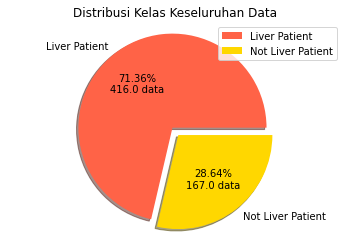

<Figure size 432x288 with 0 Axes>

In [ ]:
total_liver =data["Class"].value_counts()[0]
total_non_liver =data["Class"].value_counts()[1]
labels = 'Liver Patient', 'Not Liver Patient'
sizes = np.array([total_liver, total_non_liver])
colors = ['tomato', 'gold']
explode= (0, 0.1)
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)

    a=  str(round(val,2))+"%"+'\n'+str(a) +" data"
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, explode=explode,shadow=True)

plt.axis('equal')
plt.title("Distribusi Kelas Keseluruhan Data")
plt.legend()
plt.show()
plt.savefig("data split.jpg",dpi=300)

**One Hot Encoding & Label Encoding**

In [ ]:
onehotencoder=OneHotEncoder()
X = onehotencoder.fit_transform(data.Gender.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Female","Male"]) 
data.drop(columns="Gender", inplace=True)
data = pd.concat([data, dfOneHot], axis=1)
data

Age    TB   DB  Alkphos  ...  A/G Ratio              Class  Female  Male
0     65   0.7  0.1      187  ...       0.90      Liver Patient     1.0   0.0
1     62  10.9  5.5      699  ...       0.74      Liver Patient     0.0   1.0
2     62   7.3  4.1      490  ...       0.89      Liver Patient     0.0   1.0
3     58   1.0  0.4      182  ...       1.00      Liver Patient     0.0   1.0
4     72   3.9  2.0      195  ...       0.40      Liver Patient     0.0   1.0
..   ...   ...  ...      ...  ...        ...                ...     ...   ...
578   60   0.5  0.1      500  ...       0.37  Not Liver Patient     0.0   1.0
579   40   0.6  0.1       98  ...       1.10      Liver Patient     0.0   1.0
580   52   0.8  0.2      245  ...       1.00      Liver Patient     0.0   1.0
581   31   1.3  0.5      184  ...       1.00      Liver Patient     0.0   1.0
582   38   1.0  0.3      216  ...       1.50  Not Liver Patient     0.0   1.0

[583 rows x 12 columns]

In [ ]:
onehotencoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [ ]:
label_encoder=LabelEncoder()
data['Class']= label_encoder.fit_transform(data["Class"]) 
output = open('encoder.pkl', 'wb')
pickle.dump(label_encoder, output)
output.close()
data

Age    TB   DB  Alkphos  Sgpt_AA  ...  ALB  A/G Ratio  Class  Female  Male
0     65   0.7  0.1      187       16  ...  3.3       0.90      0     1.0   0.0
1     62  10.9  5.5      699       64  ...  3.2       0.74      0     0.0   1.0
2     62   7.3  4.1      490       60  ...  3.3       0.89      0     0.0   1.0
3     58   1.0  0.4      182       14  ...  3.4       1.00      0     0.0   1.0
4     72   3.9  2.0      195       27  ...  2.4       0.40      0     0.0   1.0
..   ...   ...  ...      ...      ...  ...  ...        ...    ...     ...   ...
578   60   0.5  0.1      500       20  ...  1.6       0.37      1     0.0   1.0
579   40   0.6  0.1       98       35  ...  3.2       1.10      0     0.0   1.0
580   52   0.8  0.2      245       48  ...  3.2       1.00      0     0.0   1.0
581   31   1.3  0.5      184       29  ...  3.4       1.00      0     0.0   1.0
582   38   1.0  0.3      216       21  ...  4.4       1.50      1     0.0   1.0

[583 rows x 12 columns]

In [ ]:
label_encoder.classes_

array(['Liver Patient', 'Not Liver Patient'], dtype=object)

**Normalization**

In [ ]:
# normalisasi dengan min max scaller untuk mengubah skla numeric value dari fitur (0-1)
numeric_col=["Age",	"TB",	"DB",	"Alkphos",	"Sgpt_AA",	"Sgot_AA",	"TP",	"ALB"	,"A/G Ratio"]
data_numeric=data[numeric_col]
data_numeric.head()

Age    TB   DB  Alkphos  Sgpt_AA  Sgot_AA   TP  ALB  A/G Ratio
0   65   0.7  0.1      187       16       18  6.8  3.3       0.90
1   62  10.9  5.5      699       64      100  7.5  3.2       0.74
2   62   7.3  4.1      490       60       68  7.0  3.3       0.89
3   58   1.0  0.4      182       14       20  6.8  3.4       1.00
4   72   3.9  2.0      195       27       59  7.3  2.4       0.40

In [ ]:
scaler = MinMaxScaler()

data_numeric_norm=scaler.fit_transform(data_numeric)

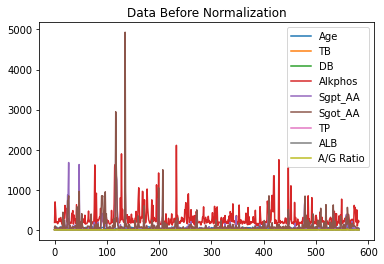

In [ ]:
data_numeric.plot(title="Data Before Normalization")

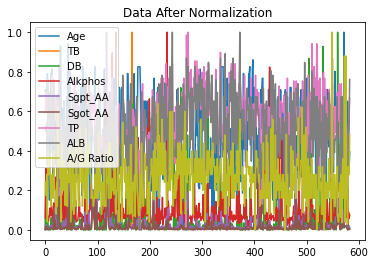

In [ ]:
data_numeric_norm_df=pd.DataFrame( data_numeric_norm,columns=numeric_col)
data_numeric_norm_df.plot(title="Data After Normalization")

In [ ]:
data[numeric_col]=data_numeric_norm_df
data

Age        TB        DB   Alkphos  ...  A/G Ratio  Class  Female  Male
0    0.709302  0.004021  0.000000  0.060576  ...      0.240      0     1.0   0.0
1    0.674419  0.140751  0.275510  0.310699  ...      0.176      0     0.0   1.0
2    0.674419  0.092493  0.204082  0.208598  ...      0.236      0     0.0   1.0
3    0.627907  0.008043  0.015306  0.058134  ...      0.280      0     0.0   1.0
4    0.790698  0.046917  0.096939  0.064485  ...      0.040      0     0.0   1.0
..        ...       ...       ...       ...  ...        ...    ...     ...   ...
578  0.651163  0.001340  0.000000  0.213483  ...      0.028      1     0.0   1.0
579  0.418605  0.002681  0.000000  0.017098  ...      0.320      0     0.0   1.0
580  0.558140  0.005362  0.005102  0.088911  ...      0.280      0     0.0   1.0
581  0.313953  0.012064  0.020408  0.059111  ...      0.280      0     0.0   1.0
582  0.395349  0.008043  0.010204  0.074744  ...      0.480      1     0.0   1.0

[583 rows x 12 columns]

In [ ]:
data.describe()

Age          TB          DB  ...       Class      Female        Male
count  583.000000  583.000000  583.000000  ...  583.000000  583.000000  583.000000
mean     0.473792    0.038858    0.070720  ...    0.286449    0.243568    0.756432
std      0.188254    0.083238    0.143291  ...    0.452490    0.429603    0.429603
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.337209    0.005362    0.005102  ...    0.000000    0.000000    1.000000
50%      0.476744    0.008043    0.010204  ...    0.000000    0.000000    1.000000
75%      0.627907    0.029491    0.061224  ...    1.000000    0.000000    1.000000
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 12 columns]

**Data** **Splitting**

In [ ]:
X_col=["Age",	"TB",	"DB",	"Alkphos",	"Sgpt_AA",	"Sgot_AA",	"TP",	"ALB",	"A/G Ratio",		"Female",	"Male"]
Y_col=["Class"]
X=data[X_col]
X=np.array(X)
Y=data[Y_col]
Y=np.array(Y)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=32)
for train_idx, test_idx in sss.split(X,Y):
  X_train=X[train_idx]
  Y_train=Y[train_idx]
  X_test=X[test_idx]
  Y_test=Y[test_idx]
print("Train Size : ",Y_train.shape,"Test Size : ", Y_test.shape)

Train Size :  (524, 1) Test Size :  (59, 1)


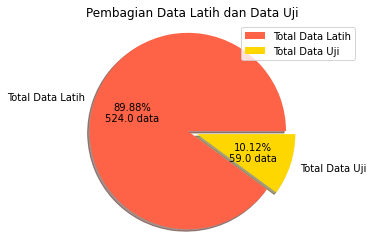

<Figure size 432x288 with 0 Axes>

In [ ]:
total_train =len(Y_train)
total_test =len(Y_test)
labels = 'Total Data Latih', 'Total Data Uji'
sizes = np.array([total_train, total_test])
colors = ['tomato', 'gold']
explode= (0, 0.1)
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)

    a=  str(round(val,2))+"%"+'\n'+str(a) +" data"
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, explode=explode,shadow=True)

plt.axis('equal')
plt.title("Pembagian Data Latih dan Data Uji")
plt.legend()
plt.show()
plt.savefig("data split.jpg",dpi=300)

In [ ]:
unique, train_counts=np.unique(Y_train, return_counts=True)
print(unique, train_counts)

[0 1] [374 150]


In [ ]:
unique, test_counts=np.unique(Y_test, return_counts=True)
print(unique, test_counts)

[0 1] [42 17]


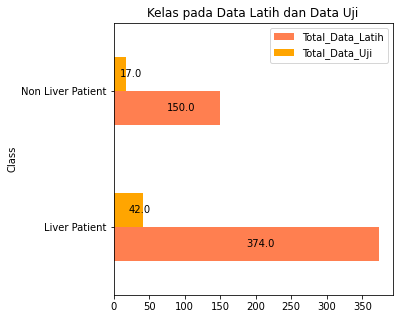

In [ ]:
a=[["Liver Patient",train_counts[0], test_counts[0]],["Non Liver Patient",train_counts[1], test_counts[1]]]
result=pd.DataFrame(a,columns=["Class", "Total_Data_Latih","Total_Data_Uji"])
ax = result.plot.barh(x='Class', y=['Total_Data_Latih','Total_Data_Uji'], stacked=False, figsize= (5,5), color=['coral','orange'])
ax.set_title("Kelas pada Data Latih dan Data Uji")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')
    
plt.savefig("dataset_object.jpg",dpi=300)

In [ ]:
hf = h5py.File('data.h5', 'w')

hf.create_dataset('X_train', data=X_train.astype(np.float64))
hf.create_dataset('Y_train', data=Y_train.astype(np.int8))
hf.create_dataset('X_test', data=X_test.astype(np.float64))
hf.create_dataset('Y_test', data=Y_test.astype(np.int8))
hf.close()

# **Logistic Regression Function**

In [ ]:
def binary_cross_entropy_loss(predict, target):
  y=target
  h=predict
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [ ]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [ ]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [ ]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = True):
    log_likelihood_=[]
    loss=[]
    X=features
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient 
        output=predict(X, weights)
        loss_=binary_cross_entropy_loss(output, target)
        ll=log_likelihood(features, target, weights)
        log_likelihood_.append(ll)
        loss.append(loss_)
        # Print log-likelihood every so often
        if step % 100 == 0:
            print("Step :", step)
            print("Log Likelihood : ", ll, " Loss : ", loss_)
    return weights, log_likelihood_, loss



In [ ]:
def predict(X, weights):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    scores = np.dot(X, weights)
    prob = sigmoid(scores)
    return prob

# **Complement LR Function**

In [ ]:
def com_sigmoid(scores):
    return (1 - (1 / (1 + np.exp(-scores))))

In [ ]:
def complement_logistic_regression(features, target, num_steps, learning_rate, add_intercept = True):
    log_likelihood_=[]
    loss=[]
    X=features
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = com_sigmoid(scores)
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient 
        output=predict(X, weights)
        loss_=binary_cross_entropy_loss(output, target)
        ll=log_likelihood(features, target, weights)
        log_likelihood_.append(ll)
        loss.append(loss_)
        # Print log-likelihood every so often
        if step % 100 == 0:
            print("Step :", step)
            print("Log Likelihood : ", ll, " Loss : ", loss_)
    return weights, log_likelihood_, loss



In [ ]:
def com_predict(X, weights):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    scores = np.dot(X, weights)
    prob = com_sigmoid(scores)
    return prob

# **File Handling**

In [ ]:
# fungsi untuk load encoder.pkl file
def label_encoder_file(filename):
  with open(filename, 'rb') as pkl_file:
    label_encoder = pickle.load(pkl_file)
  return label_encoder

In [ ]:
# fungsi untuk load data.h5 file
def data_h5_file(filename):
  hf = h5py.File(filename, 'r')
  X_train = np.array(hf.get('X_train'))
  X_test = np.array(hf.get('X_test'))
  Y_train = np.array(hf.get('Y_train'))
  Y_test = np.array(hf.get('Y_test'))
  hf.close()
  return X_train, X_test, Y_train, Y_test

In [ ]:
# fungsi untuk menyimpan w dalam file
def data_h5_writer(filename, w):
  hf = h5py.File(filename, 'w')
  hf.create_dataset('w', data=w)
  hf.close()
  return 'Succes'

# **Percobaan 1 : LR**

In [ ]:
# load label from encoder.pkl
label_encoder = label_encoder_file('encoder.pkl')

In [ ]:
data

Age        TB        DB   Alkphos  ...  A/G Ratio  Class  Female  Male
0    0.709302  0.004021  0.000000  0.060576  ...      0.240      0     1.0   0.0
1    0.674419  0.140751  0.275510  0.310699  ...      0.176      0     0.0   1.0
2    0.674419  0.092493  0.204082  0.208598  ...      0.236      0     0.0   1.0
3    0.627907  0.008043  0.015306  0.058134  ...      0.280      0     0.0   1.0
4    0.790698  0.046917  0.096939  0.064485  ...      0.040      0     0.0   1.0
..        ...       ...       ...       ...  ...        ...    ...     ...   ...
578  0.651163  0.001340  0.000000  0.213483  ...      0.028      1     0.0   1.0
579  0.418605  0.002681  0.000000  0.017098  ...      0.320      0     0.0   1.0
580  0.558140  0.005362  0.005102  0.088911  ...      0.280      0     0.0   1.0
581  0.313953  0.012064  0.020408  0.059111  ...      0.280      0     0.0   1.0
582  0.395349  0.008043  0.010204  0.074744  ...      0.480      1     0.0   1.0

[583 rows x 12 columns]

In [ ]:
def showMatrix(Y_test,pred, log_likelihood_, loss):
  cf_matrix=confusion_matrix(Y_test,pred)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(log_likelihood_)), log_likelihood_, label = "log likelihood")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('log likelihood')
  # memberi judul
  plt.title('Maximum Log likelihood')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(loss)), loss, label = "binary cross entropy loss")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('loss')
  # memberi judul
  plt.title('Training Loss')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

In [ ]:
def getPredictionLabel (prob):
  pred=[]
  for i in prob:
    if i <0.5:
      pred.append(0)
    else:
      pred.append(1)
  return pred

 ---------------------- FOLD KE- 0  --------------------- 
Step : 0
Log Likelihood :  -323.1978769836071  Loss :  0.6167898415717693
Step : 100
Log Likelihood :  -280.44923097181334  Loss :  0.5352084560530789
Step : 200
Log Likelihood :  -274.3285756402219  Loss :  0.5235278161072937
Step : 300
Log Likelihood :  -271.3390339756652  Loss :  0.5178225839230252
Step : 400
Log Likelihood :  -269.51774080297287  Loss :  0.5143468335934597
accuracy :  0.6779661016949152
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        42
           1       0.25      0.06      0.10        17

    accuracy                           0.68        59
   macro avg       0.48      0.49      0.45        59
weighted avg       0.58      0.68      0.60        59



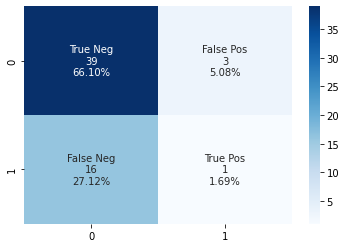

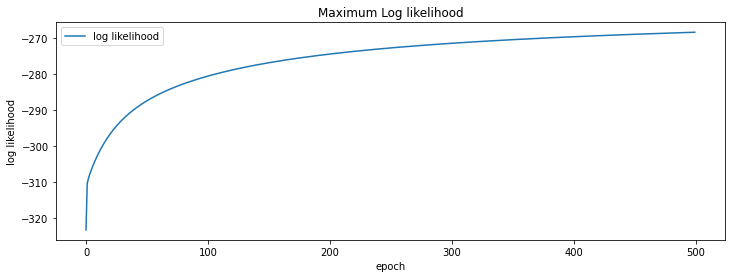

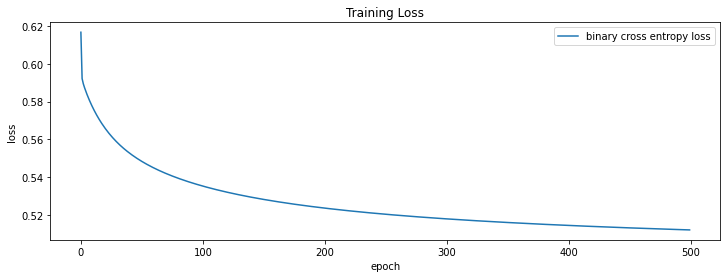

 ---------------------- FOLD KE- 1  --------------------- 
Step : 0
Log Likelihood :  -322.81491910959244  Loss :  0.6160590059343368
Step : 100
Log Likelihood :  -279.99369928608706  Loss :  0.5343391207749755
Step : 200
Log Likelihood :  -274.0482936959286  Loss :  0.5229929269006269
Step : 300
Log Likelihood :  -271.0391503789367  Loss :  0.5172502869827037
Step : 400
Log Likelihood :  -269.14595173394997  Loss :  0.5136373124693702
accuracy :  0.6949152542372882
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        42
           1       0.40      0.12      0.18        17

    accuracy                           0.69        59
   macro avg       0.56      0.52      0.50        59
weighted avg       0.63      0.69      0.63        59



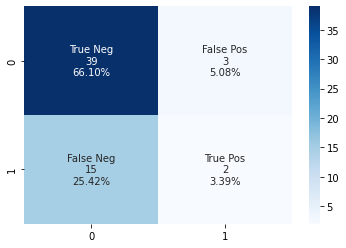

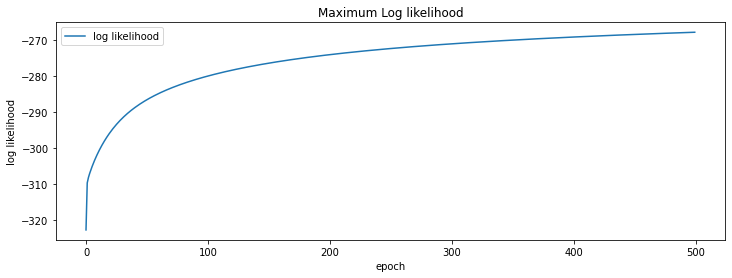

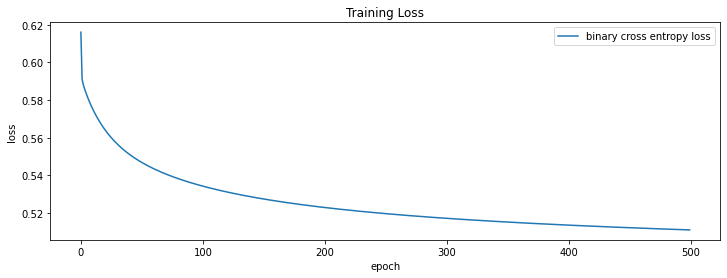

 ---------------------- FOLD KE- 2  --------------------- 
Step : 0
Log Likelihood :  -323.90197142564415  Loss :  0.6181335332550459
Step : 100
Log Likelihood :  -281.6177421239921  Loss :  0.5374384391679239
Step : 200
Log Likelihood :  -275.66102370343856  Loss :  0.5260706559225925
Step : 300
Log Likelihood :  -272.6041902573827  Loss :  0.5202370043079823
Step : 400
Log Likelihood :  -270.6563241731384  Loss :  0.5165197026204931
accuracy :  0.7288135593220338
              precision    recall  f1-score   support

           0       0.73      0.98      0.84        42
           1       0.67      0.12      0.20        17

    accuracy                           0.73        59
   macro avg       0.70      0.55      0.52        59
weighted avg       0.71      0.73      0.65        59



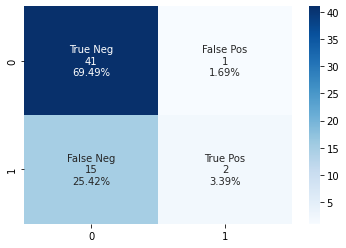

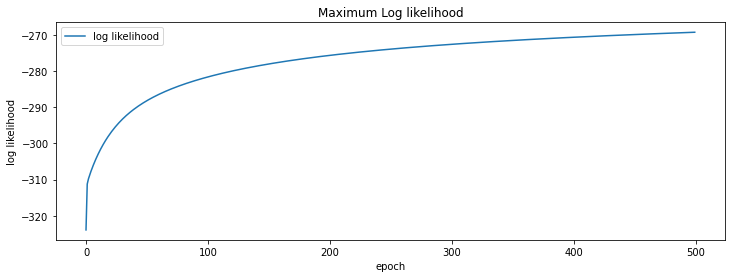

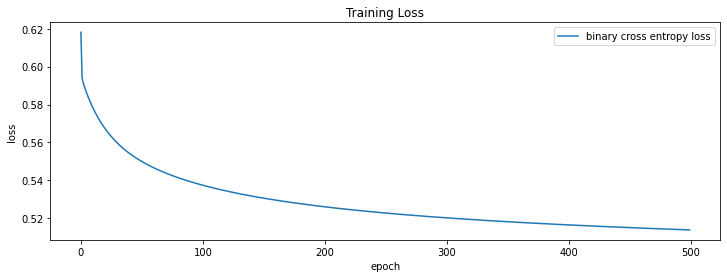

 ---------------------- FOLD KE- 3  --------------------- 
Step : 0
Log Likelihood :  -324.3170251084957  Loss :  0.6177467144923728
Step : 100
Log Likelihood :  -278.6140351801091  Loss :  0.530693400343065
Step : 200
Log Likelihood :  -272.39843654819987  Loss :  0.518854164853714
Step : 300
Log Likelihood :  -269.4168697802495  Loss :  0.5131749900576181
Step : 400
Log Likelihood :  -267.60802983767695  Loss :  0.5097295806431942
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        42
           1       0.33      0.06      0.11        16

    accuracy                           0.71        58
   macro avg       0.53      0.51      0.47        58
weighted avg       0.62      0.71      0.63        58



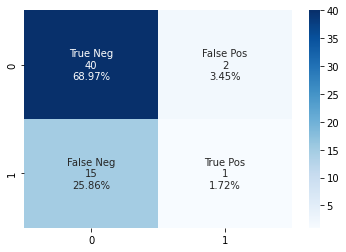

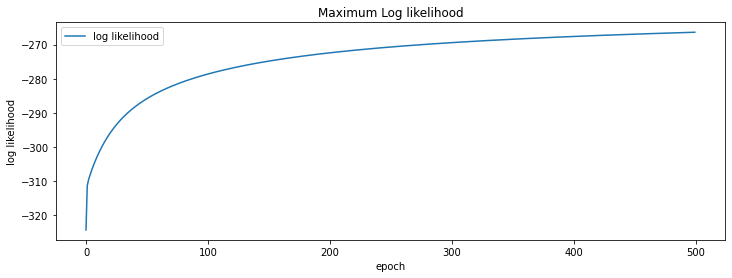

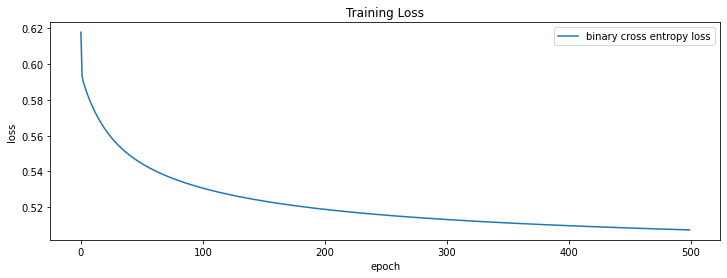

 ---------------------- FOLD KE- 4  --------------------- 
Step : 0
Log Likelihood :  -324.6764529497026  Loss :  0.6184313389518145
Step : 100
Log Likelihood :  -280.68878680499705  Loss :  0.5346453081999945
Step : 200
Log Likelihood :  -274.48672820676995  Loss :  0.5228318632509904
Step : 300
Log Likelihood :  -271.36746851564277  Loss :  0.5168904162202721
Step : 400
Log Likelihood :  -269.3923654607315  Loss :  0.5131283151632982
accuracy :  0.7413793103448276
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        42
           1       1.00      0.06      0.12        16

    accuracy                           0.74        58
   macro avg       0.87      0.53      0.48        58
weighted avg       0.81      0.74      0.65        58



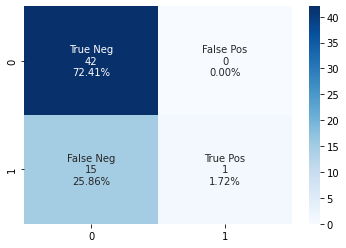

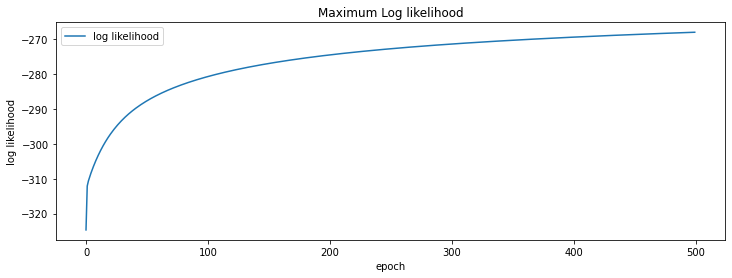

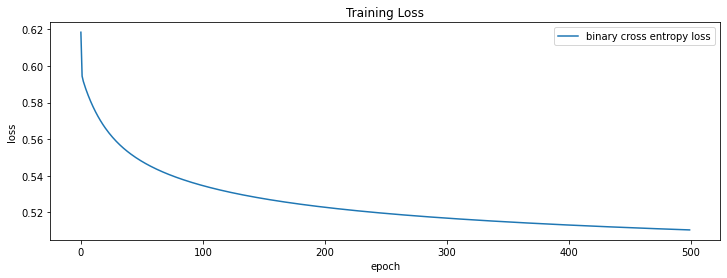

 ---------------------- FOLD KE- 5  --------------------- 
Step : 0
Log Likelihood :  -324.58135919658014  Loss :  0.6182502079934858
Step : 100
Log Likelihood :  -281.6967229567748  Loss :  0.5365651865843329
Step : 200
Log Likelihood :  -275.93808128818193  Loss :  0.5255963453108229
Step : 300
Log Likelihood :  -273.0987316748361  Loss :  0.5201880603330211
Step : 400
Log Likelihood :  -271.33815518611243  Loss :  0.5168345813068809
accuracy :  0.7241379310344828
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        42
           1       0.50      0.12      0.20        16

    accuracy                           0.72        58
   macro avg       0.62      0.54      0.52        58
weighted avg       0.67      0.72      0.66        58



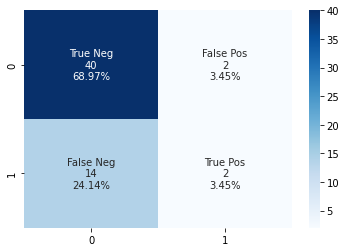

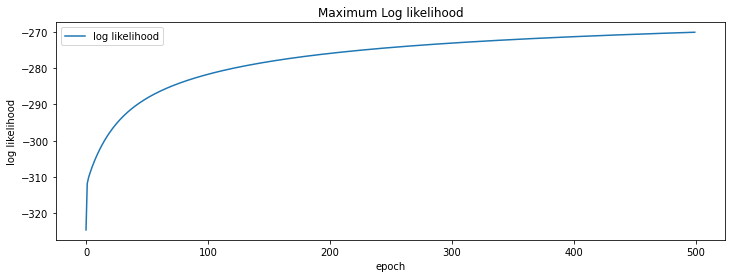

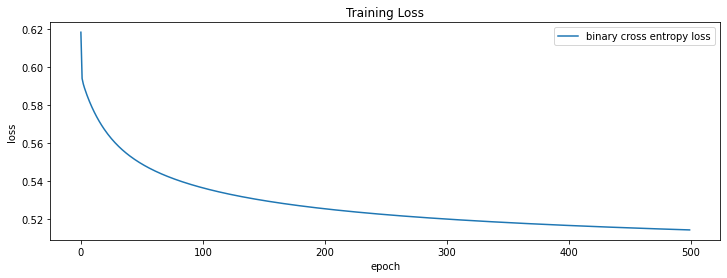

 ---------------------- FOLD KE- 6  --------------------- 
Step : 0
Log Likelihood :  -323.90580423445647  Loss :  0.61696343663706
Step : 100
Log Likelihood :  -280.27729861985426  Loss :  0.5338615211806748
Step : 200
Log Likelihood :  -274.54900229317775  Loss :  0.522950480558434
Step : 300
Log Likelihood :  -271.70710685140807  Loss :  0.5175373463836345
Step : 400
Log Likelihood :  -269.95049979408896  Loss :  0.514191428179217
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        41
           1       0.50      0.12      0.19        17

    accuracy                           0.71        58
   macro avg       0.61      0.53      0.51        58
weighted avg       0.66      0.71      0.64        58



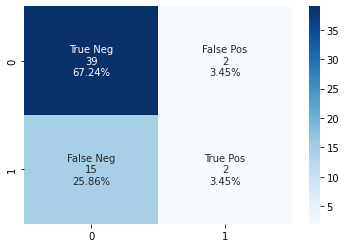

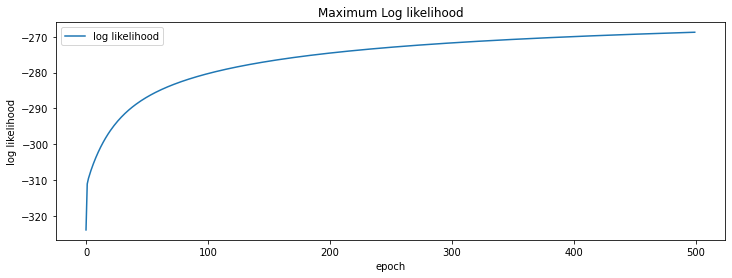

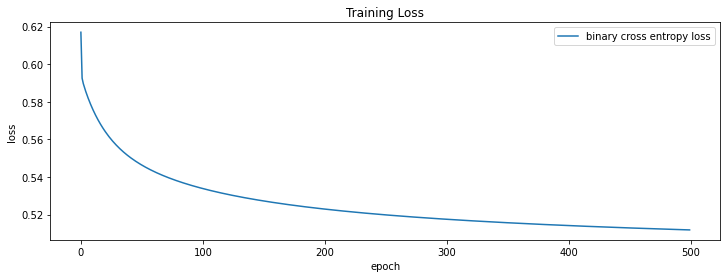

 ---------------------- FOLD KE- 7  --------------------- 
Step : 0
Log Likelihood :  -324.12805567458423  Loss :  0.6173867727134937
Step : 100
Log Likelihood :  -278.49407306077774  Loss :  0.530464901068148
Step : 200
Log Likelihood :  -272.14856458459764  Loss :  0.5183782182563764
Step : 300
Log Likelihood :  -268.9466334428008  Loss :  0.512279301795811
Step : 400
Log Likelihood :  -266.9248003765126  Loss :  0.5084281911933574
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        41
           1       0.50      0.06      0.11        17

    accuracy                           0.71        58
   macro avg       0.61      0.52      0.47        58
weighted avg       0.65      0.71      0.61        58



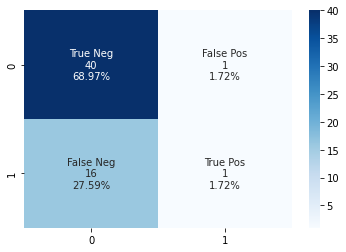

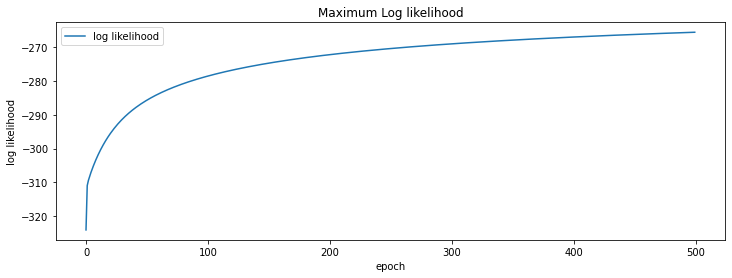

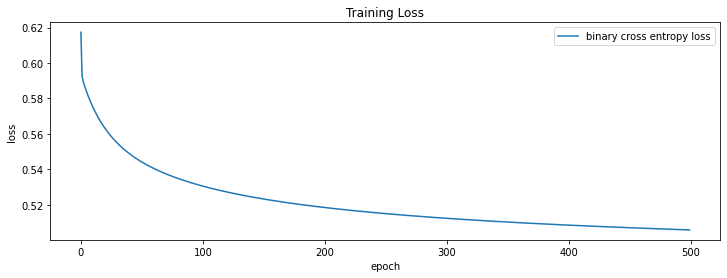

 ---------------------- FOLD KE- 8  --------------------- 
Step : 0
Log Likelihood :  -323.6566520687307  Loss :  0.6164888610832966
Step : 100
Log Likelihood :  -279.4523708449924  Loss :  0.5322902301809379
Step : 200
Log Likelihood :  -273.528693333306  Loss :  0.5210070349205829
Step : 300
Log Likelihood :  -270.63316144238297  Loss :  0.5154917360807295
Step : 400
Log Likelihood :  -268.84522324700316  Loss :  0.5120861395181012
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        41
           1       0.50      0.06      0.11        17

    accuracy                           0.71        58
   macro avg       0.61      0.52      0.47        58
weighted avg       0.65      0.71      0.61        58



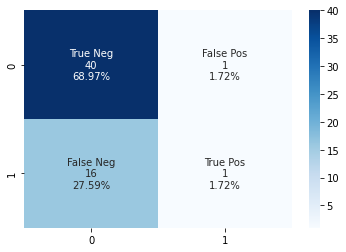

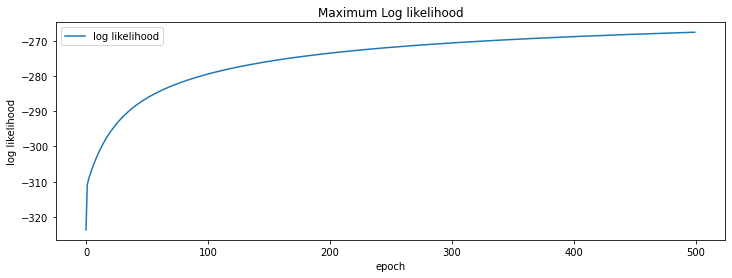

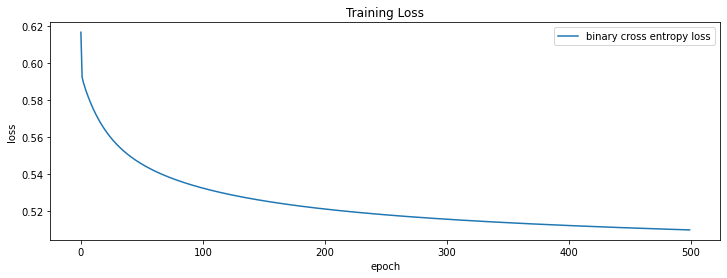

 ---------------------- FOLD KE- 9  --------------------- 
Step : 0
Log Likelihood :  -324.5791260991719  Loss :  0.6182459544746133
Step : 100
Log Likelihood :  -280.64751318029033  Loss :  0.5345666917719816
Step : 200
Log Likelihood :  -274.2326658297749  Loss :  0.5223479349138569
Step : 300
Log Likelihood :  -271.08605787324825  Loss :  0.5163543959490443
Step : 400
Log Likelihood :  -269.1575908208706  Loss :  0.5126811253730869
accuracy :  0.6896551724137931
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        41
           1       0.40      0.12      0.18        17

    accuracy                           0.69        58
   macro avg       0.56      0.52      0.50        58
weighted avg       0.62      0.69      0.62        58



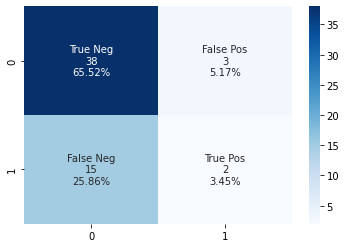

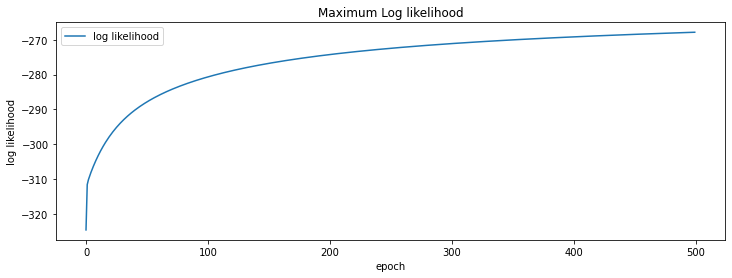

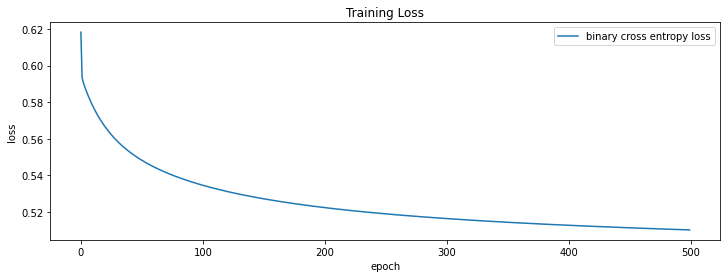

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  w, log_likelihood_, loss = logistic_regression(X_train, Y_train.reshape((len(Y_train),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(Y_train,train_pred)

  prob = []
  pred = []
  prob = predict(X_test, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))
 

  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

In [ ]:
test_df=pd.DataFrame(X_test_all, columns=['Age', 'TB', 'DB', 'Alkphos', 'Sgpt_AA', 'Sgot_AA', 'TP', 'ALB',
       'A/G Ratio', 'Female', 'Male'])
test_df["Class"]=label_encoder.inverse_transform(Y_test_all.squeeze())
test_df["prob"]=test_prob
test_df["Predicted"]=label_encoder.inverse_transform(test_pred)
test_df["Index"] = index

# **Percobaan 2 : Double Learning**

In [ ]:
missed_class_index = test_df.query('Predicted != Class').index
missed_class_index

Int64Index([  2,   6,   7,  10,  11,  16,  18,  21,  23,  24,
            ...
            557, 560, 561, 562, 565, 570, 574, 578, 579, 582],
           dtype='int64', length=170)

In [ ]:
def Intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

 ---------------------- FOLD KE- 0  --------------------- 
complement_index :  [516, 517, 518, 6, 7, 521, 10, 11, 526, 16, 18, 531, 21, 533, 23, 24, 25, 534, 27, 540, 29, 542, 545, 34, 35, 551, 40, 42, 557, 560, 49, 561, 562, 565, 55, 570, 574, 63, 66, 578, 68, 579, 582, 73, 74, 82, 90, 92, 96, 98, 99, 100, 103, 106, 107, 128, 129, 131, 134, 135, 140, 143, 145, 152, 158, 162, 164, 169, 171, 176, 177, 178, 184, 187, 188, 191, 198, 205, 206, 207, 210, 215, 221, 224, 229, 230, 233, 237, 239, 244, 245, 256, 260, 262, 263, 265, 268, 271, 273, 274, 286, 308, 312, 316, 319, 320, 321, 322, 329, 330, 331, 334, 336, 339, 353, 356, 358, 360, 366, 377, 385, 387, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 417, 427, 432, 433, 437, 440, 450, 451, 454, 456, 463, 468, 469, 472, 480, 485, 487, 488, 490, 494, 500, 503, 504, 511]
Step : 0
Log Likelihood :  -93.27116547960301  Loss :  0.5978920864077116
Step : 100
Log Likelihood :  -5779.114151627535  Loss :  37.04560353607394
Step : 200
Log Likelih

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

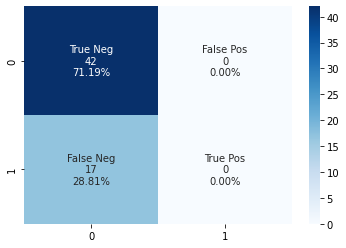

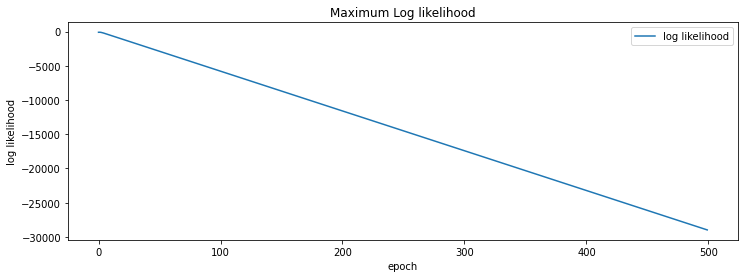

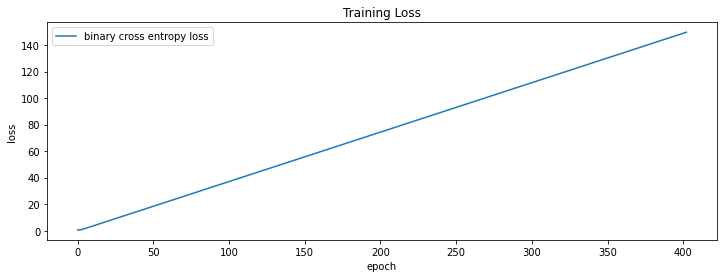

 ---------------------- FOLD KE- 1  --------------------- 
complement_index :  [2, 516, 517, 6, 7, 518, 521, 11, 526, 16, 18, 531, 21, 533, 23, 534, 25, 540, 542, 545, 34, 35, 551, 40, 42, 557, 560, 49, 561, 562, 565, 55, 570, 574, 63, 65, 66, 578, 68, 579, 582, 73, 81, 82, 90, 92, 93, 96, 98, 99, 100, 103, 106, 107, 128, 129, 131, 134, 135, 140, 143, 146, 152, 158, 162, 164, 169, 171, 176, 177, 178, 184, 187, 188, 191, 198, 205, 206, 207, 210, 215, 221, 224, 229, 230, 233, 237, 239, 244, 245, 256, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 319, 320, 322, 329, 330, 332, 336, 339, 353, 356, 358, 360, 366, 377, 382, 385, 387, 388, 390, 392, 393, 394, 395, 397, 409, 415, 417, 425, 427, 432, 433, 437, 440, 450, 451, 454, 456, 458, 462, 463, 465, 468, 472, 485, 487, 488, 490, 494, 500, 503, 504, 511]
Step : 0
Log Likelihood :  -91.49886521985832  Loss :  0.5791067418978374
Step : 100
Log Likelihood :  -5496.5017356699655  Loss :  34.78798566879725
Step : 200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

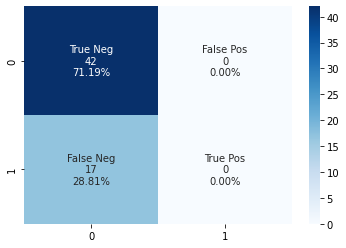

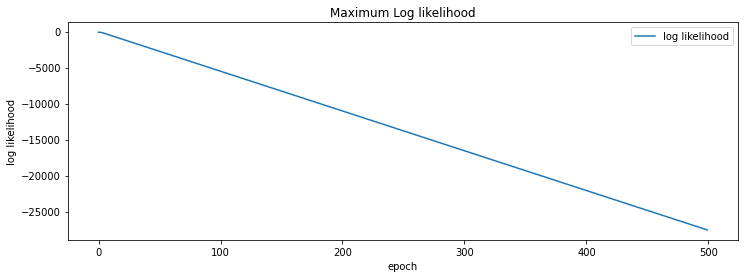

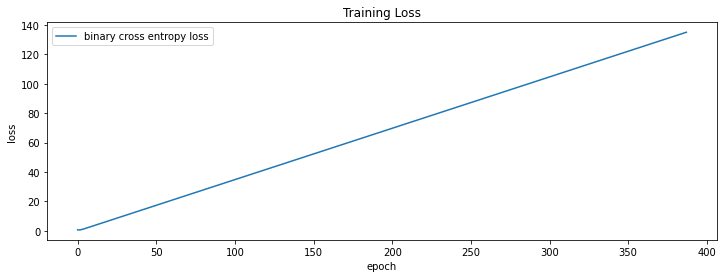

 ---------------------- FOLD KE- 2  --------------------- 
complement_index :  [2, 516, 517, 6, 518, 521, 10, 11, 526, 16, 18, 531, 21, 533, 534, 24, 25, 27, 540, 29, 542, 545, 34, 35, 551, 40, 42, 557, 560, 49, 561, 562, 565, 55, 570, 574, 65, 66, 578, 68, 579, 582, 74, 81, 82, 90, 92, 93, 96, 99, 100, 106, 107, 128, 129, 131, 134, 140, 145, 146, 152, 158, 164, 169, 171, 176, 178, 184, 187, 198, 205, 206, 207, 210, 215, 229, 230, 233, 237, 239, 244, 245, 256, 262, 263, 265, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 319, 320, 321, 322, 329, 330, 331, 332, 334, 336, 339, 353, 356, 360, 366, 382, 385, 387, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 417, 425, 427, 432, 433, 437, 440, 450, 451, 454, 456, 458, 462, 463, 465, 468, 469, 472, 480, 487, 488, 494, 500, 503, 504]
Step : 0
Log Likelihood :  -91.02622146161428  Loss :  0.6109142379974113
Step : 100
Log Likelihood :  -5456.239783953073  Loss :  36.61905895270519
Step : 200
Log Likelihood :  -10954.24621344548  Loss : 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

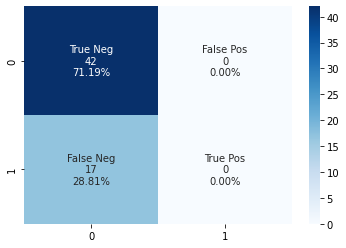

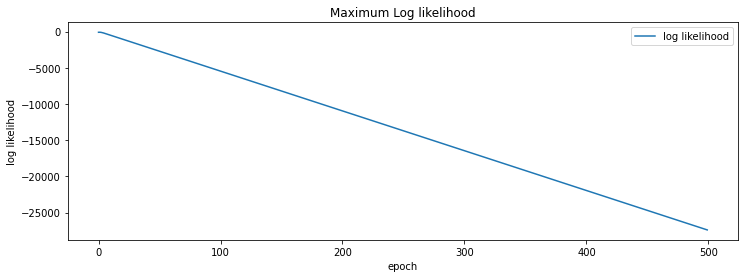

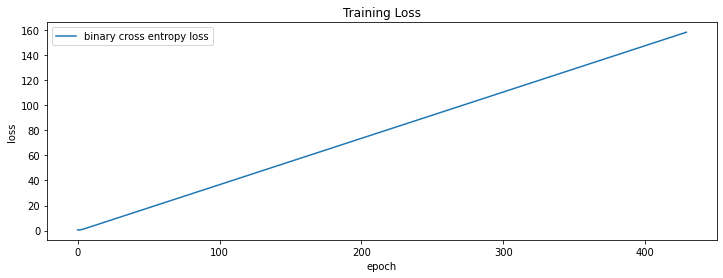

 ---------------------- FOLD KE- 3  --------------------- 
complement_index :  [2, 516, 517, 6, 7, 518, 521, 10, 11, 526, 16, 531, 21, 533, 23, 24, 25, 534, 27, 540, 29, 542, 545, 34, 35, 551, 40, 42, 560, 561, 562, 565, 55, 570, 574, 63, 65, 66, 579, 68, 582, 73, 74, 81, 82, 90, 92, 93, 96, 98, 99, 100, 103, 106, 107, 129, 131, 134, 135, 140, 143, 145, 146, 152, 158, 162, 164, 169, 171, 177, 178, 184, 188, 191, 198, 205, 206, 207, 210, 215, 221, 224, 229, 230, 233, 237, 239, 245, 256, 260, 262, 263, 265, 268, 269, 271, 273, 303, 307, 319, 320, 321, 322, 329, 330, 331, 332, 334, 339, 353, 356, 358, 360, 366, 377, 382, 387, 388, 390, 392, 397, 406, 409, 415, 417, 425, 432, 433, 440, 450, 451, 454, 456, 458, 462, 463, 465, 468, 469, 480, 485, 487, 488, 490, 500, 503, 504, 511]
Step : 0
Log Likelihood :  -88.20035362154516  Loss :  0.5959483352807106
Step : 100
Log Likelihood :  -5018.820410626086  Loss :  33.91094872044653
Step : 200
Log Likelihood :  -10070.92344178311  Loss :  68.04678

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

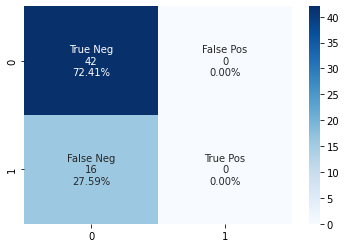

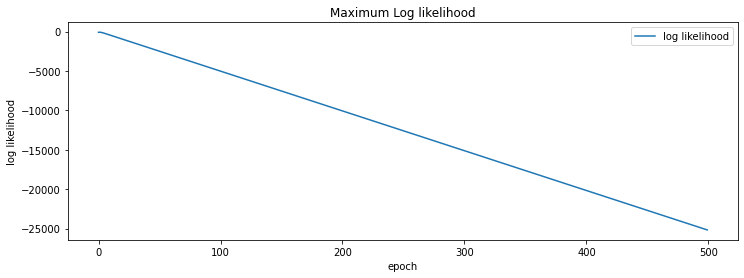

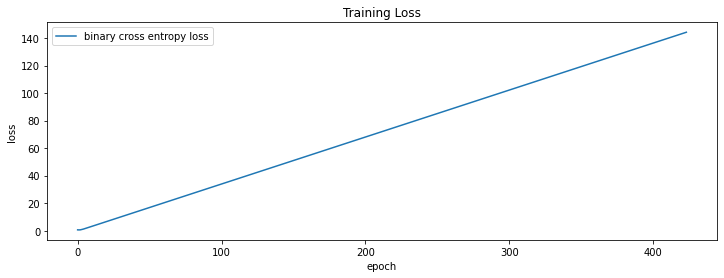

 ---------------------- FOLD KE- 4  --------------------- 
complement_index :  [2, 516, 517, 6, 7, 518, 521, 10, 11, 526, 18, 531, 21, 533, 23, 24, 25, 534, 27, 29, 542, 545, 34, 35, 551, 40, 557, 560, 49, 561, 562, 565, 570, 574, 63, 65, 66, 578, 68, 582, 73, 74, 81, 82, 92, 93, 96, 98, 99, 100, 103, 107, 128, 129, 131, 134, 135, 140, 143, 145, 146, 152, 158, 162, 164, 169, 171, 176, 177, 178, 184, 187, 188, 191, 198, 205, 206, 207, 210, 221, 224, 229, 230, 233, 237, 239, 244, 256, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 319, 320, 321, 322, 329, 330, 331, 332, 334, 336, 353, 356, 358, 360, 366, 377, 382, 385, 387, 392, 393, 394, 395, 397, 406, 409, 415, 417, 425, 427, 432, 433, 437, 440, 451, 454, 456, 458, 462, 463, 465, 468, 469, 472, 480, 485, 487, 488, 490, 494, 500, 503, 504, 511]
Step : 0
Log Likelihood :  -92.37735541931477  Loss :  0.5883907988491387
Step : 100
Log Likelihood :  -5526.288338863966  Loss :  35.19928878257303
Step : 200
Log Lik

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

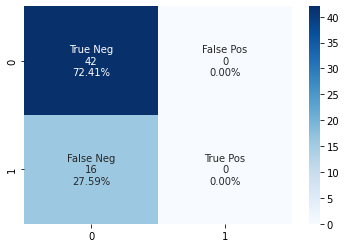

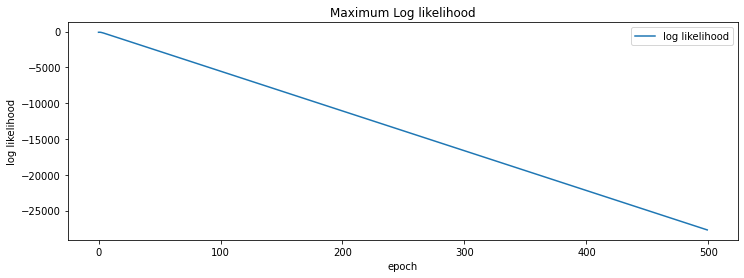

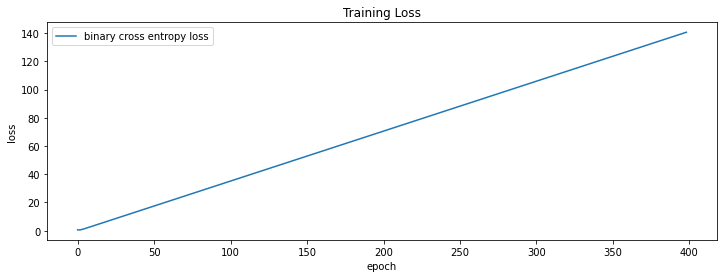

 ---------------------- FOLD KE- 5  --------------------- 
complement_index :  [2, 516, 517, 6, 7, 521, 10, 11, 526, 16, 18, 21, 533, 23, 24, 25, 534, 27, 540, 29, 542, 545, 34, 35, 551, 40, 42, 557, 49, 562, 55, 570, 63, 65, 66, 578, 579, 582, 73, 74, 81, 82, 90, 92, 93, 96, 98, 99, 100, 103, 106, 107, 128, 129, 131, 134, 135, 140, 143, 145, 146, 152, 158, 162, 164, 169, 176, 177, 178, 184, 187, 188, 191, 207, 210, 215, 221, 224, 229, 233, 237, 239, 244, 245, 256, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 319, 321, 322, 330, 331, 332, 334, 336, 339, 353, 358, 360, 366, 377, 382, 385, 387, 388, 390, 393, 394, 395, 406, 409, 415, 417, 425, 427, 433, 437, 440, 450, 451, 458, 462, 465, 468, 469, 472, 480, 485, 487, 488, 490, 494, 500, 503, 504, 511]
Step : 0
Log Likelihood :  -88.81322486618278  Loss :  0.5960619118535757
Step : 100
Log Likelihood :  -5030.445332702655  Loss :  33.761378071829895
Step : 200
Log Likelihood :  -10094.187920207749  Loss :  67

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

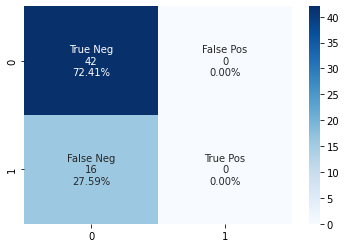

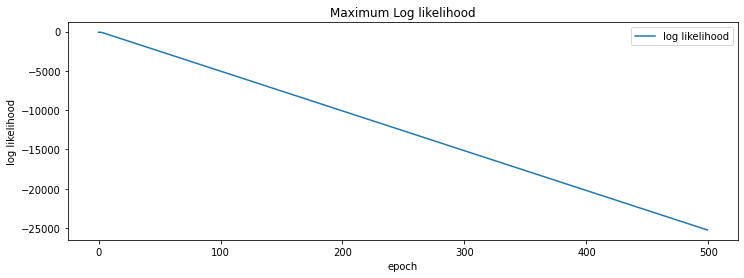

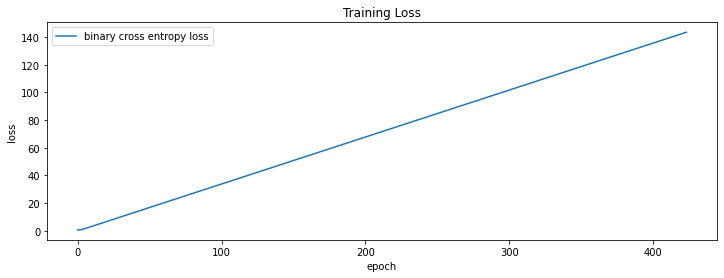

 ---------------------- FOLD KE- 6  --------------------- 
complement_index :  [2, 516, 518, 6, 7, 521, 10, 11, 16, 18, 531, 21, 534, 23, 24, 25, 27, 540, 29, 542, 545, 34, 551, 40, 42, 557, 560, 49, 561, 562, 565, 55, 574, 63, 65, 66, 578, 68, 579, 582, 73, 74, 81, 90, 92, 93, 96, 98, 99, 100, 103, 106, 107, 128, 131, 134, 135, 143, 145, 146, 152, 162, 171, 176, 177, 178, 187, 188, 191, 198, 205, 206, 207, 210, 215, 221, 224, 229, 230, 233, 237, 239, 244, 245, 256, 260, 262, 263, 265, 268, 269, 274, 286, 303, 307, 308, 312, 316, 319, 320, 321, 322, 329, 331, 332, 334, 336, 339, 353, 356, 358, 360, 366, 377, 382, 385, 387, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 425, 427, 432, 433, 437, 440, 450, 454, 456, 458, 462, 463, 465, 468, 469, 472, 480, 485, 487, 488, 490, 494, 500, 504, 511]
Step : 0
Log Likelihood :  -90.59578434031508  Loss :  0.5960248969757571
Step : 100
Log Likelihood :  -5299.646647685815  Loss :  34.86609636635404
Step : 200
Log Likelihood :  -10633.546959211

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

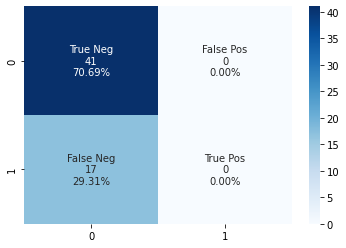

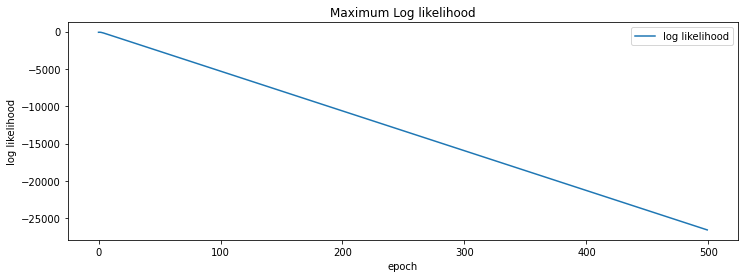

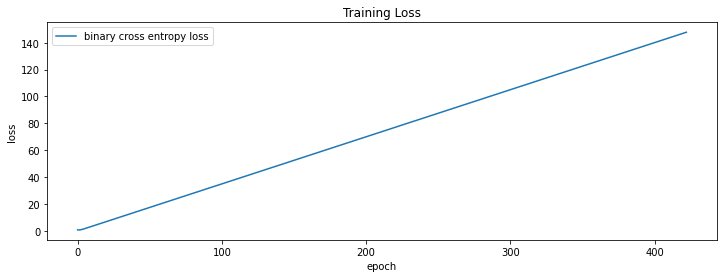

 ---------------------- FOLD KE- 7  --------------------- 
complement_index :  [2, 517, 518, 6, 7, 521, 10, 526, 16, 18, 531, 21, 533, 23, 24, 534, 27, 540, 29, 545, 35, 40, 42, 557, 560, 49, 561, 562, 565, 55, 570, 574, 63, 65, 578, 579, 68, 582, 73, 74, 81, 82, 90, 93, 96, 98, 100, 103, 106, 107, 128, 129, 134, 135, 140, 143, 145, 146, 152, 158, 162, 164, 169, 171, 176, 177, 178, 184, 187, 188, 191, 198, 205, 206, 210, 215, 221, 224, 229, 230, 233, 239, 244, 245, 256, 260, 262, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 319, 320, 321, 322, 329, 330, 331, 332, 334, 336, 339, 353, 356, 358, 360, 366, 377, 382, 385, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 417, 425, 427, 432, 433, 437, 440, 450, 451, 454, 456, 458, 462, 463, 465, 468, 469, 472, 480, 485, 487, 488, 490, 494, 500, 503, 504, 511]
Step : 0
Log Likelihood :  -90.96501959473372  Loss :  0.5868710941595724
Step : 100
Log Likelihood :  -5403.155181274653  Loss :  34.859065685642925
Step : 200
Log Likelihood

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

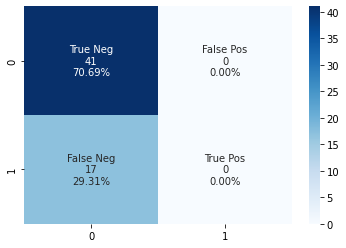

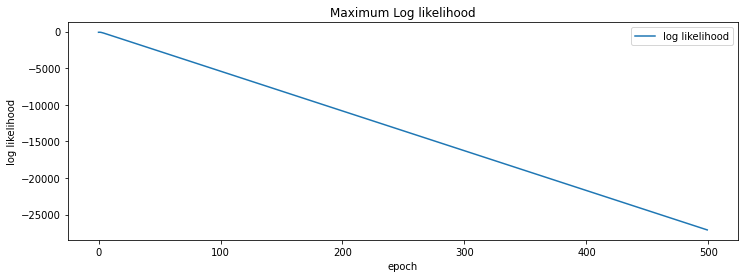

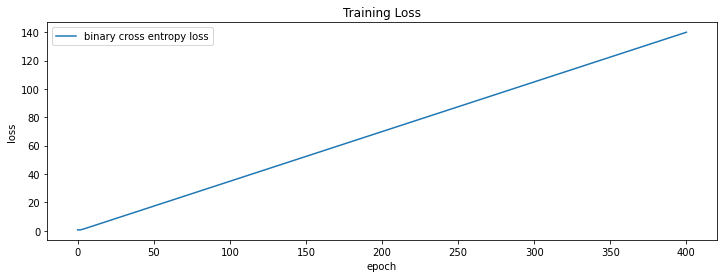

 ---------------------- FOLD KE- 8  --------------------- 
complement_index :  [2, 516, 517, 518, 7, 521, 10, 11, 526, 16, 18, 531, 21, 533, 23, 24, 25, 534, 27, 540, 29, 542, 545, 34, 35, 551, 40, 42, 557, 560, 49, 561, 565, 55, 570, 574, 63, 65, 66, 578, 68, 579, 582, 73, 74, 81, 82, 90, 92, 93, 98, 99, 100, 103, 106, 107, 128, 129, 131, 135, 140, 143, 145, 146, 152, 158, 162, 164, 169, 171, 176, 177, 184, 187, 188, 191, 198, 205, 206, 207, 210, 215, 221, 224, 230, 237, 239, 244, 245, 260, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 320, 321, 329, 330, 331, 332, 334, 336, 339, 356, 358, 366, 377, 382, 385, 387, 388, 390, 392, 393, 394, 395, 397, 406, 409, 417, 425, 427, 432, 433, 437, 450, 451, 454, 456, 458, 462, 463, 465, 469, 472, 480, 485, 487, 490, 494, 503, 504, 511]
Step : 0
Log Likelihood :  -91.94631713223278  Loss :  0.6049099811331103
Step : 100
Log Likelihood :  -5487.739460310157  Loss :  36.103549080987875
Step : 200
Log Likelihood :  -11014.6322303

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

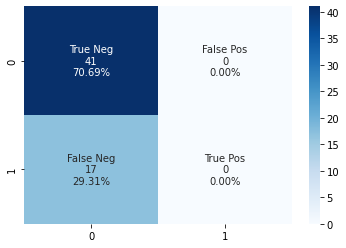

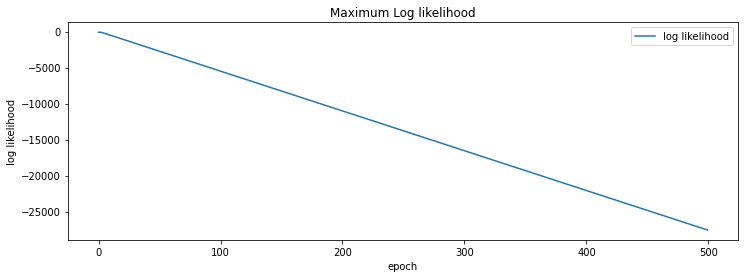

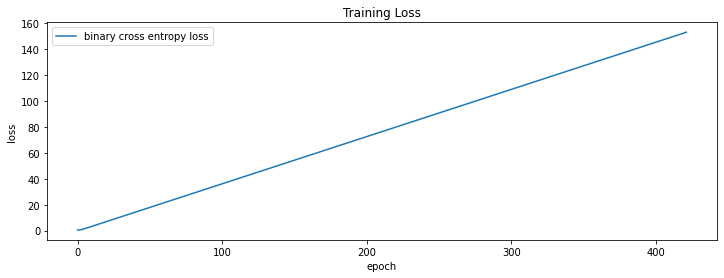

 ---------------------- FOLD KE- 9  --------------------- 
complement_index :  [2, 516, 517, 6, 7, 518, 10, 11, 526, 16, 18, 531, 533, 23, 24, 25, 27, 540, 29, 542, 34, 35, 551, 42, 557, 560, 49, 561, 562, 565, 55, 570, 574, 63, 65, 66, 578, 68, 579, 73, 74, 81, 82, 90, 92, 93, 96, 98, 99, 103, 106, 128, 129, 131, 134, 135, 140, 143, 145, 146, 158, 162, 164, 169, 171, 176, 177, 178, 184, 187, 188, 191, 198, 205, 206, 207, 215, 221, 224, 229, 230, 233, 237, 244, 245, 256, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 319, 320, 321, 322, 329, 330, 331, 332, 334, 336, 339, 353, 356, 358, 360, 377, 382, 385, 387, 388, 390, 392, 393, 394, 395, 397, 406, 415, 417, 425, 427, 432, 437, 440, 450, 451, 454, 456, 458, 462, 463, 465, 468, 469, 472, 480, 485, 488, 490, 494, 500, 503, 511]
Step : 0
Log Likelihood :  -88.95807938522903  Loss :  0.5776498661378509
Step : 100
Log Likelihood :  -5179.86198509545  Loss :  33.63546743568474
Step : 200
Log Likelihood :  -10386.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

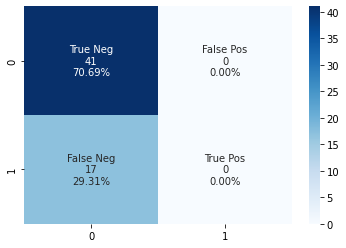

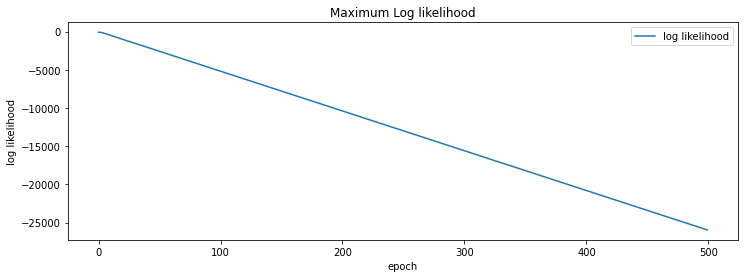

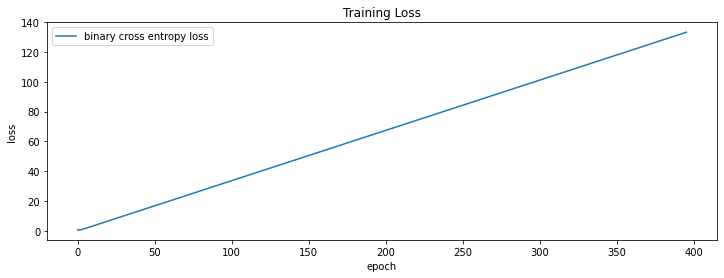

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
 # print("TRAIN:", train_index)
  complement_index = Intersection(missed_class_index, train_index)
  print("complement_index : ", complement_index)
  X_train, X_test = X[complement_index], X[test_index]
  Y_train, Y_test = Y[complement_index], Y[test_index]
  w, log_likelihood_, loss = complement_logistic_regression(X_train, Y_train.reshape((len(Y_train),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(Y_train,train_pred)
 # print("acc_train_  :", acc_train_)

  prob = []
  pred = []
  prob = predict(X_test, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

# **Percobaan 3 : Logistic Regression dan SMOTE**

SMOTE

In [ ]:
# load label from encoder.pkl
label_encoder = label_encoder_file('encoder.pkl')

In [ ]:
# load data X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = data_h5_file('data.h5')

In [ ]:
def showMatrix(Y_test,pred, log_likelihood_, loss):
  cf_matrix=confusion_matrix(Y_test,pred)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(log_likelihood_)), log_likelihood_, label = "log likelihood")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('log likelihood')
  # memberi judul
  plt.title('Maximum Log likelihood')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(loss)), loss, label = "binary cross entropy loss")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('loss')
  # memberi judul
  plt.title('Training Loss')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

In [ ]:
def getPredictionLabel (prob):
  pred=[]
  for i in prob:
    if i <0.5:
      pred.append(0)
    else:
      pred.append(1)
  return pred

 ---------------------- FOLD KE- 0  --------------------- 
Step : 0
Log Likelihood :  -511.5725118013431  Loss :  0.6839204703226512
Step : 100
Log Likelihood :  -472.76497946437127  Loss :  0.6320387425994268
Step : 200
Log Likelihood :  -432.2407786463484  Loss :  0.577862003537899
Step : 300
Log Likelihood :  -423.4219758250895  Loss :  0.5660721601939699
Step : 400
Log Likelihood :  -420.3630646806604  Loss :  0.5619827067923268
accuracy :  0.6610169491525424
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.46      0.94      0.62        17

    accuracy                           0.66        59
   macro avg       0.71      0.74      0.66        59
weighted avg       0.81      0.66      0.67        59



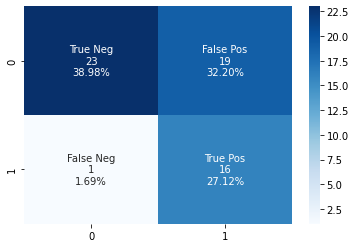

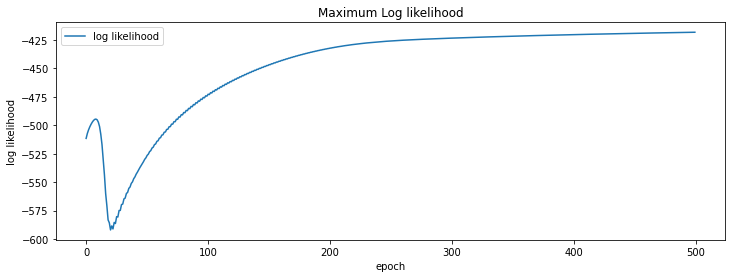

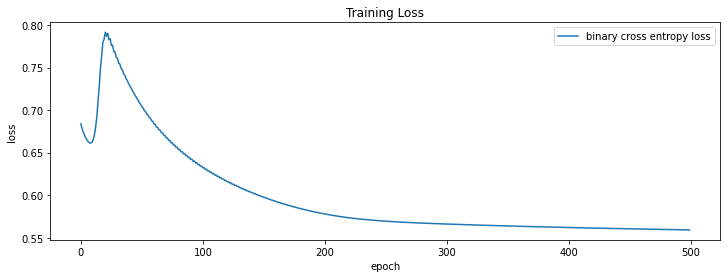

 ---------------------- FOLD KE- 1  --------------------- 
Step : 0
Log Likelihood :  -511.04381364777703  Loss :  0.6832136546093276
Step : 100
Log Likelihood :  -463.68245063105906  Loss :  0.6198963243730734
Step : 200
Log Likelihood :  -433.07684977332394  Loss :  0.578979745686262
Step : 300
Log Likelihood :  -426.5999583008526  Loss :  0.57032079986745
Step : 400
Log Likelihood :  -423.70692854542256  Loss :  0.5664531130286397
accuracy :  0.6101694915254238
              precision    recall  f1-score   support

           0       0.95      0.48      0.63        42
           1       0.42      0.94      0.58        17

    accuracy                           0.61        59
   macro avg       0.69      0.71      0.61        59
weighted avg       0.80      0.61      0.62        59



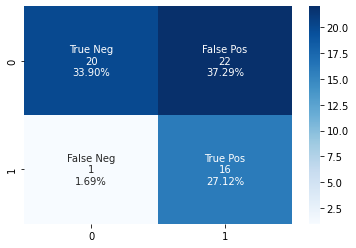

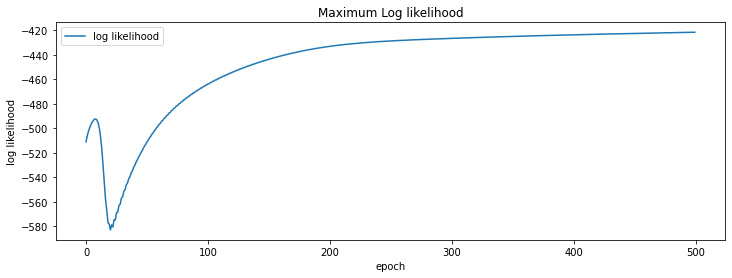

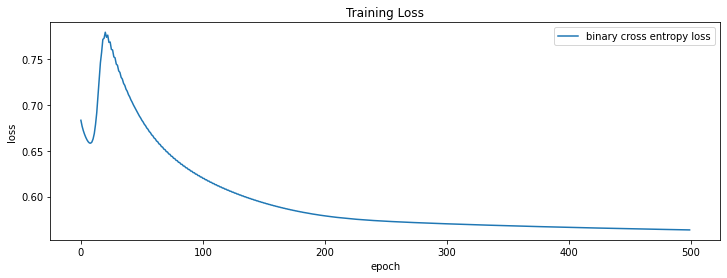

 ---------------------- FOLD KE- 2  --------------------- 
Step : 0
Log Likelihood :  -511.65254116447295  Loss :  0.6840274614498302
Step : 100
Log Likelihood :  -471.39501966341334  Loss :  0.6302072455393227
Step : 200
Log Likelihood :  -437.2506488261565  Loss :  0.5845596909440596
Step : 300
Log Likelihood :  -428.4057040611118  Loss :  0.5727348984774222
Step : 400
Log Likelihood :  -425.43945888456204  Loss :  0.568769330059575
accuracy :  0.7288135593220338
              precision    recall  f1-score   support

           0       0.96      0.64      0.77        42
           1       0.52      0.94      0.67        17

    accuracy                           0.73        59
   macro avg       0.74      0.79      0.72        59
weighted avg       0.84      0.73      0.74        59



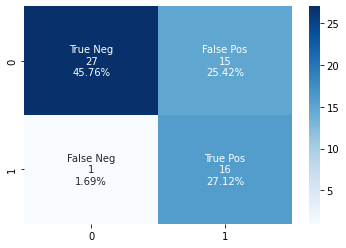

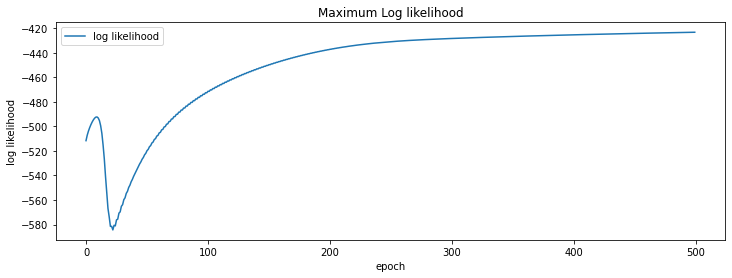

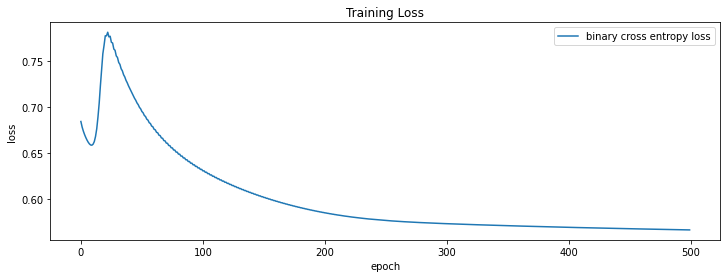

 ---------------------- FOLD KE- 3  --------------------- 
Step : 0
Log Likelihood :  -511.6148441567205  Loss :  0.6839770643806423
Step : 100
Log Likelihood :  -454.7724546568435  Loss :  0.6079845650492561
Step : 200
Log Likelihood :  -427.3553415956889  Loss :  0.5713306705824718
Step : 300
Log Likelihood :  -423.0477852081575  Loss :  0.5655719053584993
Step : 400
Log Likelihood :  -420.5127514513716  Loss :  0.5621828227959513
accuracy :  0.6206896551724138
              precision    recall  f1-score   support

           0       0.86      0.57      0.69        42
           1       0.40      0.75      0.52        16

    accuracy                           0.62        58
   macro avg       0.63      0.66      0.60        58
weighted avg       0.73      0.62      0.64        58



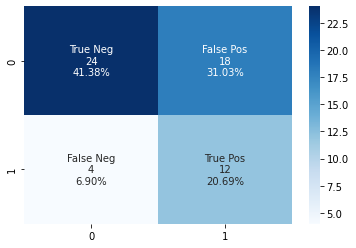

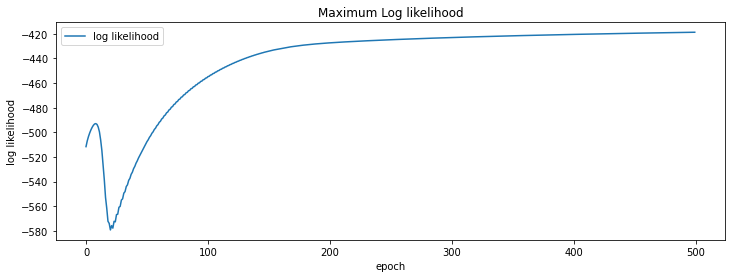

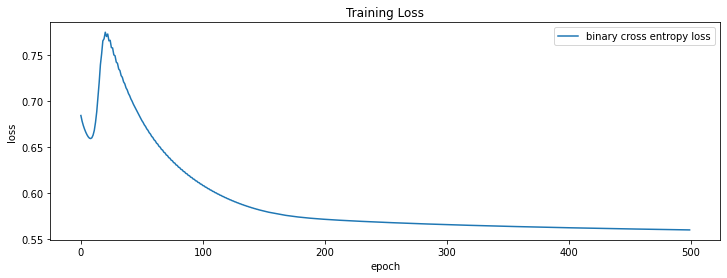

 ---------------------- FOLD KE- 4  --------------------- 
Step : 0
Log Likelihood :  -513.340632547593  Loss :  0.6862842681117554
Step : 100
Log Likelihood :  -470.96497999051473  Loss :  0.6296323261905277
Step : 200
Log Likelihood :  -433.73397232097483  Loss :  0.5798582517660091
Step : 300
Log Likelihood :  -423.9291729203103  Loss :  0.5667502311768854
Step : 400
Log Likelihood :  -420.5847948336487  Loss :  0.56227913747814
accuracy :  0.603448275862069
              precision    recall  f1-score   support

           0       0.88      0.52      0.66        42
           1       0.39      0.81      0.53        16

    accuracy                           0.60        58
   macro avg       0.64      0.67      0.59        58
weighted avg       0.75      0.60      0.62        58



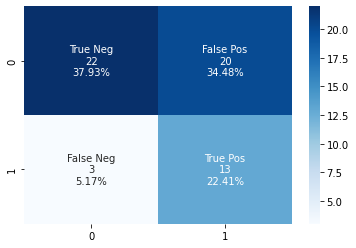

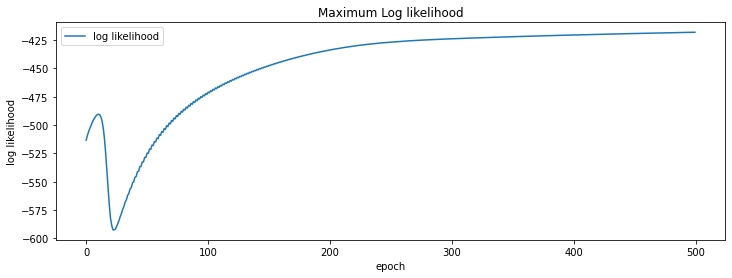

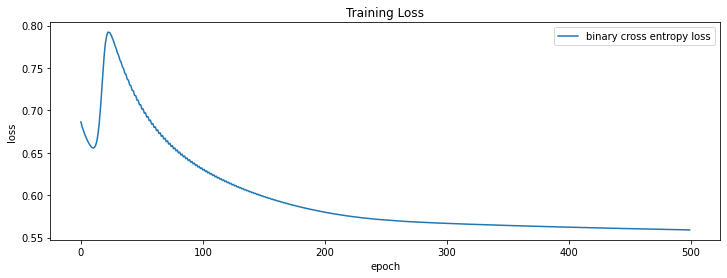

 ---------------------- FOLD KE- 5  --------------------- 
Step : 0
Log Likelihood :  -512.7353351665206  Loss :  0.6854750470140649
Step : 100
Log Likelihood :  -470.27521505083513  Loss :  0.6287101805492449
Step : 200
Log Likelihood :  -435.5349172506224  Loss :  0.5822659321532385
Step : 300
Log Likelihood :  -427.1020991651991  Loss :  0.5709921111834212
Step : 400
Log Likelihood :  -424.4078849966762  Loss :  0.5673902205837917
accuracy :  0.6379310344827587
              precision    recall  f1-score   support

           0       0.86      0.60      0.70        42
           1       0.41      0.75      0.53        16

    accuracy                           0.64        58
   macro avg       0.64      0.67      0.62        58
weighted avg       0.74      0.64      0.66        58



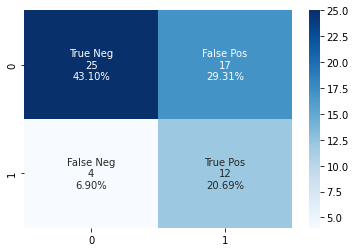

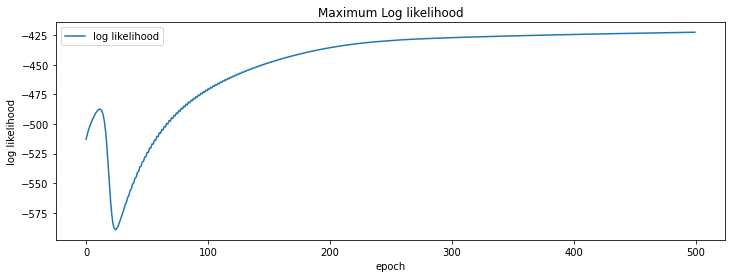

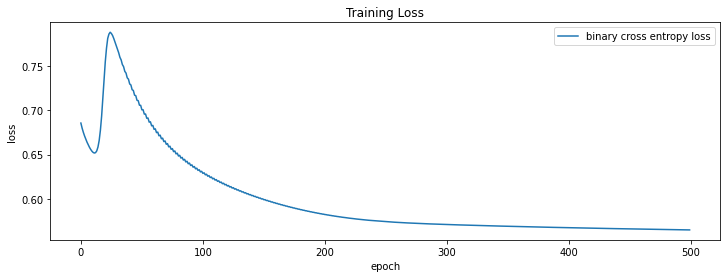

 ---------------------- FOLD KE- 6  --------------------- 
Step : 0
Log Likelihood :  -513.1974710192696  Loss :  0.6842632946923595
Step : 100
Log Likelihood :  -467.74447860157693  Loss :  0.6236593048021025
Step : 200
Log Likelihood :  -433.95517479804084  Loss :  0.5786068997307211
Step : 300
Log Likelihood :  -426.54670360262264  Loss :  0.5687289381368302
Step : 400
Log Likelihood :  -423.8097844163248  Loss :  0.5650797125550997
accuracy :  0.6551724137931034
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        41
           1       0.45      0.82      0.58        17

    accuracy                           0.66        58
   macro avg       0.67      0.70      0.64        58
weighted avg       0.76      0.66      0.67        58



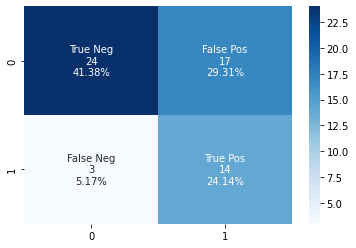

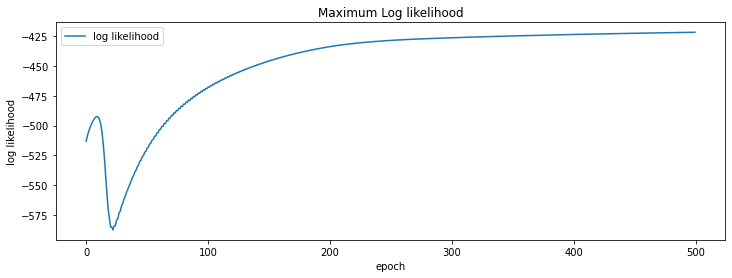

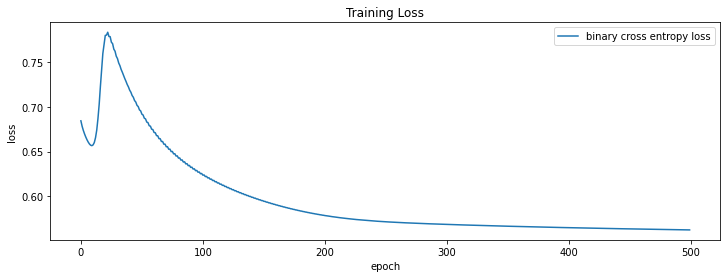

 ---------------------- FOLD KE- 7  --------------------- 
Step : 0
Log Likelihood :  -514.7667500211114  Loss :  0.6863556666948152
Step : 100
Log Likelihood :  -481.84342681515864  Loss :  0.6424579024202115
Step : 200
Log Likelihood :  -439.88117175120317  Loss :  0.5865082290016043
Step : 300
Log Likelihood :  -426.44859936966026  Loss :  0.5685981324928804
Step : 400
Log Likelihood :  -423.2614253188424  Loss :  0.5643485670917898
accuracy :  0.6206896551724138
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        41
           1       0.42      0.82      0.56        17

    accuracy                           0.62        58
   macro avg       0.65      0.68      0.61        58
weighted avg       0.75      0.62      0.64        58



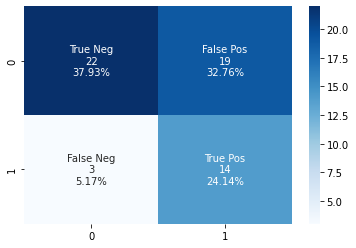

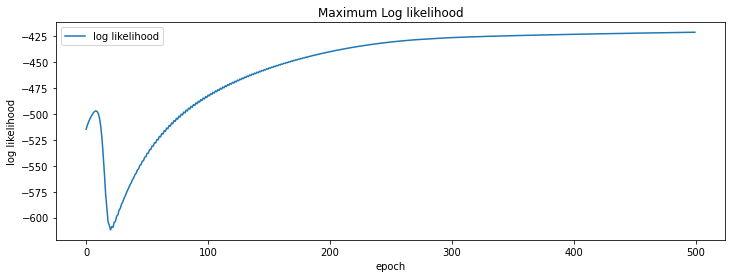

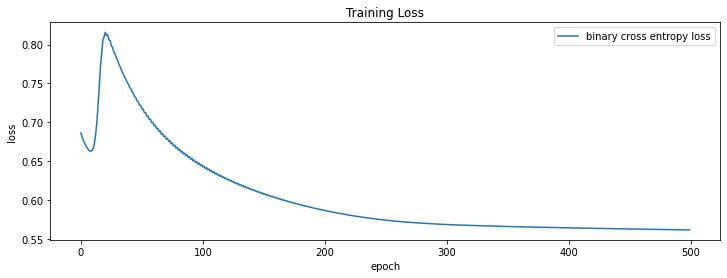

 ---------------------- FOLD KE- 8  --------------------- 
Step : 0
Log Likelihood :  -514.289106282916  Loss :  0.6857188083772213
Step : 100
Log Likelihood :  -463.44900259893416  Loss :  0.6179320034652456
Step : 200
Log Likelihood :  -428.43138866931224  Loss :  0.571241851559083
Step : 300
Log Likelihood :  -422.594422079536  Loss :  0.5634592294393813
Step : 400
Log Likelihood :  -419.58313099481563  Loss :  0.5594441746597542
accuracy :  0.6551724137931034
              precision    recall  f1-score   support

           0       0.92      0.56      0.70        41
           1       0.45      0.88      0.60        17

    accuracy                           0.66        58
   macro avg       0.69      0.72      0.65        58
weighted avg       0.78      0.66      0.67        58



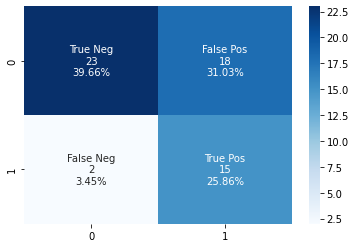

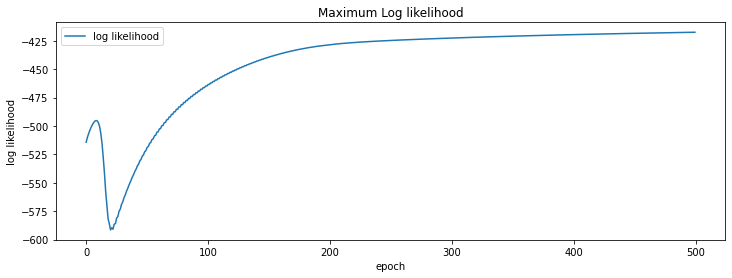

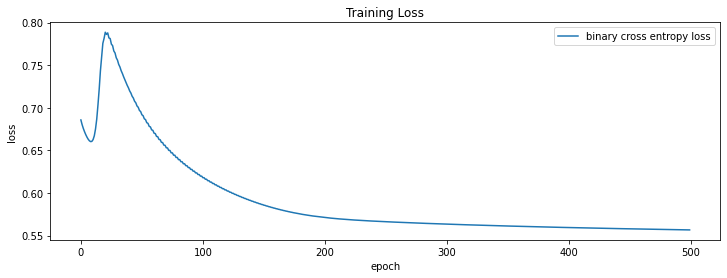

 ---------------------- FOLD KE- 9  --------------------- 
Step : 0
Log Likelihood :  -515.5396490898045  Loss :  0.6873861987864059
Step : 100
Log Likelihood :  -492.3542154221524  Loss :  0.6564722872295365
Step : 200
Log Likelihood :  -446.9451577105358  Loss :  0.595926876947381
Step : 300
Log Likelihood :  -429.5046132970677  Loss :  0.5726728177294236
Step : 400
Log Likelihood :  -425.3577422190047  Loss :  0.5671436562920062
accuracy :  0.603448275862069
              precision    recall  f1-score   support

           0       0.88      0.51      0.65        41
           1       0.41      0.82      0.55        17

    accuracy                           0.60        58
   macro avg       0.64      0.67      0.60        58
weighted avg       0.74      0.60      0.62        58



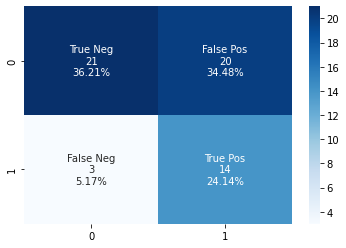

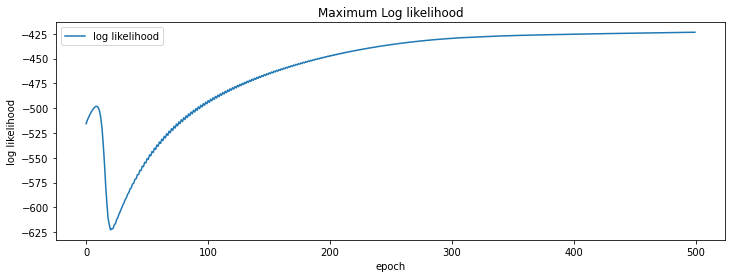

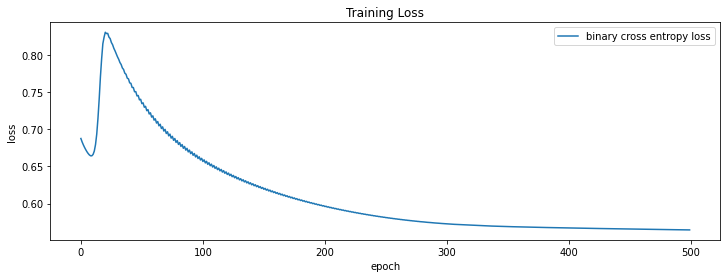

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X,Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  #print("TRAIN:", train_index , "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  sm = SMOTE(random_state = 2) 
  X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel()) 
#  print("Train : ", X_train_res.size)
  w, log_likelihood_, loss = logistic_regression(X_train_res, Y_train_res.reshape((len(Y_train_res),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train_res, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(Y_train_res,train_pred)
 # print("acc_train_  :", acc_train_)

  prob = []
  pred = []
  prob = predict(X_test, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

In [ ]:
test_df=pd.DataFrame(X_test_all, columns=['Age', 'TB', 'DB', 'Alkphos', 'Sgpt_AA', 'Sgot_AA', 'TP', 'ALB',
       'A/G Ratio', 'Female', 'Male'])
test_df["Class"]=label_encoder.inverse_transform(Y_test_all.squeeze())
test_df["prob"]=test_prob
test_df["Predicted"]=label_encoder.inverse_transform(test_pred)
test_df["Index"] = index

# **Percobaan 4 : DL + SMOTE**



In [ ]:
missed_class_index = test_df.query('Predicted != Class').index
missed_class_index

Int64Index([  4,   7,  16,  20,  22,  23,  28,  33,  37,  41,
            ...
            549, 550, 556, 558, 562, 566, 570, 571, 572, 578],
           dtype='int64', length=210)

In [ ]:
def Intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

 ---------------------- FOLD KE- 0  --------------------- 
complement_index :  [512, 513, 4, 519, 7, 526, 16, 530, 22, 23, 538, 539, 28, 541, 540, 542, 544, 33, 543, 546, 547, 549, 550, 41, 45, 46, 558, 48, 50, 51, 52, 562, 566, 55, 56, 57, 58, 59, 60, 570, 571, 572, 578, 67, 70, 72, 78, 79, 80, 85, 86, 87, 88, 90, 91, 92, 96, 102, 104, 105, 109, 123, 127, 129, 141, 147, 148, 150, 152, 156, 157, 159, 160, 168, 170, 177, 184, 187, 191, 193, 201, 202, 203, 204, 211, 212, 214, 217, 218, 219, 222, 226, 229, 233, 234, 237, 240, 241, 244, 247, 248, 249, 250, 255, 257, 259, 264, 267, 268, 272, 275, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 305, 309, 310, 315, 316, 317, 319, 323, 329, 333, 336, 341, 345, 357, 360, 362, 371, 373, 375, 378, 379, 384, 386, 387, 389, 391, 392, 393, 396, 397, 400, 402, 411, 415, 416, 418, 430, 437, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 461, 467, 469, 474, 475, 476, 483, 487, 491, 492, 495, 504, 507, 510]
Step : 0
Log Likelihood : 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

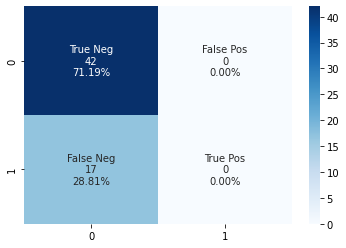

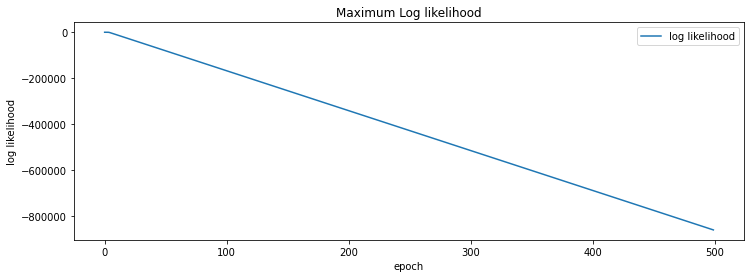

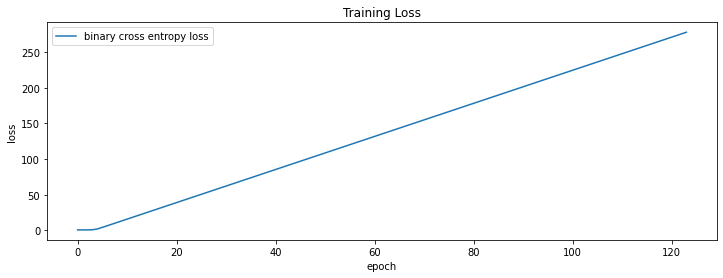

 ---------------------- FOLD KE- 1  --------------------- 
complement_index :  [512, 513, 514, 4, 7, 519, 526, 527, 16, 530, 20, 532, 22, 23, 539, 28, 541, 540, 542, 543, 33, 544, 546, 547, 37, 549, 41, 556, 558, 48, 50, 51, 52, 562, 566, 55, 57, 58, 59, 60, 570, 571, 572, 578, 67, 69, 70, 78, 79, 80, 85, 86, 87, 88, 90, 91, 92, 93, 96, 101, 102, 105, 109, 118, 123, 127, 129, 141, 147, 148, 150, 152, 156, 157, 159, 160, 161, 168, 170, 177, 184, 185, 187, 191, 193, 199, 201, 202, 203, 204, 211, 212, 214, 217, 218, 222, 226, 229, 233, 234, 237, 241, 244, 247, 248, 249, 250, 255, 257, 264, 267, 268, 272, 275, 276, 277, 279, 280, 282, 292, 293, 294, 296, 298, 299, 300, 303, 305, 307, 309, 310, 315, 316, 317, 319, 323, 329, 333, 336, 341, 345, 357, 360, 362, 371, 375, 378, 384, 386, 387, 389, 392, 393, 396, 397, 400, 402, 408, 411, 415, 416, 418, 419, 425, 430, 435, 436, 437, 441, 442, 445, 448, 449, 452, 453, 457, 458, 461, 470, 474, 475, 482, 487, 491, 495, 502, 504, 507, 510]
Step : 0
Lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

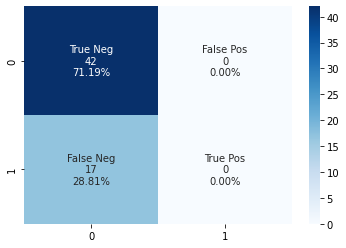

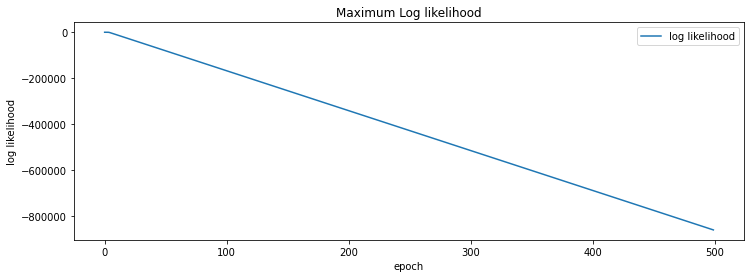

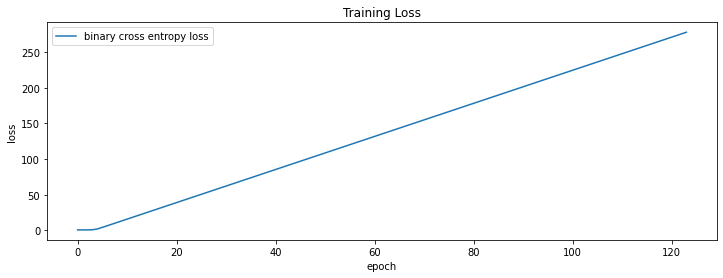

 ---------------------- FOLD KE- 2  --------------------- 
complement_index :  [512, 513, 514, 4, 519, 526, 527, 16, 530, 20, 532, 22, 538, 539, 28, 541, 540, 542, 543, 33, 544, 546, 547, 37, 549, 550, 41, 556, 45, 46, 558, 48, 50, 51, 52, 562, 55, 56, 57, 570, 59, 60, 571, 572, 578, 67, 69, 70, 72, 78, 79, 80, 85, 86, 87, 88, 90, 91, 92, 93, 96, 101, 102, 104, 105, 109, 118, 123, 127, 129, 141, 147, 148, 152, 156, 157, 159, 160, 161, 168, 170, 184, 185, 187, 199, 202, 214, 217, 219, 229, 233, 234, 237, 240, 241, 244, 247, 248, 249, 250, 255, 257, 259, 264, 267, 272, 275, 276, 277, 279, 280, 282, 284, 293, 294, 296, 298, 299, 300, 303, 305, 307, 309, 310, 315, 316, 317, 319, 323, 329, 333, 336, 341, 345, 357, 360, 362, 371, 373, 375, 378, 379, 384, 386, 387, 389, 391, 392, 393, 396, 397, 400, 402, 408, 411, 415, 416, 418, 419, 425, 430, 435, 436, 437, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 458, 461, 467, 469, 470, 474, 475, 476, 482, 483, 487, 491, 492, 502, 504, 507, 510]
S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

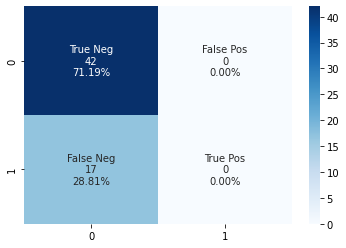

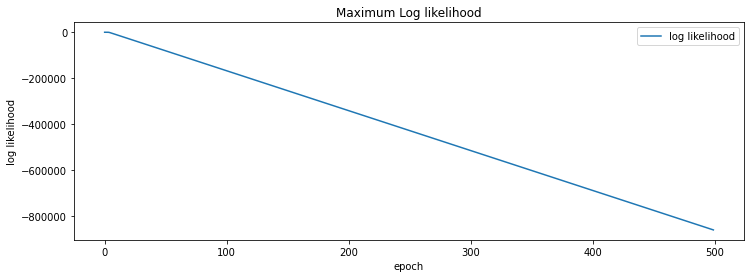

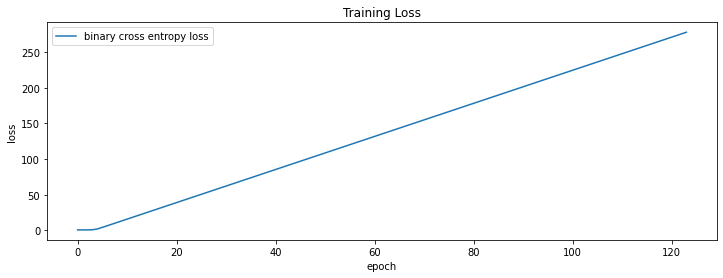

 ---------------------- FOLD KE- 3  --------------------- 
complement_index :  [512, 513, 514, 4, 7, 519, 526, 527, 16, 530, 20, 532, 22, 23, 538, 28, 540, 542, 543, 544, 33, 546, 547, 37, 549, 550, 41, 556, 45, 46, 558, 48, 50, 51, 52, 562, 566, 55, 56, 57, 58, 59, 570, 571, 572, 67, 69, 70, 72, 78, 79, 80, 85, 86, 88, 90, 91, 92, 93, 96, 101, 102, 104, 118, 123, 127, 129, 147, 148, 150, 152, 157, 159, 160, 161, 168, 170, 177, 184, 185, 191, 193, 199, 201, 202, 203, 204, 211, 212, 214, 217, 218, 219, 222, 226, 229, 233, 234, 237, 240, 241, 247, 248, 249, 250, 255, 257, 259, 264, 267, 268, 272, 275, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 303, 305, 307, 309, 315, 317, 319, 329, 333, 341, 345, 357, 360, 362, 371, 373, 375, 378, 379, 384, 386, 387, 389, 391, 392, 397, 400, 402, 408, 411, 415, 416, 418, 419, 425, 430, 435, 436, 439, 441, 442, 443, 445, 448, 449, 452, 457, 458, 461, 467, 469, 470, 474, 475, 476, 482, 483, 487, 491, 492, 495, 502, 504, 507, 510]
Ste

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

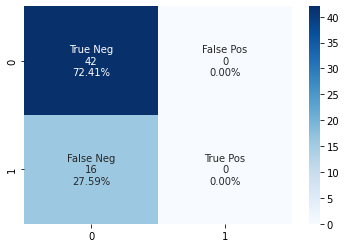

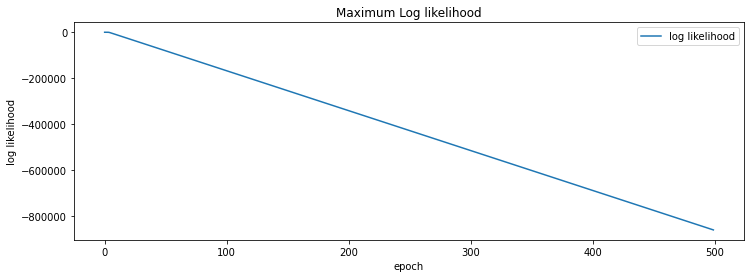

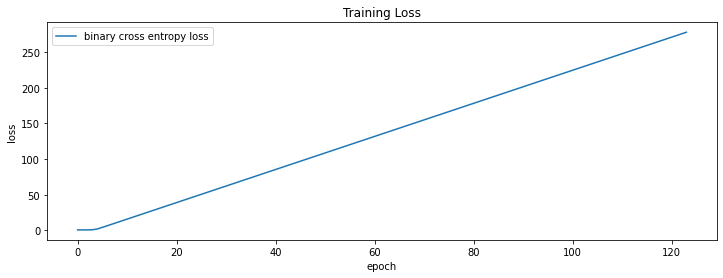

 ---------------------- FOLD KE- 4  --------------------- 
complement_index :  [512, 513, 514, 4, 7, 519, 526, 527, 530, 20, 532, 22, 23, 538, 539, 28, 541, 542, 543, 544, 33, 546, 547, 37, 549, 550, 41, 556, 45, 46, 48, 50, 51, 52, 562, 566, 56, 57, 58, 570, 60, 571, 578, 67, 69, 70, 72, 78, 79, 80, 86, 87, 91, 92, 93, 96, 101, 102, 104, 105, 109, 118, 123, 127, 129, 141, 147, 148, 150, 152, 156, 157, 160, 161, 177, 184, 185, 187, 191, 193, 199, 201, 202, 203, 204, 211, 212, 214, 217, 218, 219, 222, 226, 229, 233, 234, 237, 240, 241, 244, 247, 248, 250, 255, 257, 259, 264, 267, 268, 272, 275, 279, 280, 282, 284, 292, 294, 296, 298, 299, 303, 307, 310, 315, 316, 319, 323, 329, 336, 341, 345, 360, 371, 373, 375, 378, 379, 384, 386, 387, 389, 391, 392, 393, 396, 397, 400, 402, 408, 411, 415, 416, 418, 419, 425, 435, 436, 437, 439, 441, 442, 443, 445, 449, 452, 453, 457, 458, 467, 469, 470, 474, 475, 476, 482, 483, 487, 491, 492, 495, 502, 504, 507, 510]
Step : 0
Log Likelihood :  -515.53

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

accuracy :  0.7241379310344828
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        42
           1       0.00      0.00      0.00        16

    accuracy                           0.72        58
   macro avg       0.36      0.50      0.42        58
weighted avg       0.52      0.72      0.61        58



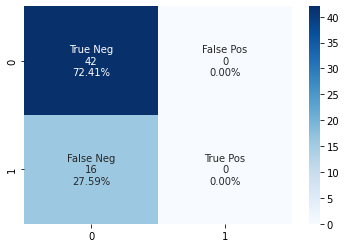

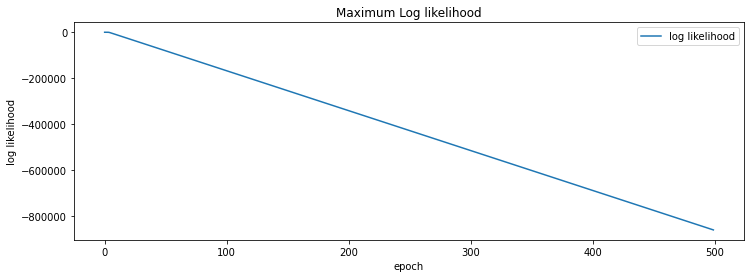

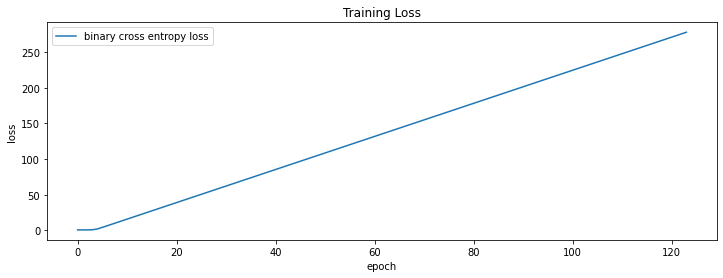

 ---------------------- FOLD KE- 5  --------------------- 
complement_index :  [512, 513, 514, 4, 7, 519, 526, 527, 16, 530, 20, 532, 23, 538, 539, 28, 541, 540, 542, 33, 37, 549, 550, 41, 556, 45, 46, 558, 48, 562, 51, 52, 566, 55, 56, 57, 58, 59, 60, 570, 571, 572, 578, 67, 69, 70, 72, 78, 80, 85, 86, 87, 88, 90, 91, 92, 93, 96, 101, 102, 104, 105, 109, 118, 123, 127, 129, 141, 147, 148, 150, 152, 156, 157, 159, 160, 161, 168, 170, 177, 184, 185, 187, 191, 193, 199, 201, 202, 203, 204, 211, 212, 214, 217, 218, 219, 222, 226, 229, 233, 234, 237, 240, 241, 244, 247, 248, 249, 250, 255, 257, 259, 264, 267, 268, 272, 275, 276, 277, 279, 282, 284, 292, 293, 294, 298, 300, 303, 305, 307, 309, 310, 315, 316, 317, 319, 323, 333, 336, 341, 345, 357, 360, 362, 371, 373, 375, 378, 379, 384, 386, 387, 389, 391, 393, 396, 400, 402, 408, 411, 415, 416, 419, 425, 430, 435, 436, 437, 439, 441, 442, 443, 445, 448, 449, 452, 453, 458, 461, 467, 469, 470, 474, 475, 476, 482, 483, 487, 492, 495, 502, 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Step : 300
Log Likelihood :  -515866.4827655456  Loss :  nan
Step : 400
Log Likelihood :  -689657.6280965379  Loss :  nan
accuracy :  0.7241379310344828
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        42
           1       0.00      0.00      0.00        16

    accuracy                           0.72        58
   macro avg       0.36      0.50      0.42        58
weighted avg       0.52      0.72      0.61        58



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

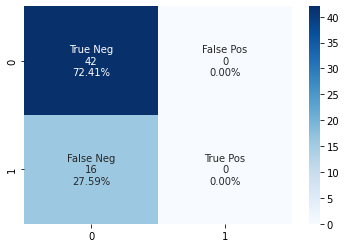

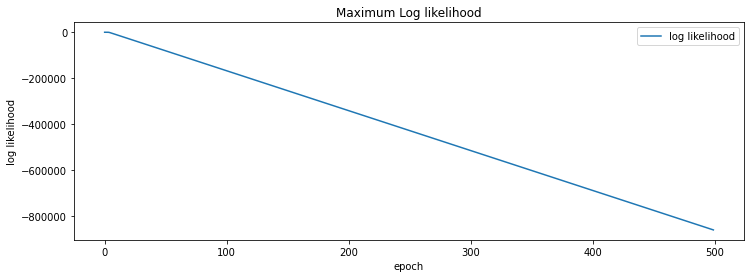

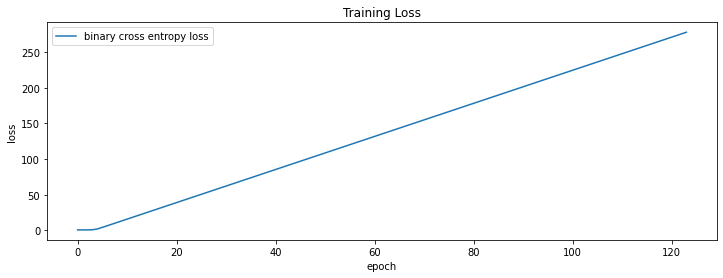

 ---------------------- FOLD KE- 6  --------------------- 
complement_index :  [512, 513, 514, 7, 527, 16, 530, 20, 532, 22, 23, 538, 539, 540, 541, 542, 543, 544, 33, 546, 547, 37, 550, 556, 45, 46, 558, 48, 50, 51, 52, 562, 566, 55, 56, 57, 58, 59, 60, 571, 572, 578, 67, 69, 72, 78, 79, 80, 85, 86, 87, 88, 90, 92, 93, 96, 101, 104, 105, 109, 118, 127, 141, 148, 150, 152, 156, 159, 160, 161, 168, 170, 177, 185, 187, 191, 193, 199, 201, 202, 203, 204, 211, 212, 214, 217, 218, 219, 222, 226, 229, 233, 234, 237, 240, 241, 244, 249, 255, 257, 259, 264, 267, 268, 275, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 303, 305, 307, 309, 310, 316, 317, 319, 323, 329, 333, 336, 341, 345, 357, 360, 362, 371, 373, 375, 378, 379, 384, 386, 387, 389, 391, 392, 393, 396, 397, 400, 408, 415, 416, 418, 419, 425, 430, 435, 436, 437, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 458, 461, 467, 469, 470, 475, 476, 482, 483, 487, 491, 492, 495, 502, 504, 510]
Step : 0
Log Likelihood 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Step : 300
Log Likelihood :  -515866.4827655456  Loss :  nan
Step : 400
Log Likelihood :  -689657.6280965379  Loss :  nan
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

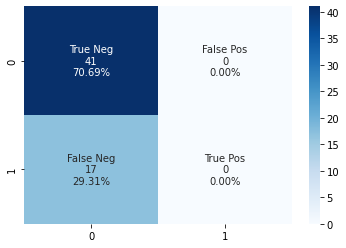

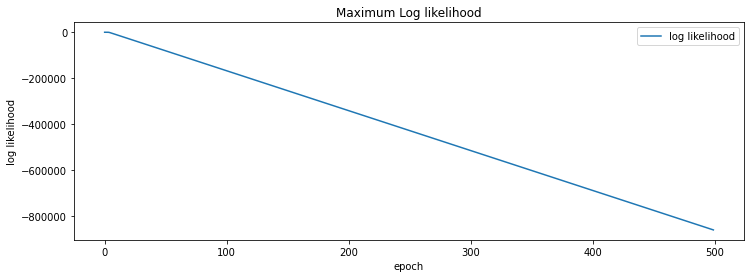

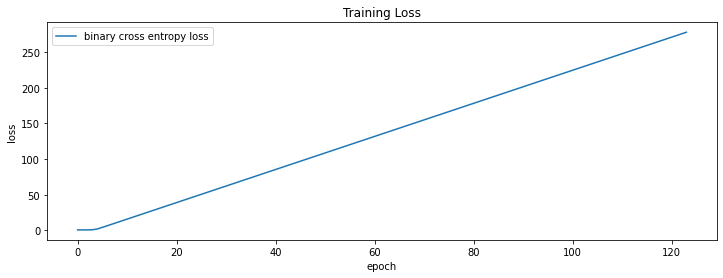

 ---------------------- FOLD KE- 7  --------------------- 
complement_index :  [512, 513, 514, 4, 7, 519, 526, 527, 16, 530, 20, 532, 22, 23, 538, 539, 28, 541, 540, 543, 544, 33, 546, 547, 37, 549, 550, 41, 556, 45, 46, 558, 48, 50, 562, 52, 566, 55, 56, 58, 59, 60, 570, 571, 572, 578, 69, 70, 72, 78, 79, 85, 86, 87, 88, 90, 91, 93, 96, 101, 102, 104, 105, 109, 118, 123, 127, 129, 141, 147, 148, 150, 152, 156, 157, 159, 161, 168, 170, 177, 184, 185, 187, 191, 193, 199, 201, 203, 204, 211, 212, 214, 217, 218, 219, 222, 226, 229, 233, 240, 241, 244, 247, 248, 249, 250, 257, 259, 264, 267, 268, 272, 275, 276, 277, 280, 284, 292, 293, 294, 296, 298, 299, 300, 303, 305, 307, 309, 310, 315, 316, 317, 319, 323, 329, 333, 336, 341, 345, 357, 360, 362, 371, 373, 375, 379, 384, 389, 391, 392, 393, 396, 397, 400, 402, 408, 411, 415, 416, 418, 419, 425, 430, 435, 436, 437, 439, 441, 443, 448, 452, 453, 457, 458, 461, 467, 469, 470, 474, 475, 476, 482, 483, 487, 491, 492, 495, 502, 504, 507, 510]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



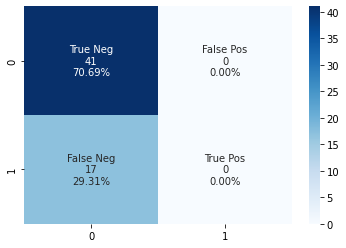

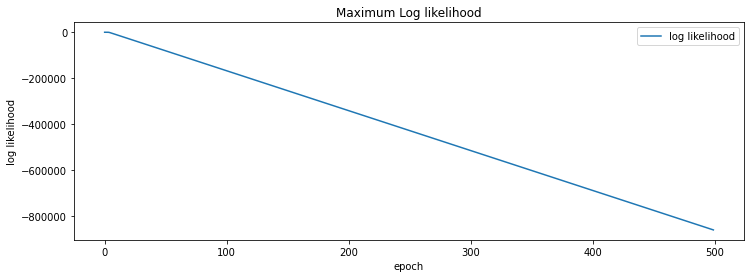

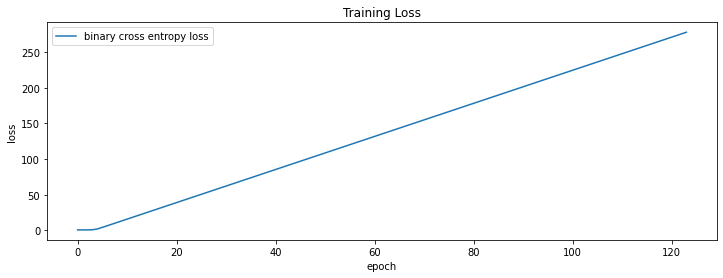

 ---------------------- FOLD KE- 8  --------------------- 
complement_index :  [513, 514, 4, 519, 7, 526, 527, 16, 530, 20, 532, 22, 23, 538, 539, 28, 541, 540, 542, 543, 33, 544, 546, 547, 37, 549, 550, 41, 556, 45, 46, 558, 50, 51, 566, 55, 56, 57, 58, 59, 60, 570, 571, 572, 578, 67, 69, 70, 72, 79, 80, 85, 86, 87, 88, 90, 91, 92, 93, 101, 102, 104, 105, 109, 118, 123, 127, 129, 141, 147, 150, 152, 156, 157, 159, 160, 161, 168, 170, 177, 184, 185, 187, 191, 193, 199, 201, 202, 203, 204, 211, 212, 214, 218, 219, 222, 226, 234, 237, 240, 241, 244, 247, 248, 249, 250, 255, 257, 259, 267, 268, 272, 275, 276, 277, 279, 280, 282, 284, 292, 293, 296, 299, 300, 303, 305, 307, 309, 310, 315, 316, 317, 323, 329, 333, 336, 357, 362, 373, 375, 378, 379, 386, 387, 391, 392, 393, 396, 397, 400, 402, 408, 411, 418, 419, 425, 430, 435, 436, 437, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 458, 461, 467, 469, 470, 474, 475, 476, 482, 483, 487, 491, 492, 495, 502, 504, 507, 510]
Step : 0
Log Lik

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Step : 300
Log Likelihood :  -515866.4827655456  Loss :  nan
Step : 400
Log Likelihood :  -689657.6280965379  Loss :  nan
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

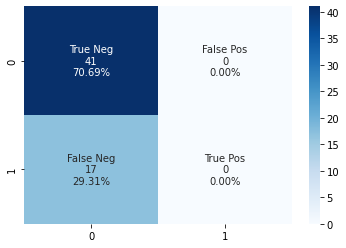

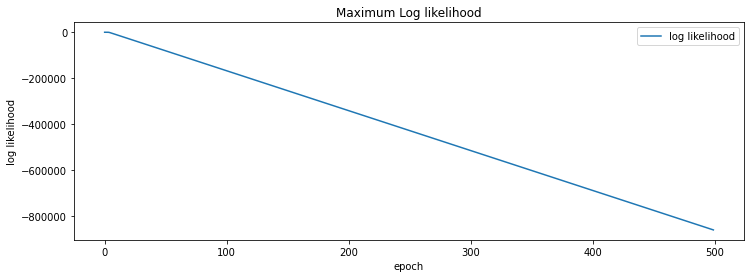

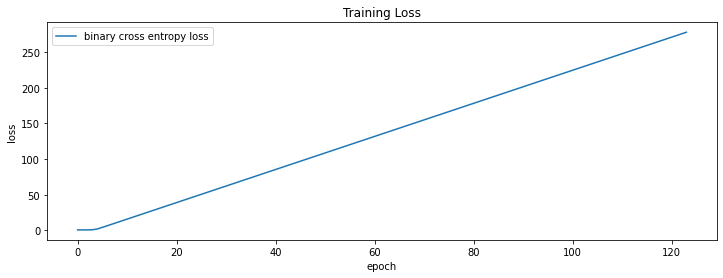

 ---------------------- FOLD KE- 9  --------------------- 
complement_index :  [512, 514, 4, 519, 7, 526, 527, 16, 20, 532, 22, 23, 538, 539, 28, 541, 540, 542, 543, 544, 546, 547, 37, 549, 550, 41, 556, 45, 46, 558, 48, 50, 51, 52, 562, 566, 55, 56, 57, 58, 59, 60, 570, 572, 578, 67, 69, 70, 72, 78, 79, 80, 85, 87, 88, 90, 91, 92, 93, 96, 101, 102, 104, 105, 109, 118, 123, 129, 141, 147, 148, 150, 156, 157, 159, 160, 161, 168, 170, 177, 184, 185, 187, 191, 193, 199, 201, 202, 203, 204, 211, 212, 217, 218, 219, 222, 226, 229, 233, 234, 237, 240, 244, 247, 248, 249, 250, 255, 259, 264, 268, 272, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 303, 305, 307, 309, 310, 315, 316, 317, 319, 323, 329, 333, 336, 341, 345, 357, 360, 362, 371, 373, 378, 379, 384, 386, 387, 389, 391, 392, 393, 396, 397, 402, 408, 411, 415, 416, 418, 419, 425, 430, 435, 436, 437, 439, 442, 443, 445, 448, 449, 453, 457, 458, 461, 467, 469, 470, 474, 476, 482, 483, 491, 492, 495, 502, 507]
Step : 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.



Log Likelihood :  -689657.6280965379  Loss :  nan
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

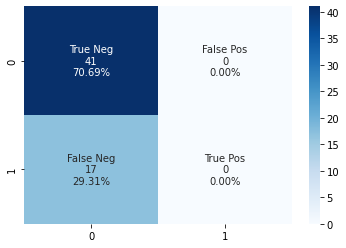

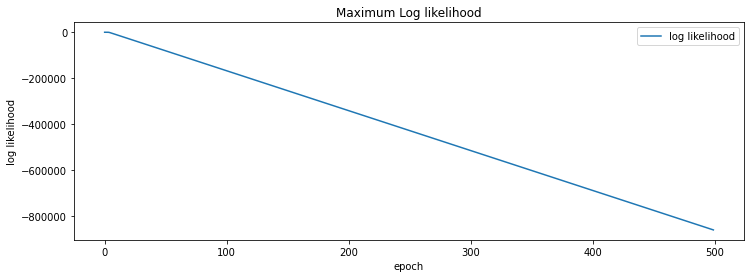

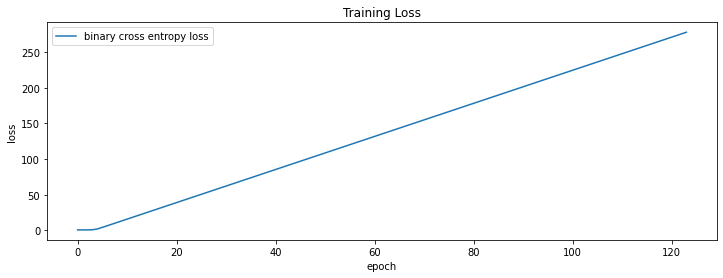

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  complement_index = Intersection(missed_class_index, train_index)
  print("complement_index : ", complement_index)
  X_train, X_test = X[complement_index], X[test_index]
  Y_train, Y_test = Y[complement_index], Y[test_index]
  w, log_likelihood_, loss = complement_logistic_regression(X_train_res, Y_train_res.reshape((len(Y_train_res),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train_res, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(Y_train_res,train_pred)
 # print("acc_train_  :", acc_train_)

  prob = []
  pred = []
  prob = predict(X_test, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

# **Percobaan 5 : Logistic Regression, CFS**

In [ ]:
# load label from encoder.pkl
label_encoder = label_encoder_file('encoder.pkl')

In [ ]:
# load data X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = data_h5_file('data.h5')

In [ ]:
# data yang digunakan untuk correlation feature selection
dat=data_for_cfs
dat.head()

Age  Gender    TB   DB  Alkphos  ...  Sgot_AA   TP  ALB  A/G Ratio          Class
0   65  Female   0.7  0.1      187  ...       18  6.8  3.3       0.90  Liver Patient
1   62    Male  10.9  5.5      699  ...      100  7.5  3.2       0.74  Liver Patient
2   62    Male   7.3  4.1      490  ...       68  7.0  3.3       0.89  Liver Patient
3   58    Male   1.0  0.4      182  ...       20  6.8  3.4       1.00  Liver Patient
4   72    Male   3.9  2.0      195  ...       59  7.3  2.4       0.40  Liver Patient

[5 rows x 11 columns]

In [ ]:
# data correlation matrix
dat['Gender'] =dat['Gender'].astype('category').cat.codes
dat['Class'] =dat['Class'].astype('category').cat.codes
dat=(dat-dat.min())/(dat.max()-dat.min())

corr_matrix = dat.corr()
print(corr_matrix["Class"].sort_values(ascending=False))

Class        1.000000
A/G Ratio    0.162319
ALB          0.161388
TP           0.035008
Gender      -0.082416
Age         -0.137351
Sgot_AA     -0.151934
Sgpt_AA     -0.163416
Alkphos     -0.184866
TB          -0.220208
DB          -0.246046
Name: Class, dtype: float64


In [ ]:
# buat correlation matrix dataframa
corr_df=pd.DataFrame(corr_matrix, index=corr_matrix.columns.values,columns=corr_matrix.columns.values)

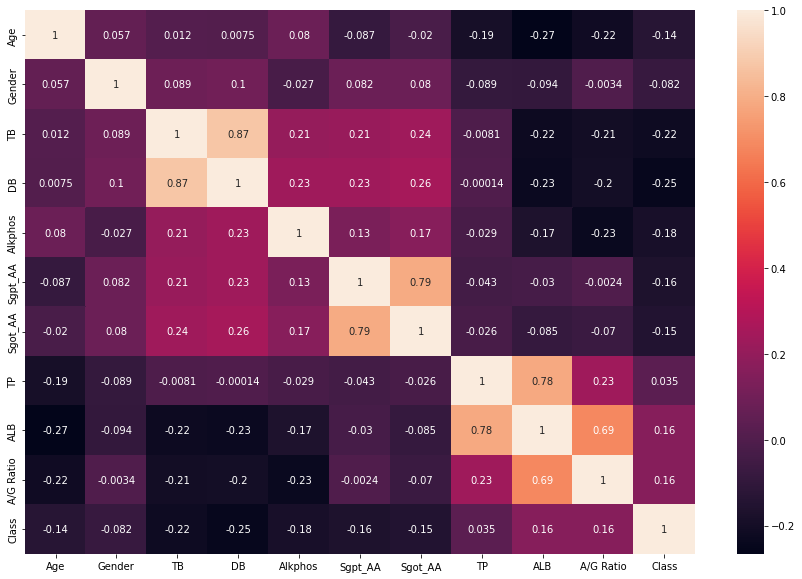

In [ ]:
# correlation matrix heatmap
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, annot=True)
plt.show()

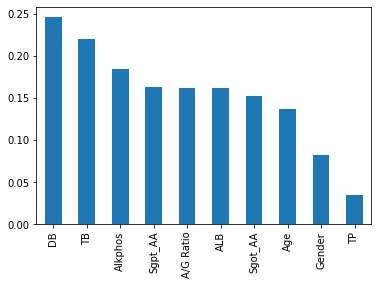

In [ ]:
# plot fitur paling memiliki korelasi dengan Class
abs(corr_matrix["Class"]).sort_values(ascending=False).drop(index="Class").plot(kind="bar")
plt.show()

In [ ]:
# melakukan seleksi fitur
col_x=feature_selection(corr_matrix, mode="threshold", value=0.16).index
col_y=["Class"]
print(feature_selection(corr_matrix, mode="threshold", value=0.16))

TB          -0.220208
DB          -0.246046
Alkphos     -0.184866
Sgpt_AA     -0.163416
ALB          0.161388
A/G Ratio    0.162319
Name: Class, dtype: float64


In [ ]:
dat.drop(columns="TP", inplace=True)

In [ ]:
dat.drop(columns="Gender", inplace=True)

In [ ]:

dat.drop(columns="Age", inplace=True)

In [ ]:

dat.drop(columns="Sgot_AA", inplace=True)

In [ ]:
def showMatrix(Y_test,pred, log_likelihood_, loss):
  cf_matrix=confusion_matrix(Y_test,pred)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(log_likelihood_)), log_likelihood_, label = "log likelihood")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('log likelihood')
  # memberi judul
  plt.title('Maximum Log likelihood')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(loss)), loss, label = "binary cross entropy loss")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('loss')
  # memberi judul
  plt.title('Training Loss')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

In [ ]:
def getPredictionLabel (prob):
  pred=[]
  for i in prob:
    if i <0.5:
      pred.append(0)
    else:
      pred.append(1)
  return pred

In [ ]:
dat.head()

TB        DB   Alkphos   Sgpt_AA       ALB  A/G Ratio  Class
0  0.004021  0.000000  0.060576  0.003015  0.521739      0.240    0.0
1  0.140751  0.275510  0.310699  0.027136  0.500000      0.176    0.0
2  0.092493  0.204082  0.208598  0.025126  0.521739      0.236    0.0
3  0.008043  0.015306  0.058134  0.002010  0.543478      0.280    0.0
4  0.046917  0.096939  0.064485  0.008543  0.326087      0.040    0.0

In [ ]:
# filter X_train_cfs dan X_test_cfs sesuai correlation feature index jd 6
ind=[]
for i in col_x:
  ind.append(X_col.index(i))
X_cfs=X[:,ind]

 ---------------------- FOLD KE- 0  --------------------- 
Step : 0
Log Likelihood :  -316.51040187751937  Loss :  0.6040274844990827
Step : 100
Log Likelihood :  -285.04855094964734  Loss :  0.5439857842550522
Step : 200
Log Likelihood :  -279.6596686246711  Loss :  0.53370165768067
Step : 300
Log Likelihood :  -276.9799455365419  Loss :  0.528587682321645
Step : 400
Log Likelihood :  -275.31831121719733  Loss :  0.5254166244603002
accuracy :  0.7457627118644068
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        42
           1       1.00      0.12      0.21        17

    accuracy                           0.75        59
   macro avg       0.87      0.56      0.53        59
weighted avg       0.81      0.75      0.66        59



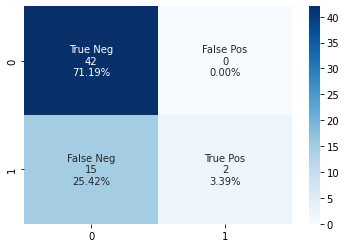

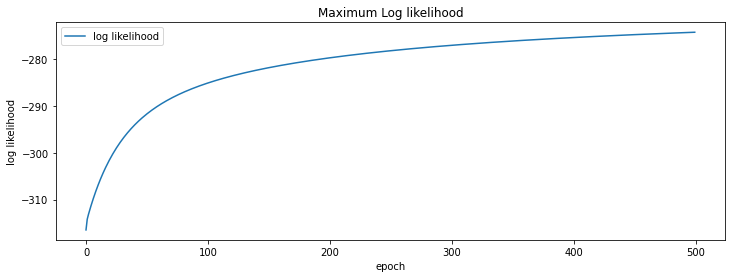

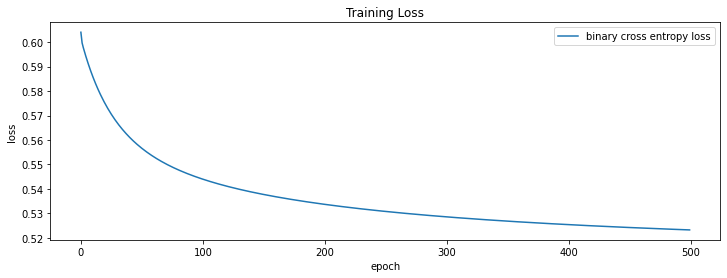

 ---------------------- FOLD KE- 1  --------------------- 
Step : 0
Log Likelihood :  -316.4012461721801  Loss :  0.6038191720843131
Step : 100
Log Likelihood :  -285.0707600273993  Loss :  0.54402816799122
Step : 200
Log Likelihood :  -279.56924971738397  Loss :  0.5335291025140916
Step : 300
Log Likelihood :  -276.7672187089375  Loss :  0.5281817150933921
Step : 400
Log Likelihood :  -274.996556314332  Loss :  0.5248025883861298
accuracy :  0.711864406779661
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        42
           1       0.00      0.00      0.00        17

    accuracy                           0.71        59
   macro avg       0.36      0.50      0.42        59
weighted avg       0.51      0.71      0.59        59



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

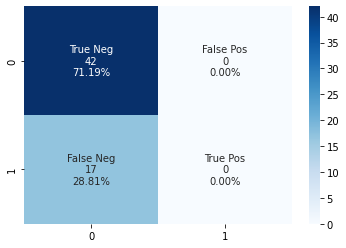

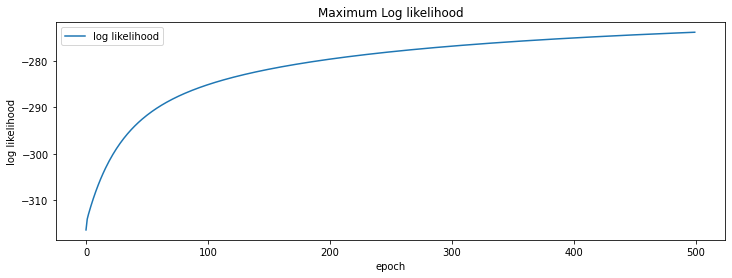

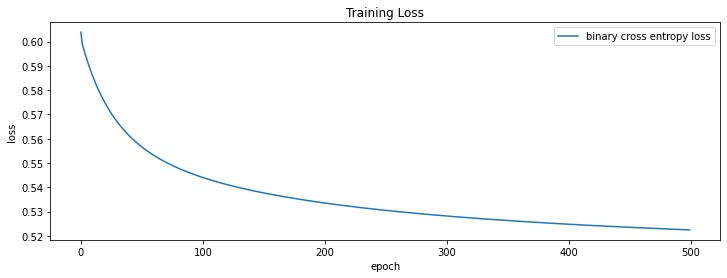

 ---------------------- FOLD KE- 2  --------------------- 
Step : 0
Log Likelihood :  -316.55346833033457  Loss :  0.6041096723861347
Step : 100
Log Likelihood :  -285.53756698453253  Loss :  0.5449190209628484
Step : 200
Log Likelihood :  -280.0961206825997  Loss :  0.5345345814553429
Step : 300
Log Likelihood :  -277.34011911328963  Loss :  0.5292750364757436
Step : 400
Log Likelihood :  -275.58704913734397  Loss :  0.5259294830865343
accuracy :  0.7288135593220338
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        42
           1       1.00      0.06      0.11        17

    accuracy                           0.73        59
   macro avg       0.86      0.53      0.48        59
weighted avg       0.80      0.73      0.63        59



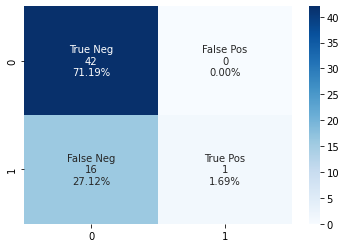

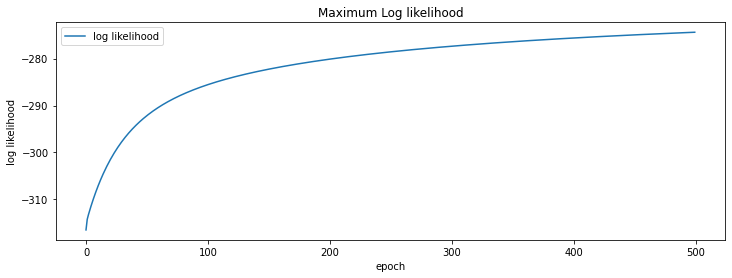

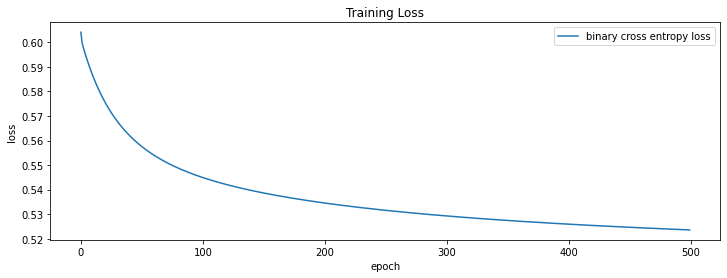

 ---------------------- FOLD KE- 3  --------------------- 
Step : 0
Log Likelihood :  -317.75351689892824  Loss :  0.6052447940931966
Step : 100
Log Likelihood :  -283.43210359863406  Loss :  0.5398706735212078
Step : 200
Log Likelihood :  -277.805604058876  Loss :  0.5291535315407162
Step : 300
Log Likelihood :  -275.0545587761783  Loss :  0.5239134452879586
Step : 400
Log Likelihood :  -273.35912901085305  Loss :  0.5206840552587677
accuracy :  0.7241379310344828
              precision    recall  f1-score   support

           0       0.73      0.98      0.84        42
           1       0.50      0.06      0.11        16

    accuracy                           0.72        58
   macro avg       0.62      0.52      0.47        58
weighted avg       0.67      0.72      0.64        58



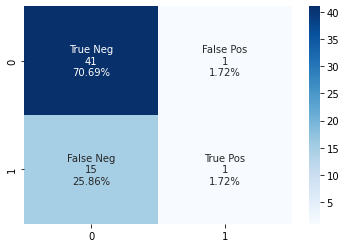

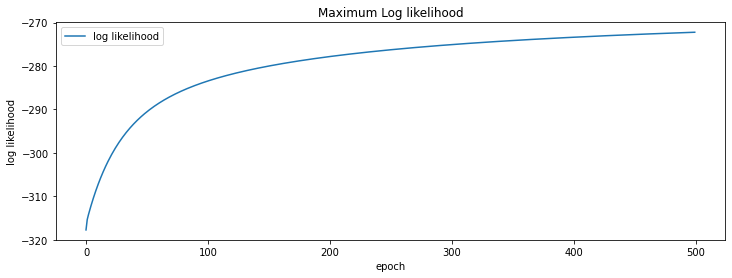

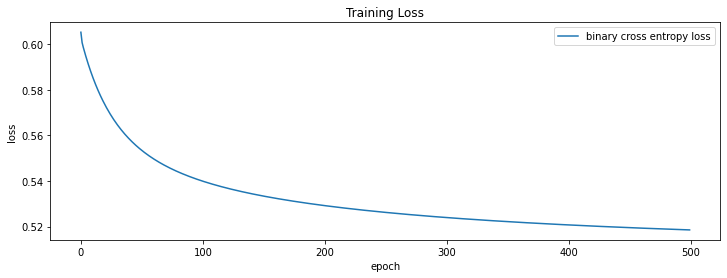

 ---------------------- FOLD KE- 4  --------------------- 
Step : 0
Log Likelihood :  -317.6603779192875  Loss :  0.6050673865129286
Step : 100
Log Likelihood :  -285.1278653800289  Loss :  0.5431006959619598
Step : 200
Log Likelihood :  -279.46947779838615  Loss :  0.5323228148540688
Step : 300
Log Likelihood :  -276.5896762635957  Loss :  0.5268374785973252
Step : 400
Log Likelihood :  -274.7602233026428  Loss :  0.5233528062907481
accuracy :  0.7413793103448276
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        42
           1       1.00      0.06      0.12        16

    accuracy                           0.74        58
   macro avg       0.87      0.53      0.48        58
weighted avg       0.81      0.74      0.65        58



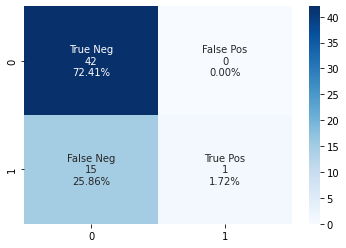

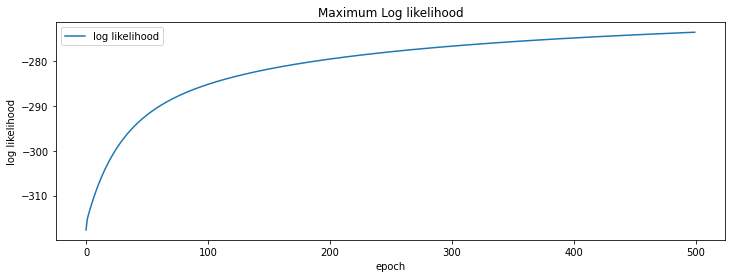

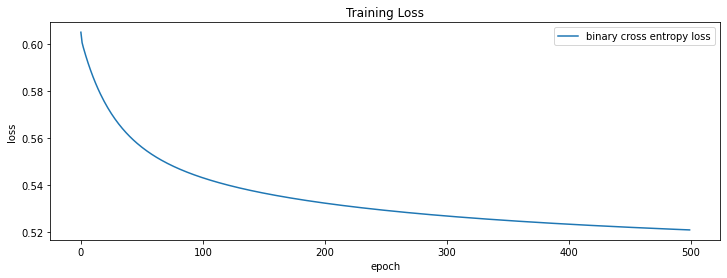

 ---------------------- FOLD KE- 5  --------------------- 
Step : 0
Log Likelihood :  -318.0089490671787  Loss :  0.6057313315565309
Step : 100
Log Likelihood :  -285.6265600003901  Loss :  0.5440505904769335
Step : 200
Log Likelihood :  -280.3755597050615  Loss :  0.534048685152498
Step : 300
Log Likelihood :  -277.7958411704858  Loss :  0.5291349355628302
Step : 400
Log Likelihood :  -276.18073574239224  Loss :  0.5260585442712233
accuracy :  0.7241379310344828
              precision    recall  f1-score   support

           0       0.73      0.98      0.84        42
           1       0.50      0.06      0.11        16

    accuracy                           0.72        58
   macro avg       0.62      0.52      0.47        58
weighted avg       0.67      0.72      0.64        58



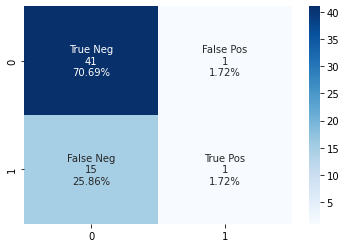

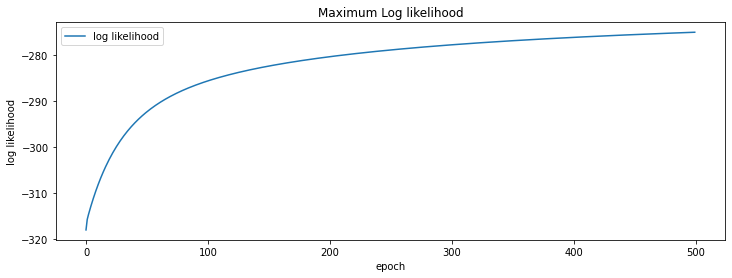

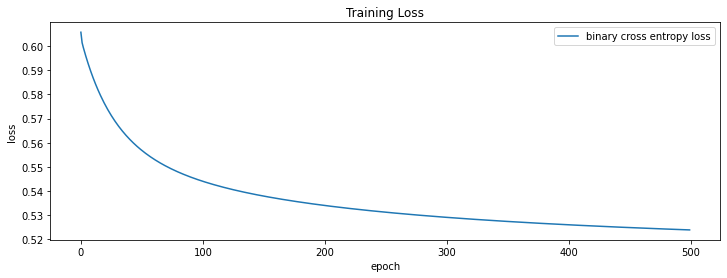

 ---------------------- FOLD KE- 6  --------------------- 
Step : 0
Log Likelihood :  -316.93296173326314  Loss :  0.6036818318728822
Step : 100
Log Likelihood :  -284.1283878583673  Loss :  0.541196929254033
Step : 200
Log Likelihood :  -278.8180436066646  Loss :  0.5310819878222183
Step : 300
Log Likelihood :  -276.19491716336756  Loss :  0.5260855565016525
Step : 400
Log Likelihood :  -274.5562270758669  Loss :  0.5229642420492703
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

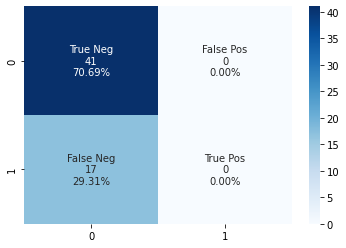

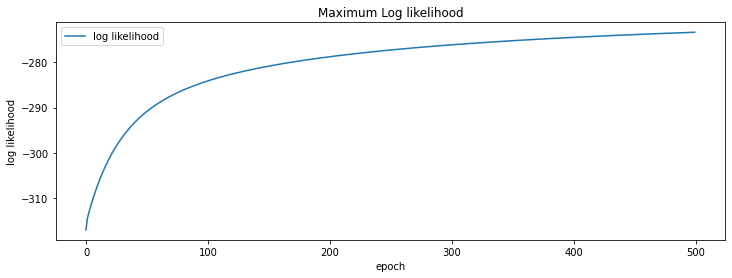

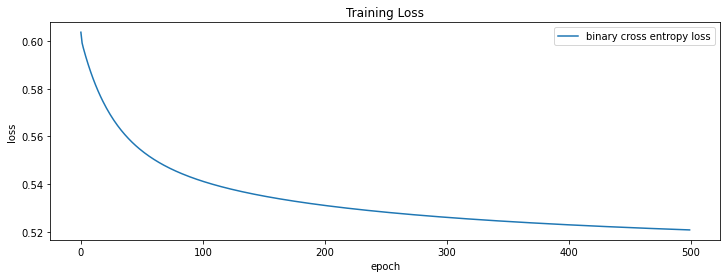

 ---------------------- FOLD KE- 7  --------------------- 
Step : 0
Log Likelihood :  -316.9170857820716  Loss :  0.6036515919658506
Step : 100
Log Likelihood :  -282.2437291056822  Loss :  0.5376071030584423
Step : 200
Log Likelihood :  -276.23656219201587  Loss :  0.5261648803657445
Step : 300
Log Likelihood :  -273.1655002708532  Loss :  0.5203152386111489
Step : 400
Log Likelihood :  -271.22173076667275  Loss :  0.5166128205079481
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

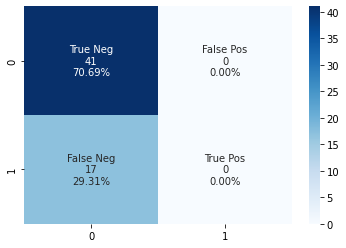

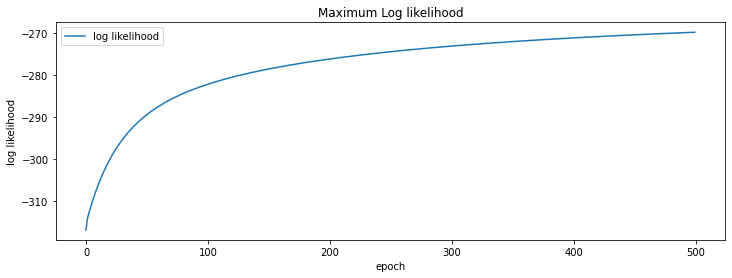

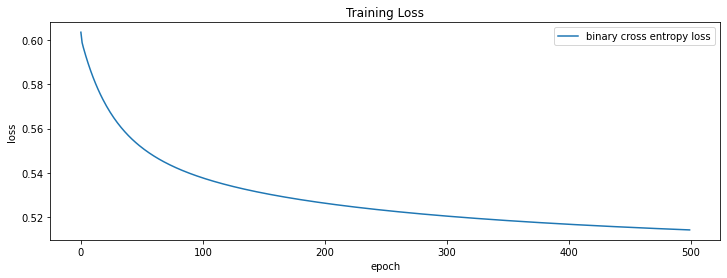

 ---------------------- FOLD KE- 8  --------------------- 
Step : 0
Log Likelihood :  -316.85785722853484  Loss :  0.6035387756733996
Step : 100
Log Likelihood :  -284.6954607885729  Loss :  0.5422770681687104
Step : 200
Log Likelihood :  -279.43807411174447  Loss :  0.5322629983080847
Step : 300
Log Likelihood :  -276.8506017761498  Loss :  0.5273344795736187
Step : 400
Log Likelihood :  -275.241137072989  Loss :  0.524268832519979
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       0.00      0.00      0.00        17

    accuracy                           0.71        58
   macro avg       0.35      0.50      0.41        58
weighted avg       0.50      0.71      0.59        58



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

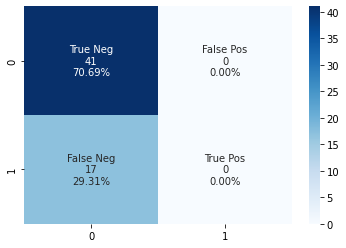

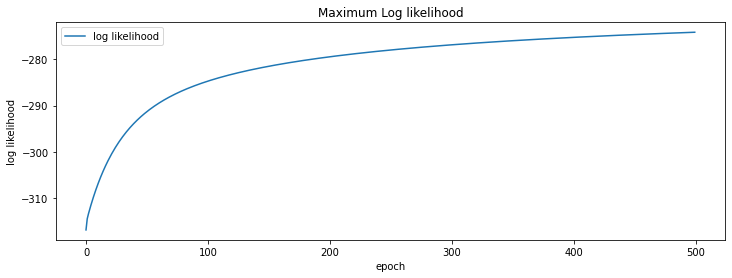

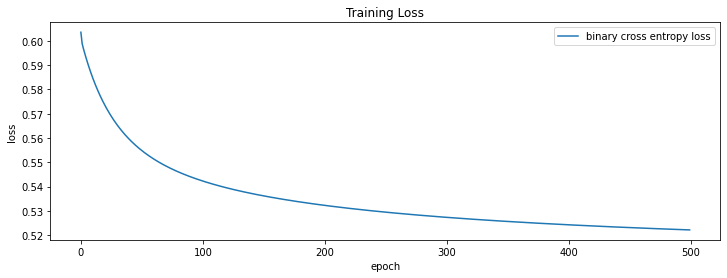

 ---------------------- FOLD KE- 9  --------------------- 
Step : 0
Log Likelihood :  -316.67817697283647  Loss :  0.6031965275673076
Step : 100
Log Likelihood :  -284.474533957227  Loss :  0.5418562551566228
Step : 200
Log Likelihood :  -278.6311956850095  Loss :  0.5307260870190657
Step : 300
Log Likelihood :  -275.6738988152605  Loss :  0.5250931406004962
Step : 400
Log Likelihood :  -273.82728836699744  Loss :  0.5215757873657094
accuracy :  0.7068965517241379
              precision    recall  f1-score   support

           0       0.71      0.98      0.82        41
           1       0.50      0.06      0.11        17

    accuracy                           0.71        58
   macro avg       0.61      0.52      0.47        58
weighted avg       0.65      0.71      0.61        58



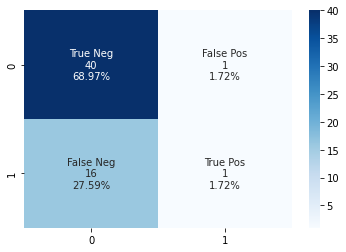

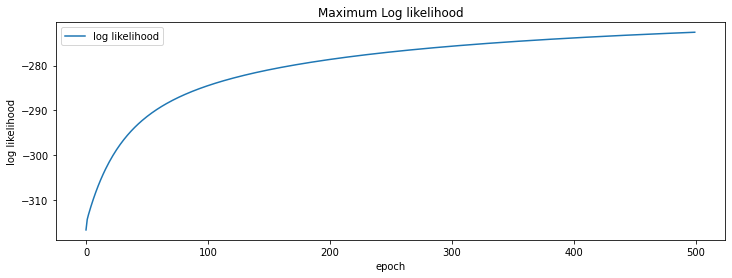

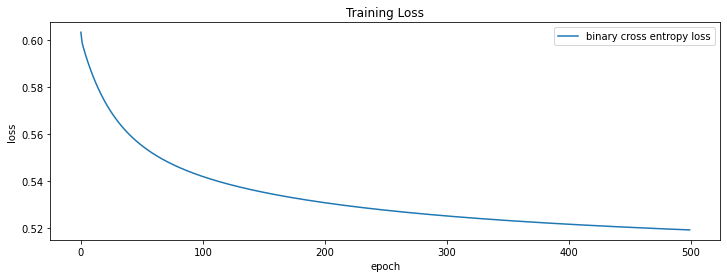

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X_cfs, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cfs, X_test_cfs = X_cfs[train_index], X_cfs[test_index]
  y_train_cfs, Y_test = Y[train_index], Y[test_index]
  w, log_likelihood_, loss = logistic_regression(X_train_cfs, y_train_cfs.reshape((len(y_train_cfs),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train_cfs, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(y_train_cfs,train_pred)
#  print("acc_train_  :", acc_test_)

  prob = []
  pred = []
  prob = predict(X_test_cfs, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test_cfs
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test_cfs))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

In [ ]:
# menyimpan data test

test_df=pd.DataFrame(X_test_all, columns=col_x)
test_df["Class"]=label_encoder.inverse_transform(Y_test_all.squeeze())
test_df["prob"]=test_prob
test_df["Predicted"]=label_encoder.inverse_transform(test_pred)
test_df["Index"] = index

In [ ]:
test_df

TB        DB   Alkphos  ...      prob      Predicted  Index
0    0.092493  0.204082  0.208598  ...  0.087299  Liver Patient      2
1    0.024129  0.045918  0.267220  ...  0.153409  Liver Patient     20
2    0.008043  0.010204  0.060576  ...  0.395831  Liver Patient     32
3    0.184987  0.392857  0.151930  ...  0.027992  Liver Patient     37
4    0.008043  0.020408  0.046409  ...  0.376825  Liver Patient     61
..        ...       ...       ...  ...       ...            ...    ...
578  0.016086  0.035714  0.081583  ...  0.308596  Liver Patient    534
579  0.004021  0.005102  0.043967  ...  0.363892  Liver Patient    545
580  0.005362  0.005102  0.110894  ...  0.263849  Liver Patient    555
581  0.009383  0.010204  0.074255  ...  0.316767  Liver Patient    571
582  0.008043  0.010204  0.074744  ...  0.452636  Liver Patient    582

[583 rows x 10 columns]

# **Percobaan 6 : DL + CFS** 

In [ ]:
# semua data test (data benar dan salah) test_df -> diambil diatro di missed clas. isi test df ada macem2
missed_class_index = test_df.query('Predicted != Class').index
missed_class_index

Int64Index([  2,   6,  10,  11,  18,  24,  25,  27,  29,  34,
            ...
            557, 560, 561, 565, 570, 574, 577, 578, 579, 582],
           dtype='int64', length=163)

In [ ]:
# intersectionnya train index dan miss index (cuman index)
# 
def Intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

 ---------------------- FOLD KE- 0  --------------------- 
complement_index :  [516, 517, 6, 518, 521, 10, 11, 526, 18, 531, 533, 534, 24, 25, 27, 29, 545, 34, 35, 550, 551, 40, 42, 557, 560, 49, 561, 565, 55, 570, 574, 63, 577, 66, 578, 68, 579, 582, 71, 73, 74, 82, 95, 96, 98, 99, 100, 103, 106, 107, 128, 129, 131, 134, 135, 140, 142, 143, 145, 158, 162, 164, 169, 171, 176, 177, 178, 187, 188, 190, 198, 205, 206, 207, 211, 215, 221, 224, 229, 230, 233, 236, 237, 239, 244, 245, 260, 262, 263, 265, 268, 271, 273, 274, 286, 308, 312, 316, 318, 320, 321, 322, 329, 330, 331, 334, 336, 339, 353, 356, 358, 363, 366, 377, 381, 385, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 417, 427, 432, 433, 437, 440, 444, 450, 451, 454, 456, 463, 468, 469, 472, 480, 485, 488, 490, 494, 500, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -97.13773705546305  Loss :  0.6432962718904838
Step : 100
Log Likelihood :  -2836.1821325187493  Loss :  18.78266312926324
Step : 200
Log Likelihood :  -5725.879348

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

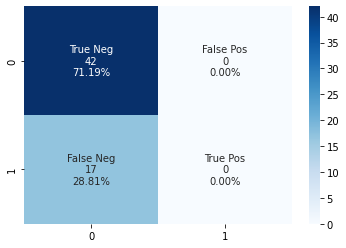

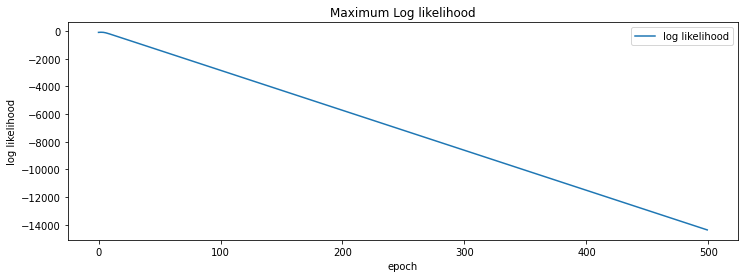

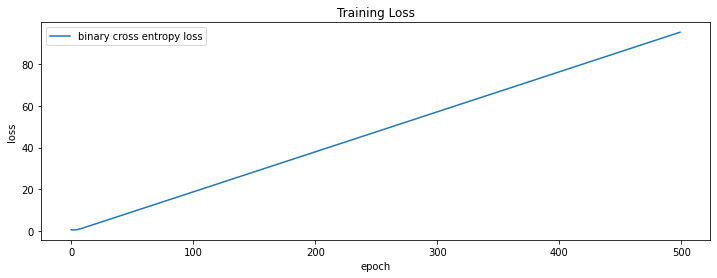

 ---------------------- FOLD KE- 1  --------------------- 
complement_index :  [2, 516, 517, 6, 518, 521, 11, 526, 18, 531, 533, 534, 25, 545, 34, 35, 551, 40, 42, 557, 560, 49, 561, 565, 55, 570, 574, 63, 65, 66, 577, 68, 578, 579, 71, 582, 73, 81, 82, 95, 96, 98, 99, 100, 103, 106, 107, 128, 129, 131, 134, 135, 140, 142, 143, 146, 158, 162, 164, 169, 171, 176, 177, 178, 187, 188, 190, 198, 205, 206, 207, 211, 215, 221, 224, 229, 230, 233, 236, 237, 239, 244, 245, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 318, 320, 322, 329, 330, 332, 336, 339, 353, 356, 358, 363, 366, 377, 381, 382, 385, 388, 390, 392, 393, 394, 395, 397, 409, 415, 417, 425, 427, 432, 433, 437, 440, 444, 450, 451, 454, 456, 462, 463, 465, 468, 472, 485, 488, 490, 494, 500, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -95.3632940372377  Loss :  0.6357552935815847
Step : 100
Log Likelihood :  -2643.043167251585  Loss :  17.620287781677234
Step : 200
Log Likelihood :  -5331.49652417319

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

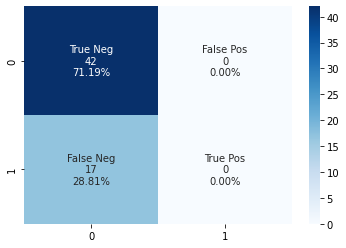

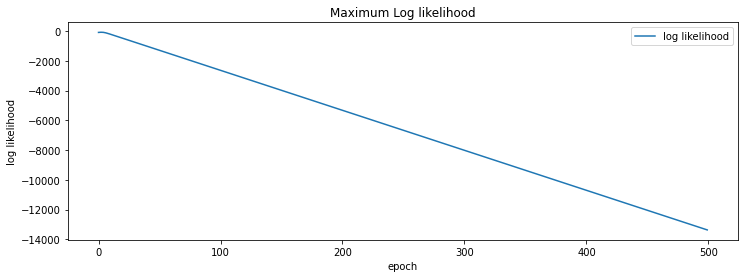

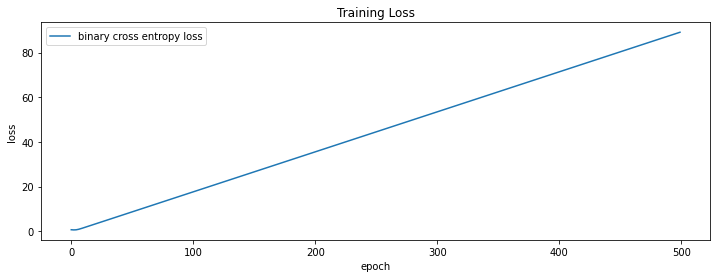

 ---------------------- FOLD KE- 2  --------------------- 
complement_index :  [2, 516, 517, 6, 518, 521, 10, 11, 526, 18, 531, 533, 534, 24, 25, 27, 29, 545, 34, 35, 550, 551, 40, 42, 557, 560, 49, 561, 565, 55, 570, 574, 65, 66, 577, 68, 578, 579, 71, 582, 74, 81, 82, 95, 96, 99, 100, 106, 107, 128, 129, 131, 134, 140, 142, 145, 146, 158, 164, 169, 171, 176, 178, 187, 190, 198, 205, 206, 207, 215, 229, 230, 233, 236, 237, 239, 244, 245, 262, 263, 265, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 318, 320, 321, 322, 329, 330, 331, 332, 334, 336, 339, 353, 356, 363, 366, 381, 382, 385, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 417, 425, 427, 432, 433, 437, 440, 444, 450, 451, 454, 456, 462, 463, 465, 468, 469, 472, 480, 488, 494, 500, 503, 504]
Step : 0
Log Likelihood :  -93.16075693973028  Loss :  0.6514738247533586
Step : 100
Log Likelihood :  -2621.6450328471988  Loss :  18.33318204788251
Step : 200
Log Likelihood :  -5301.056204391903  Loss :  37.07032310763568
Step : 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

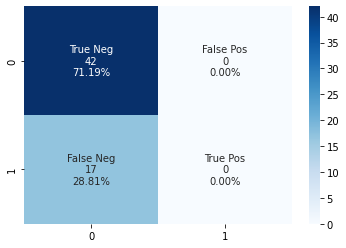

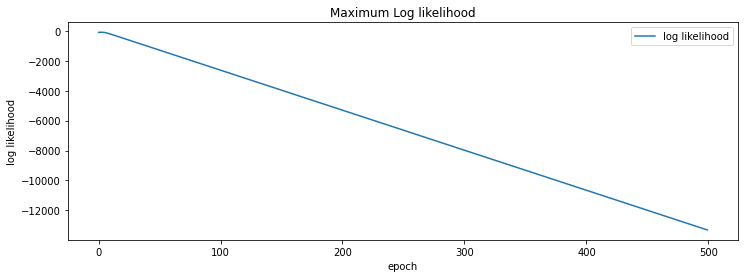

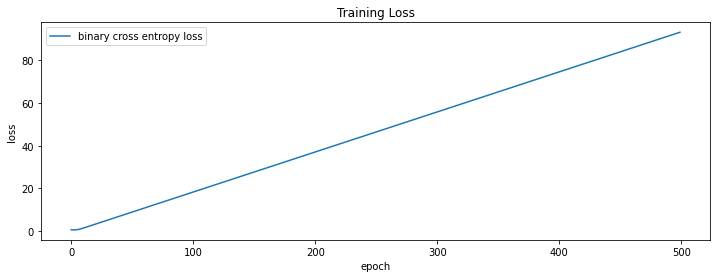

 ---------------------- FOLD KE- 3  --------------------- 
complement_index :  [2, 516, 517, 6, 518, 521, 10, 11, 526, 531, 533, 534, 24, 25, 27, 29, 545, 34, 35, 550, 551, 40, 42, 560, 561, 565, 55, 570, 574, 63, 65, 66, 577, 68, 579, 582, 73, 74, 81, 82, 95, 96, 98, 99, 100, 103, 106, 107, 129, 131, 134, 135, 140, 142, 143, 145, 146, 158, 162, 164, 169, 171, 177, 178, 188, 190, 198, 205, 206, 207, 211, 215, 221, 224, 229, 230, 233, 236, 237, 239, 245, 260, 262, 263, 265, 268, 269, 271, 273, 303, 307, 318, 320, 321, 322, 329, 330, 331, 332, 334, 339, 353, 356, 358, 363, 366, 377, 381, 382, 388, 390, 392, 397, 406, 409, 415, 417, 425, 432, 433, 440, 444, 450, 451, 454, 456, 462, 463, 465, 468, 469, 480, 485, 488, 490, 500, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -90.54005958444651  Loss :  0.646714711317475
Step : 100
Log Likelihood :  -2417.589955780073  Loss :  17.26849968414338
Step : 200
Log Likelihood :  -4885.776715371607  Loss :  34.89840510979719
Step : 300
Log Likelihoo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

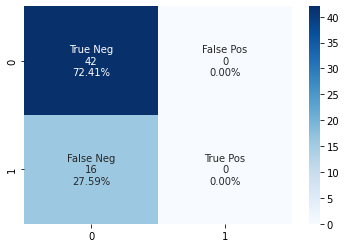

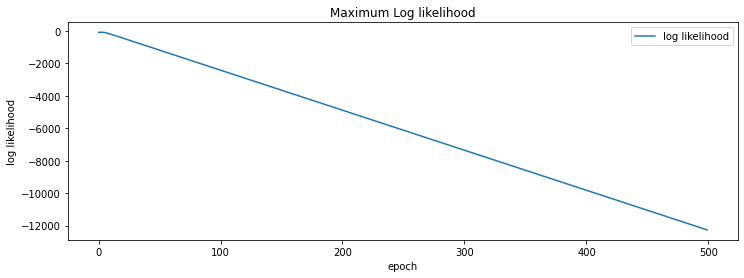

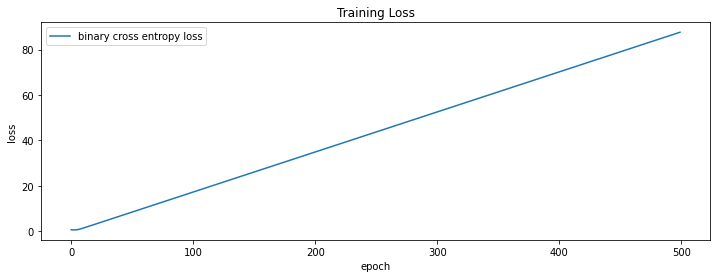

 ---------------------- FOLD KE- 4  --------------------- 
complement_index :  [2, 516, 517, 6, 518, 521, 10, 11, 526, 18, 531, 533, 534, 24, 25, 27, 29, 545, 34, 35, 550, 551, 40, 557, 560, 49, 561, 565, 570, 574, 63, 65, 66, 578, 68, 582, 71, 73, 74, 81, 82, 95, 96, 98, 99, 100, 103, 107, 128, 129, 131, 134, 135, 140, 143, 145, 146, 158, 162, 164, 169, 171, 176, 177, 178, 187, 188, 190, 198, 205, 206, 207, 211, 221, 224, 229, 230, 233, 236, 237, 239, 244, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 318, 320, 321, 322, 329, 330, 331, 332, 334, 336, 353, 356, 358, 363, 366, 377, 382, 385, 392, 393, 394, 395, 397, 406, 409, 415, 417, 425, 427, 432, 433, 437, 440, 444, 451, 454, 456, 462, 463, 465, 468, 469, 472, 480, 485, 488, 490, 494, 500, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -96.27410953030801  Loss :  0.64182739686872
Step : 100
Log Likelihood :  -2757.88971134903  Loss :  18.385931408993535
Step : 200
Log Likelihood :  -5567.127186081638  Lo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

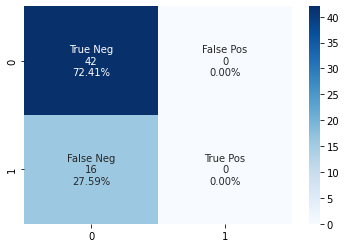

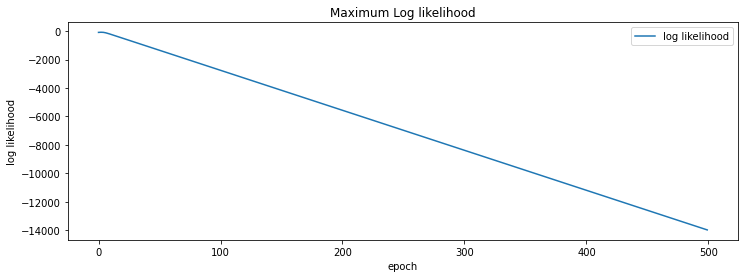

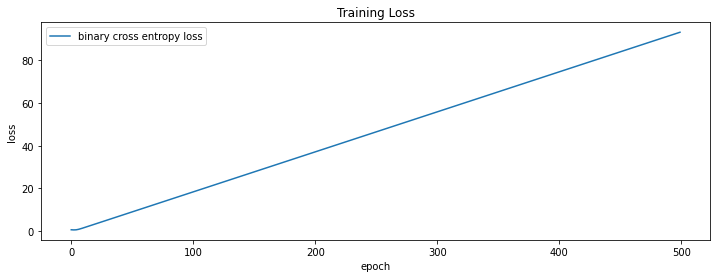

 ---------------------- FOLD KE- 5  --------------------- 
complement_index :  [2, 516, 517, 6, 521, 10, 11, 526, 18, 533, 534, 24, 25, 27, 29, 545, 34, 35, 550, 551, 40, 42, 557, 49, 55, 570, 63, 65, 66, 577, 578, 579, 582, 71, 73, 74, 81, 82, 95, 96, 98, 99, 100, 103, 106, 107, 128, 129, 131, 134, 135, 140, 142, 143, 145, 146, 158, 162, 164, 169, 176, 177, 178, 187, 188, 190, 207, 211, 215, 221, 224, 229, 233, 236, 237, 239, 244, 245, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 318, 321, 322, 330, 331, 332, 334, 336, 339, 353, 358, 363, 366, 377, 381, 382, 385, 388, 390, 393, 394, 395, 406, 409, 415, 417, 425, 427, 433, 437, 440, 444, 450, 451, 462, 465, 468, 469, 472, 480, 485, 488, 490, 494, 500, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -91.55777219365278  Loss :  0.6447730436172731
Step : 100
Log Likelihood :  -2452.080144673882  Loss :  17.26817003291466
Step : 200
Log Likelihood :  -4953.553896839332  Loss :  34.88418237210797
Step : 300
Log 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

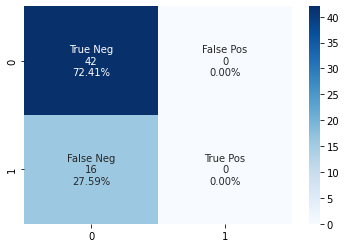

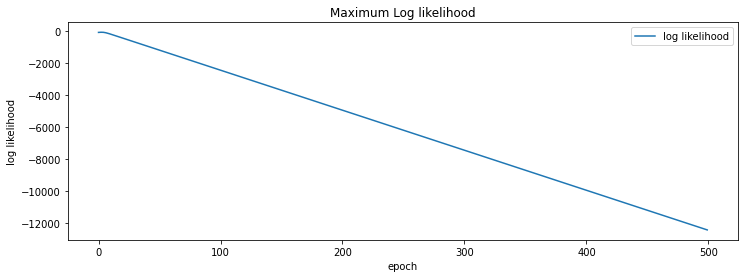

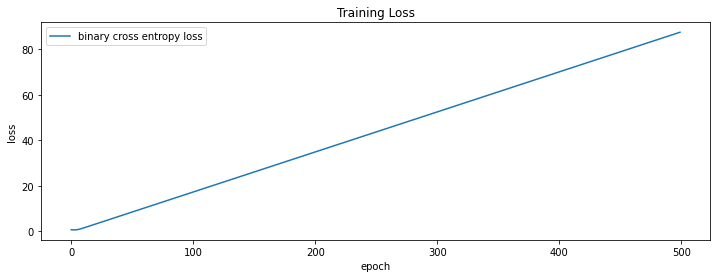

 ---------------------- FOLD KE- 6  --------------------- 
complement_index :  [2, 516, 6, 518, 521, 10, 11, 18, 531, 534, 24, 25, 27, 29, 545, 34, 550, 551, 40, 42, 557, 560, 49, 561, 565, 55, 574, 63, 65, 66, 577, 68, 578, 579, 71, 582, 73, 74, 81, 95, 96, 98, 99, 100, 103, 106, 107, 128, 131, 134, 135, 142, 143, 145, 146, 162, 171, 176, 177, 178, 187, 188, 190, 198, 205, 206, 207, 211, 215, 221, 224, 229, 230, 233, 237, 239, 244, 245, 260, 262, 263, 265, 268, 269, 274, 286, 303, 307, 308, 312, 316, 318, 320, 321, 322, 329, 331, 332, 334, 336, 339, 353, 356, 358, 363, 366, 377, 381, 382, 385, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 425, 427, 432, 433, 437, 440, 450, 454, 456, 462, 463, 465, 468, 469, 472, 480, 485, 488, 490, 494, 500, 504, 505, 511]
Step : 0
Log Likelihood :  -92.05724193994322  Loss :  0.6392864023607169
Step : 100
Log Likelihood :  -2464.84421605618  Loss :  17.11697372261236
Step : 200
Log Likelihood :  -4975.198948917881  Loss :  34.54999270081862
Step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

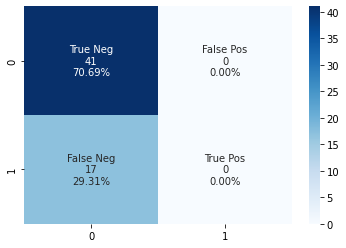

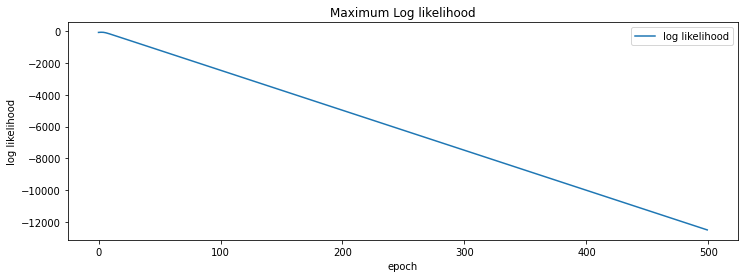

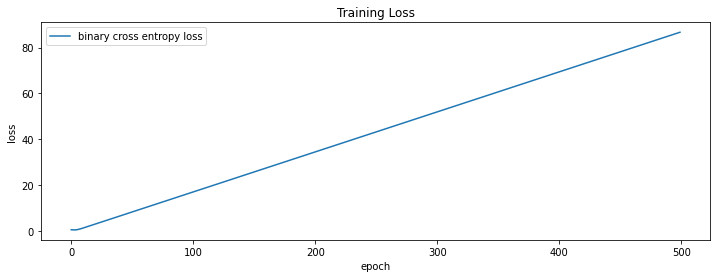

 ---------------------- FOLD KE- 7  --------------------- 
complement_index :  [2, 517, 6, 518, 521, 10, 526, 18, 531, 533, 534, 24, 27, 29, 545, 35, 550, 40, 42, 557, 560, 49, 561, 565, 55, 570, 574, 63, 65, 577, 578, 68, 579, 582, 71, 73, 74, 81, 82, 95, 96, 98, 100, 103, 106, 107, 128, 129, 134, 135, 140, 142, 143, 145, 146, 158, 162, 164, 169, 171, 176, 177, 178, 187, 188, 198, 205, 206, 211, 215, 221, 224, 229, 230, 233, 236, 239, 244, 245, 260, 262, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 320, 321, 322, 329, 330, 331, 332, 334, 336, 339, 353, 356, 358, 363, 366, 377, 381, 382, 385, 388, 390, 392, 393, 394, 395, 397, 406, 409, 415, 417, 425, 427, 432, 433, 437, 440, 444, 450, 451, 454, 456, 462, 463, 465, 468, 469, 472, 480, 485, 488, 490, 494, 500, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -95.48378692848519  Loss :  0.6408307847549342
Step : 100
Log Likelihood :  -2669.45341850643  Loss :  17.91579475507671
Step : 200
Log Likelihood :  -5388.455910073113  Los

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

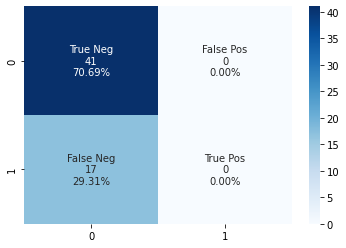

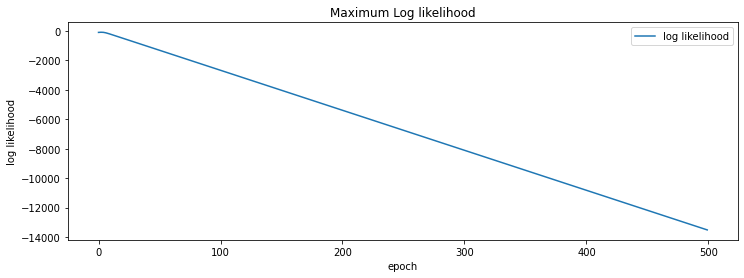

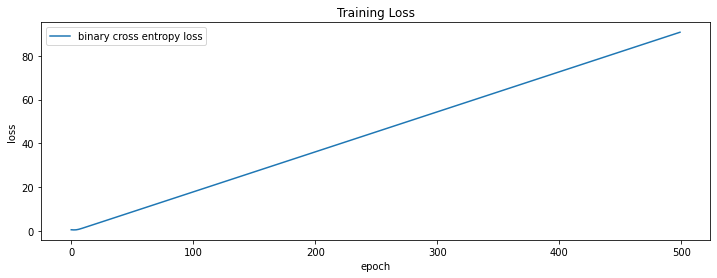

 ---------------------- FOLD KE- 8  --------------------- 
complement_index :  [2, 516, 517, 518, 521, 10, 11, 526, 18, 531, 533, 534, 24, 25, 27, 29, 545, 34, 35, 550, 551, 40, 42, 557, 560, 49, 561, 565, 55, 570, 574, 63, 65, 66, 577, 68, 578, 579, 71, 582, 73, 74, 81, 82, 95, 98, 99, 100, 103, 106, 107, 128, 129, 131, 135, 140, 142, 143, 145, 146, 158, 162, 164, 169, 171, 176, 177, 187, 188, 190, 198, 205, 206, 207, 211, 215, 221, 224, 230, 236, 237, 239, 244, 245, 260, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 318, 320, 321, 329, 330, 331, 332, 334, 336, 339, 356, 358, 366, 377, 381, 382, 385, 388, 390, 392, 393, 394, 395, 397, 406, 409, 417, 425, 427, 432, 433, 437, 444, 450, 451, 454, 456, 462, 463, 465, 469, 472, 480, 485, 490, 494, 503, 504, 505, 511]
Step : 0
Log Likelihood :  -95.73139065776226  Loss :  0.6468337206605558
Step : 100
Log Likelihood :  -2727.7257173918456  Loss :  18.430579171566524
Step : 200
Log Likelihood :  -5510.715878878476  Loss : 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

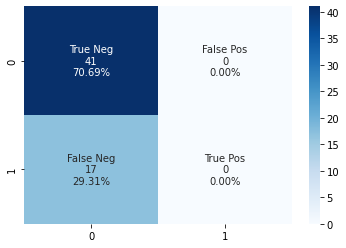

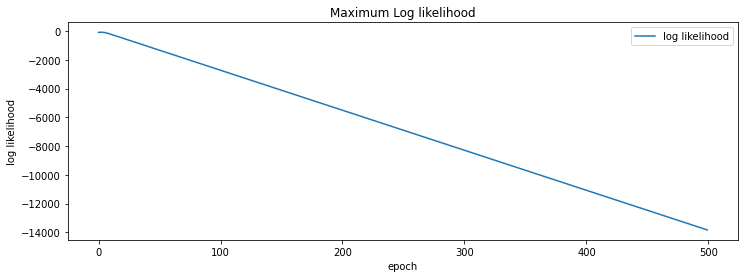

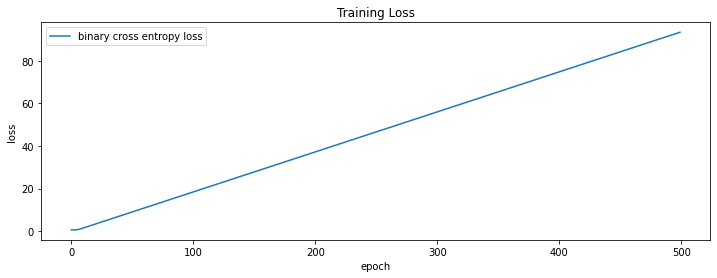

 ---------------------- FOLD KE- 9  --------------------- 
complement_index :  [2, 516, 517, 6, 518, 10, 11, 526, 18, 531, 533, 24, 25, 27, 29, 34, 35, 550, 551, 42, 557, 560, 49, 561, 565, 55, 570, 574, 63, 65, 66, 577, 68, 578, 579, 71, 73, 74, 81, 82, 96, 98, 99, 103, 106, 128, 129, 131, 134, 135, 140, 142, 143, 145, 146, 158, 162, 164, 169, 171, 176, 177, 178, 187, 188, 190, 198, 205, 206, 207, 211, 215, 221, 224, 229, 230, 233, 236, 237, 244, 245, 260, 262, 263, 265, 268, 269, 271, 273, 274, 286, 303, 307, 308, 312, 316, 318, 320, 321, 322, 329, 330, 331, 332, 334, 336, 339, 353, 356, 358, 363, 377, 381, 382, 385, 388, 390, 392, 393, 394, 395, 397, 406, 415, 417, 425, 427, 432, 437, 440, 444, 450, 451, 454, 456, 462, 463, 465, 468, 469, 472, 480, 485, 488, 490, 494, 500, 503, 505, 511]
Step : 0
Log Likelihood :  -94.52587334701633  Loss :  0.6301724889801089
Step : 100
Log Likelihood :  -2563.9962717353555  Loss :  17.093308478235702
Step : 200
Log Likelihood :  -5168.952595752828

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

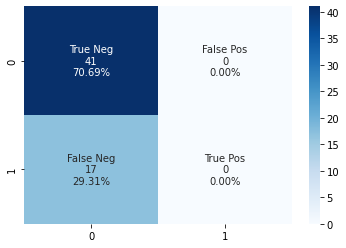

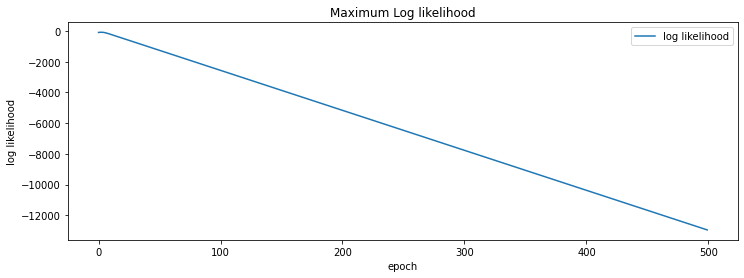

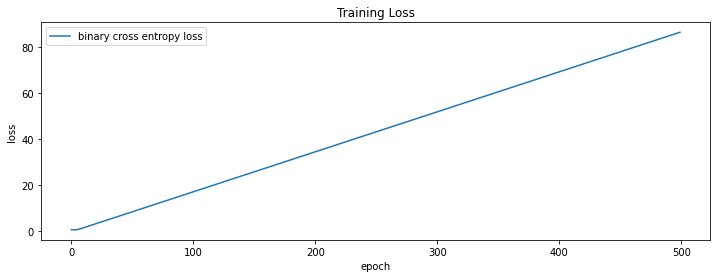

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X_cfs, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  complement_index = Intersection(missed_class_index, train_index)
  print("complement_index : ", complement_index)
  X_train_cfs, X_test_cfs = X_cfs[complement_index], X_cfs[test_index]
  y_train_cfs, Y_test = Y[complement_index], Y[test_index]
  w, log_likelihood_, loss = complement_logistic_regression(X_train_cfs, y_train_cfs.reshape((len(y_train_cfs),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train_cfs, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(y_train_cfs,train_pred)
 # print("acc_train_  :", acc_train_)

  prob = []
  pred = []
  prob = predict(X_test_cfs, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test_cfs
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test_cfs))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

# **Percobaan 7 : Logistic Regression, CFS, dan SMOTE** 

In [ ]:
# load label from encoder.pkl
label_encoder = label_encoder_file('encoder.pkl')

In [ ]:
# load data X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = data_h5_file('data.h5')

In [ ]:
dat=data_for_cfs

In [ ]:
dat['Gender'] =dat['Gender'].astype('category').cat.codes
dat['Class'] =dat['Class'].astype('category').cat.codes
dat=(dat-dat.min())/(dat.max()-dat.min())

corr_matrix = dat.corr()
print(corr_matrix["Class"].sort_values(ascending=False))

Class        1.000000
A/G Ratio    0.162319
ALB          0.161388
TP           0.035008
Gender      -0.082416
Age         -0.137351
Sgot_AA     -0.151934
Sgpt_AA     -0.163416
Alkphos     -0.184866
TB          -0.220208
DB          -0.246046
Name: Class, dtype: float64


In [ ]:
corr_df=pd.DataFrame(corr_matrix, index=corr_matrix.columns.values,columns=corr_matrix.columns.values)

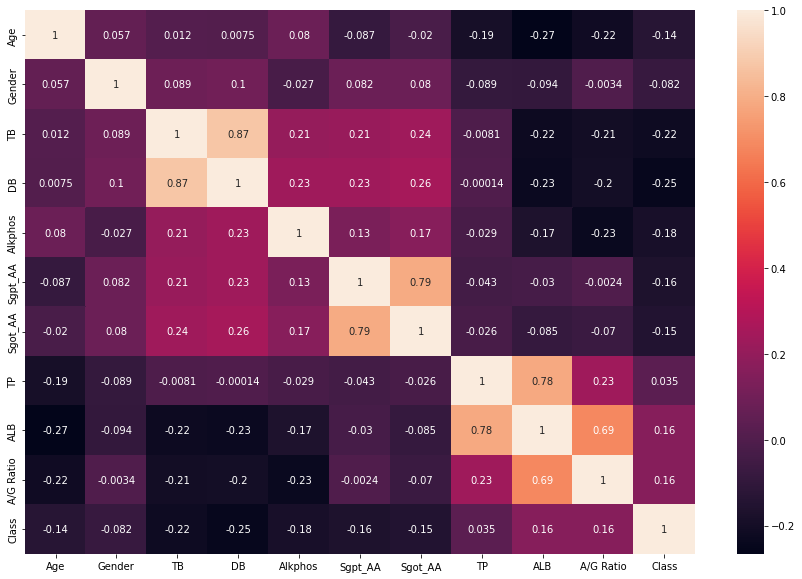

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, annot=True)

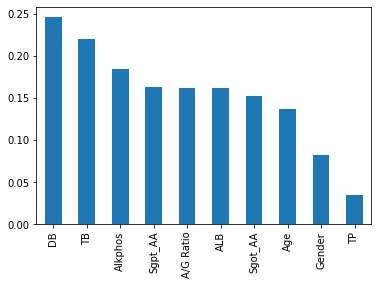

In [ ]:
abs(corr_matrix["Class"]).sort_values(ascending=False).drop(index="Class").plot(kind="bar")

In [ ]:
col_x=feature_selection(corr_matrix, mode="threshold", value=0.16).index
col_y=["Class"]
print(feature_selection(corr_matrix, mode="threshold", value=0.16))

TB          -0.220208
DB          -0.246046
Alkphos     -0.184866
Sgpt_AA     -0.163416
ALB          0.161388
A/G Ratio    0.162319
Name: Class, dtype: float64


In [ ]:
dat.drop(columns="TP", inplace=True)

In [ ]:
dat.drop(columns="Gender", inplace=True)

In [ ]:
dat.drop(columns="Age", inplace=True)

In [ ]:
dat.drop(columns="Sgot_AA", inplace=True)

In [ ]:
# filter X_train_cfs dan X_test_cfs sesuai correlation feature index jd 6
ind=[]
for i in col_x:
  ind.append(X_col.index(i))
X_cfs=X[:,ind]

In [ ]:
def showMatrix(Y_test,pred, log_likelihood_, loss):
  cf_matrix=confusion_matrix(Y_test,pred)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(log_likelihood_)), log_likelihood_, label = "log likelihood")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('log likelihood')
  # memberi judul
  plt.title('Maximum Log likelihood')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

  fig = plt.figure(figsize=(12,4))
  plt.plot(range(len(loss)), loss, label = "binary cross entropy loss")
  #membuat label sumbu x
  plt.xlabel('epoch')
  # membuat label sumbu y
  plt.ylabel('loss')
  # memberi judul
  plt.title('Training Loss')
  # menampilkan legend
  plt.legend()
  #menampilkan gambar
  plt.show()

In [ ]:
def getPredictionLabel (prob):
  pred=[]
  for i in prob:
    if i <0.5:
      pred.append(0)
    else:
      pred.append(1)
  return pred

 ---------------------- FOLD KE- 0  --------------------- 
Step : 0
Log Likelihood :  -515.6751314388711  Loss :  0.6894052559343196
Step : 100
Log Likelihood :  -451.23911268895006  Loss :  0.6032608458408423
Step : 200
Log Likelihood :  -440.72826387927853  Loss :  0.5892089089295167
Step : 300
Log Likelihood :  -435.8219200105532  Loss :  0.5826496256825577
Step : 400
Log Likelihood :  -432.9459338864455  Loss :  0.5788047244471197
accuracy :  0.6610169491525424
              precision    recall  f1-score   support

           0       1.00      0.52      0.69        42
           1       0.46      1.00      0.63        17

    accuracy                           0.66        59
   macro avg       0.73      0.76      0.66        59
weighted avg       0.84      0.66      0.67        59



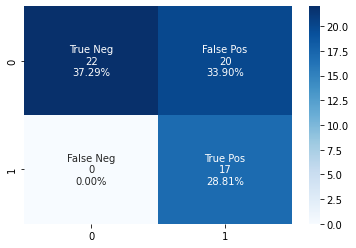

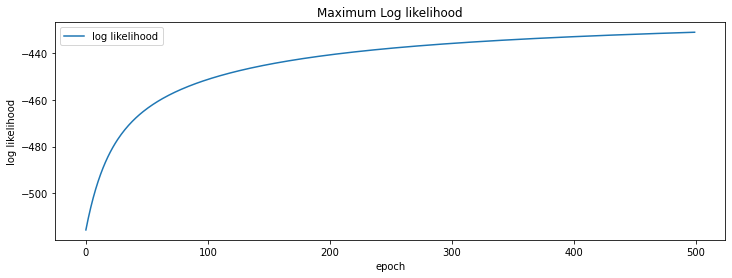

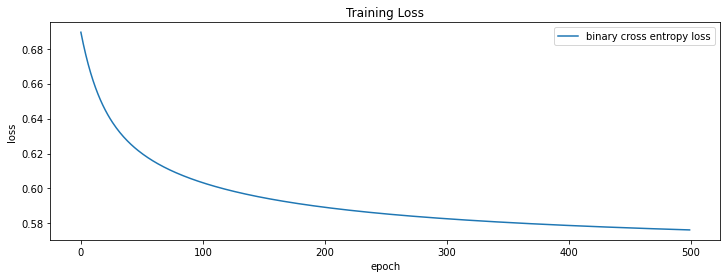

 ---------------------- FOLD KE- 1  --------------------- 
Step : 0
Log Likelihood :  -515.6474641158178  Loss :  0.6893682675345157
Step : 100
Log Likelihood :  -454.44592203000104  Loss :  0.6075480241042795
Step : 200
Log Likelihood :  -444.8150997670184  Loss :  0.594672593271415
Step : 300
Log Likelihood :  -440.15746488836487  Loss :  0.5884458086742845
Step : 400
Log Likelihood :  -437.28351292924685  Loss :  0.584603626910758
accuracy :  0.5932203389830508
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        42
           1       0.41      1.00      0.59        17

    accuracy                           0.59        59
   macro avg       0.71      0.71      0.59        59
weighted avg       0.83      0.59      0.60        59



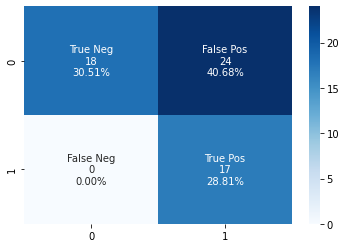

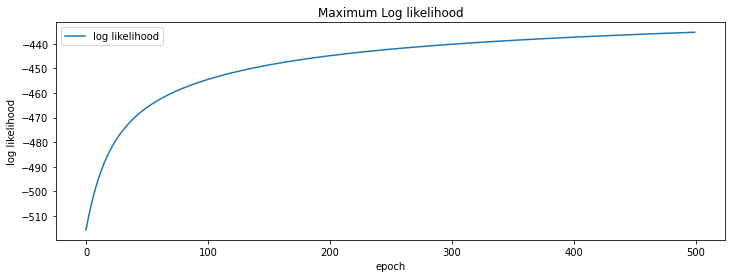

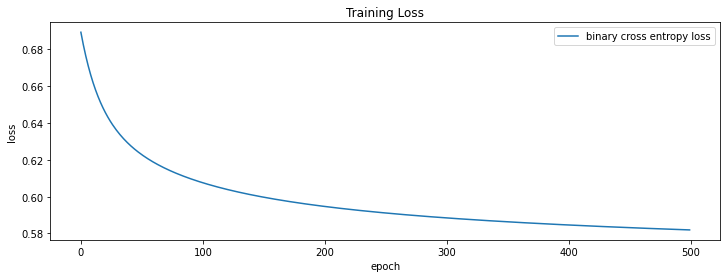

 ---------------------- FOLD KE- 2  --------------------- 
Step : 0
Log Likelihood :  -515.7198631467645  Loss :  0.6894650576828403
Step : 100
Log Likelihood :  -454.2630710397767  Loss :  0.6073035709087924
Step : 200
Log Likelihood :  -444.57799361705645  Loss :  0.594355606439915
Step : 300
Log Likelihood :  -440.0453253635951  Loss :  0.5882958895235229
Step : 400
Log Likelihood :  -437.35482105025613  Loss :  0.5846989586233371
accuracy :  0.6779661016949152
              precision    recall  f1-score   support

           0       0.90      0.62      0.73        42
           1       0.47      0.82      0.60        17

    accuracy                           0.68        59
   macro avg       0.68      0.72      0.66        59
weighted avg       0.77      0.68      0.69        59



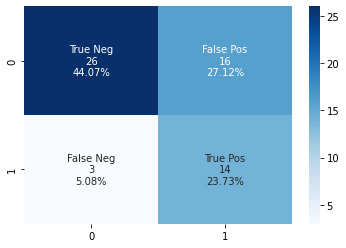

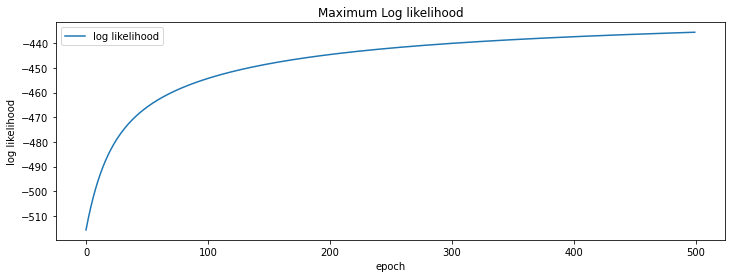

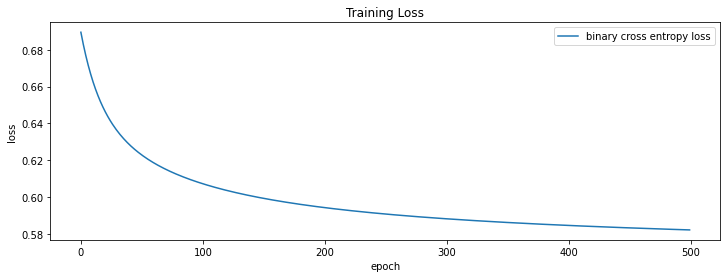

 ---------------------- FOLD KE- 3  --------------------- 
Step : 0
Log Likelihood :  -515.6015764993041  Loss :  0.6893069204536151
Step : 100
Log Likelihood :  -452.67390413760586  Loss :  0.6051790162267457
Step : 200
Log Likelihood :  -443.5717143083989  Loss :  0.5930103132465225
Step : 300
Log Likelihood :  -439.5443018100668  Loss :  0.5876260719385921
Step : 400
Log Likelihood :  -437.22984555752697  Loss :  0.584531879087603
accuracy :  0.5689655172413793
              precision    recall  f1-score   support

           0       0.87      0.48      0.62        42
           1       0.37      0.81      0.51        16

    accuracy                           0.57        58
   macro avg       0.62      0.64      0.56        58
weighted avg       0.73      0.57      0.59        58



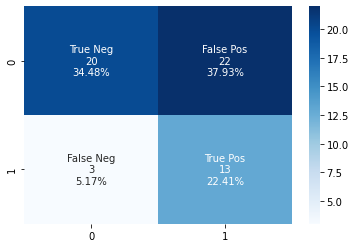

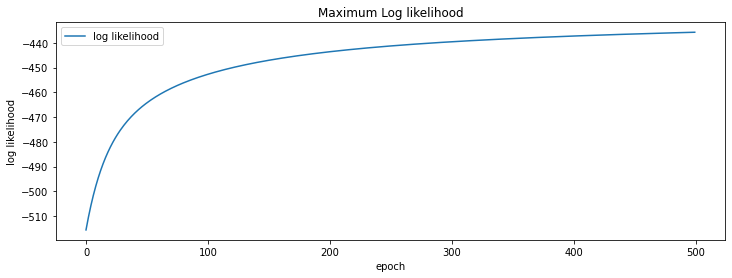

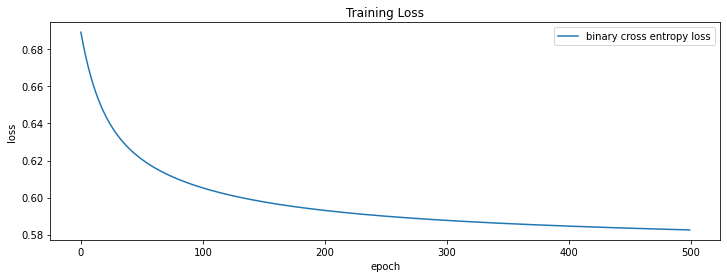

 ---------------------- FOLD KE- 4  --------------------- 
Step : 0
Log Likelihood :  -515.4223648653042  Loss :  0.6890673327076259
Step : 100
Log Likelihood :  -449.4185893772827  Loss :  0.6008269911460998
Step : 200
Log Likelihood :  -439.11355335190035  Loss :  0.5870502050159094
Step : 300
Log Likelihood :  -434.0561895762211  Loss :  0.5802890234976218
Step : 400
Log Likelihood :  -430.91008370629277  Loss :  0.5760829996073432
accuracy :  0.6206896551724138
              precision    recall  f1-score   support

           0       0.88      0.55      0.68        42
           1       0.41      0.81      0.54        16

    accuracy                           0.62        58
   macro avg       0.65      0.68      0.61        58
weighted avg       0.75      0.62      0.64        58



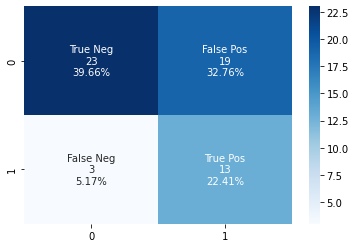

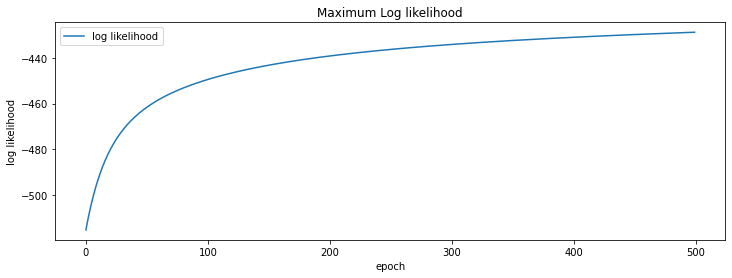

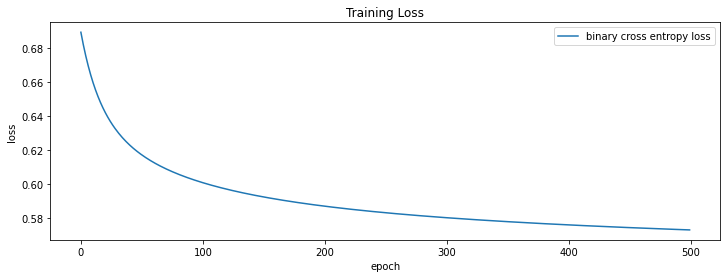

 ---------------------- FOLD KE- 5  --------------------- 
Step : 0
Log Likelihood :  -515.4270429923104  Loss :  0.6890735868881155
Step : 100
Log Likelihood :  -451.0204503333989  Loss :  0.6029685164885012
Step : 200
Log Likelihood :  -442.12416795427686  Loss :  0.5910750908479636
Step : 300
Log Likelihood :  -438.00593371069175  Loss :  0.5855694300945077
Step : 400
Log Likelihood :  -435.5922809944708  Loss :  0.5823426216503621
accuracy :  0.603448275862069
              precision    recall  f1-score   support

           0       0.83      0.57      0.68        42
           1       0.38      0.69      0.49        16

    accuracy                           0.60        58
   macro avg       0.60      0.63      0.58        58
weighted avg       0.70      0.60      0.62        58



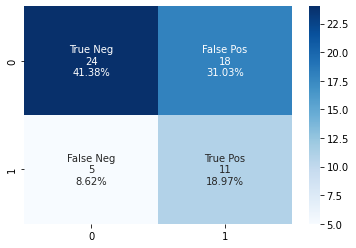

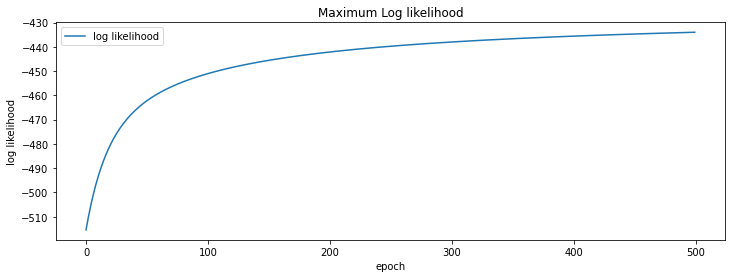

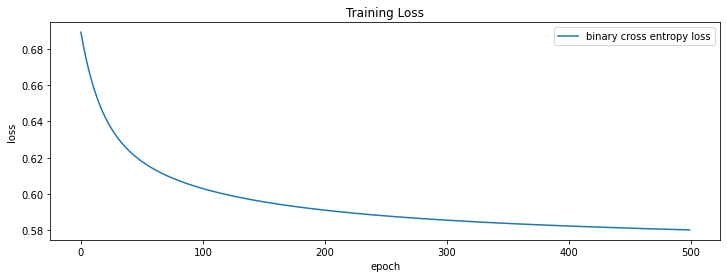

 ---------------------- FOLD KE- 6  --------------------- 
Step : 0
Log Likelihood :  -516.7926452708317  Loss :  0.6890568603611089
Step : 100
Log Likelihood :  -451.6946677894042  Loss :  0.602259557052539
Step : 200
Log Likelihood :  -441.98251048882463  Loss :  0.5893100139850996
Step : 300
Log Likelihood :  -437.4572238846039  Loss :  0.5832762985128052
Step : 400
Log Likelihood :  -434.80811012007973  Loss :  0.5797441468267729
accuracy :  0.5689655172413793
              precision    recall  f1-score   support

           0       0.81      0.51      0.63        41
           1       0.38      0.71      0.49        17

    accuracy                           0.57        58
   macro avg       0.59      0.61      0.56        58
weighted avg       0.68      0.57      0.59        58



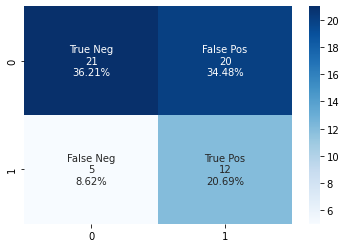

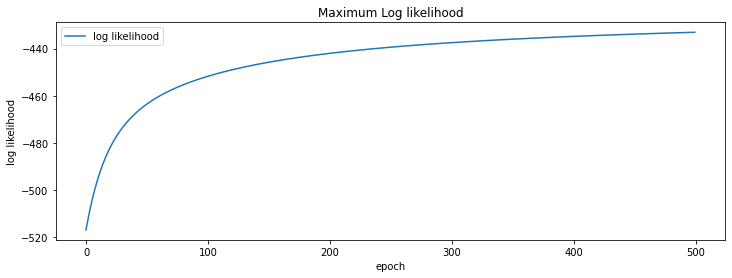

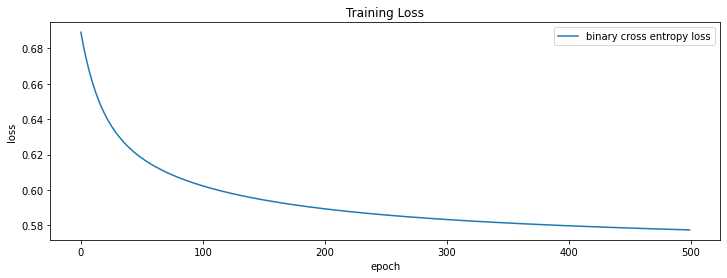

 ---------------------- FOLD KE- 7  --------------------- 
Step : 0
Log Likelihood :  -517.0031922754765  Loss :  0.6893375897006354
Step : 100
Log Likelihood :  -451.5912253020136  Loss :  0.602121633736018
Step : 200
Log Likelihood :  -440.5081023539529  Loss :  0.5873441364719373
Step : 300
Log Likelihood :  -435.29276910309534  Loss :  0.5803903588041271
Step : 400
Log Likelihood :  -432.21344590601774  Loss :  0.5762845945413569
accuracy :  0.603448275862069
              precision    recall  f1-score   support

           0       0.91      0.49      0.63        41
           1       0.42      0.88      0.57        17

    accuracy                           0.60        58
   macro avg       0.66      0.69      0.60        58
weighted avg       0.76      0.60      0.61        58



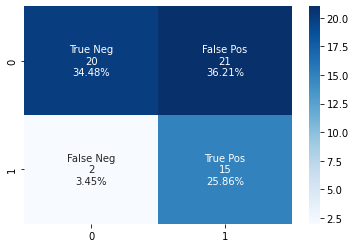

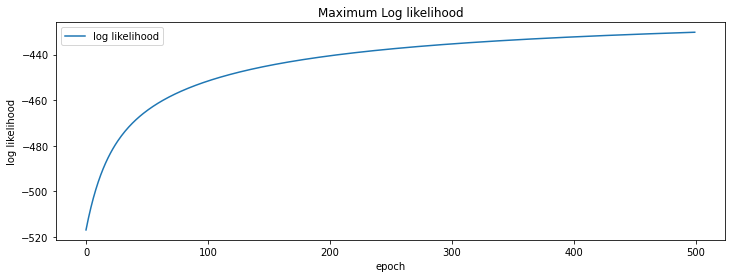

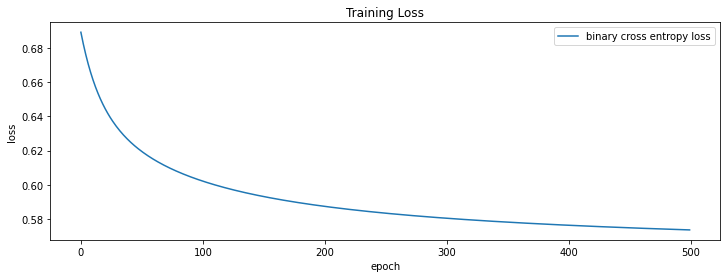

 ---------------------- FOLD KE- 8  --------------------- 
Step : 0
Log Likelihood :  -516.9899665387405  Loss :  0.6893199553849874
Step : 100
Log Likelihood :  -452.3635315316444  Loss :  0.6031513753755259
Step : 200
Log Likelihood :  -442.04368583640655  Loss :  0.5893915811152088
Step : 300
Log Likelihood :  -437.2841046034103  Loss :  0.583045472804547
Step : 400
Log Likelihood :  -434.4930135227212  Loss :  0.5793240180302949
accuracy :  0.6551724137931034
              precision    recall  f1-score   support

           0       0.96      0.54      0.69        41
           1       0.46      0.94      0.62        17

    accuracy                           0.66        58
   macro avg       0.71      0.74      0.65        58
weighted avg       0.81      0.66      0.67        58



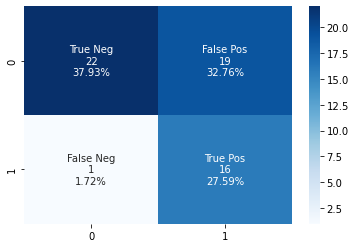

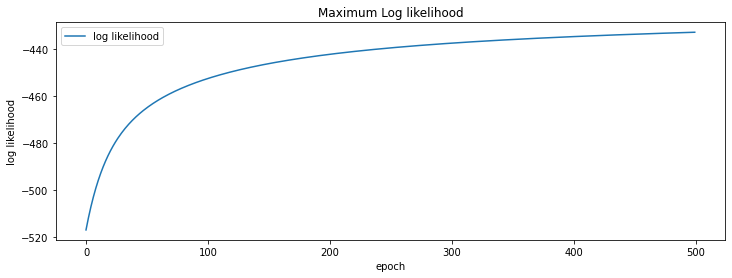

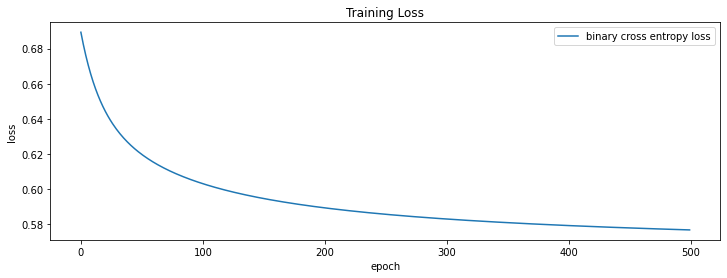

 ---------------------- FOLD KE- 9  --------------------- 
Step : 0
Log Likelihood :  -517.0789357183256  Loss :  0.6894385809577674
Step : 100
Log Likelihood :  -452.49084533945205  Loss :  0.6033211271192694
Step : 200
Log Likelihood :  -441.6320184642215  Loss :  0.5888426912856287
Step : 300
Log Likelihood :  -436.5707140965702  Loss :  0.5820942854620936
Step : 400
Log Likelihood :  -433.56725445348746  Loss :  0.5780896726046498
accuracy :  0.5689655172413793
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        41
           1       0.39      0.82      0.53        17

    accuracy                           0.57        58
   macro avg       0.63      0.64      0.57        58
weighted avg       0.72      0.57      0.58        58



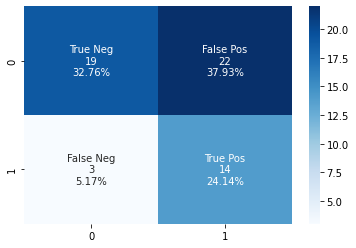

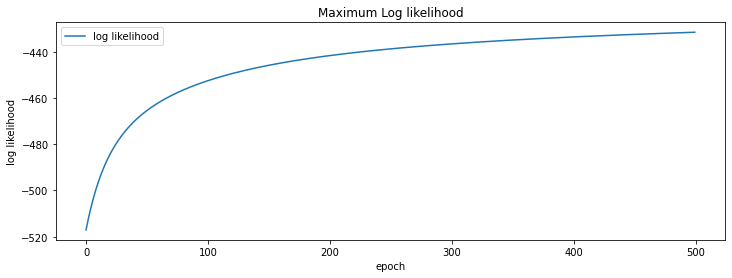

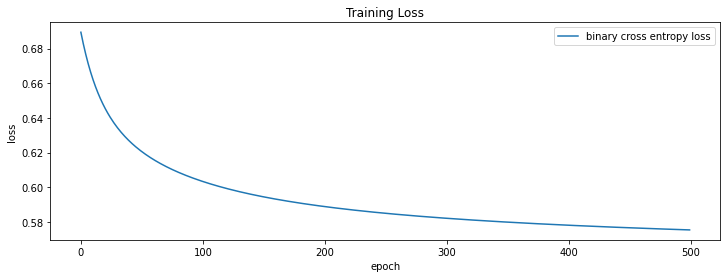

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X_cfs, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cfs, X_test_cfs = X_cfs[train_index], X_cfs[test_index]
  y_train_cfs, Y_test = Y[train_index], Y[test_index]
  sm = SMOTE(random_state = 2)
  X_train_res, Y_train_res = sm.fit_resample(X_train_cfs, y_train_cfs.ravel()) 

  w, log_likelihood_, loss = logistic_regression(X_train_res, Y_train_res.reshape((len(Y_train_res),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train_res, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(Y_train_res,train_pred)
#  print("acc_train_  :", acc_test_)

  prob = []
  pred = []
  prob = predict(X_test_cfs, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test_cfs
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test_cfs))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)

In [ ]:
# menyimpan data test

test_df=pd.DataFrame(X_test_all, columns=col_x)
test_df["Class"]=label_encoder.inverse_transform(Y_test_all.squeeze())
test_df["prob"]=test_prob
test_df["Predicted"]=label_encoder.inverse_transform(test_pred)
test_df["Index"] = index

# **Percobaan 8 : DL, CFS, dan SMOTE** 

In [ ]:
missed_class_index = test_df.query('Predicted != Class').index
missed_class_index

Int64Index([  4,   7,  16,  20,  22,  23,  28,  33,  37,  41,
            ...
            555, 556, 558, 562, 570, 571, 572, 575, 578, 581],
           dtype='int64', length=226)

In [ ]:
def Intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

 ---------------------- FOLD KE- 0  --------------------- 
complement_index :  [512, 513, 515, 4, 7, 519, 522, 526, 16, 528, 530, 22, 23, 538, 539, 28, 541, 540, 542, 544, 33, 546, 547, 550, 552, 41, 555, 45, 46, 558, 48, 50, 51, 52, 53, 562, 56, 57, 58, 59, 60, 570, 62, 571, 572, 575, 578, 581, 70, 72, 78, 79, 80, 85, 86, 87, 88, 90, 92, 97, 102, 104, 105, 109, 112, 122, 123, 127, 129, 141, 145, 147, 148, 150, 152, 156, 157, 159, 160, 168, 170, 184, 186, 187, 188, 191, 200, 201, 202, 203, 204, 209, 211, 212, 216, 217, 218, 219, 220, 222, 226, 233, 234, 237, 240, 241, 244, 249, 250, 252, 255, 257, 259, 264, 267, 268, 270, 275, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 304, 309, 310, 315, 316, 317, 319, 323, 325, 329, 333, 334, 336, 341, 345, 357, 360, 362, 369, 370, 371, 373, 375, 376, 378, 379, 384, 386, 387, 389, 391, 392, 393, 394, 396, 397, 399, 400, 402, 411, 415, 416, 418, 424, 430, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 461, 466, 467, 474, 475, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

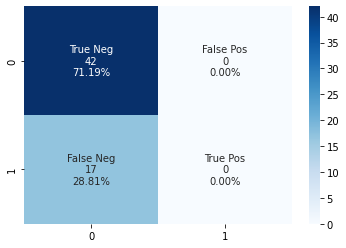

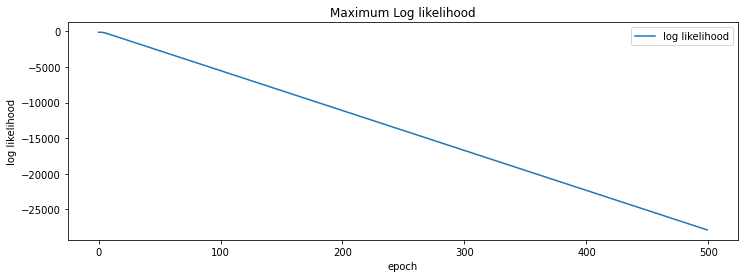

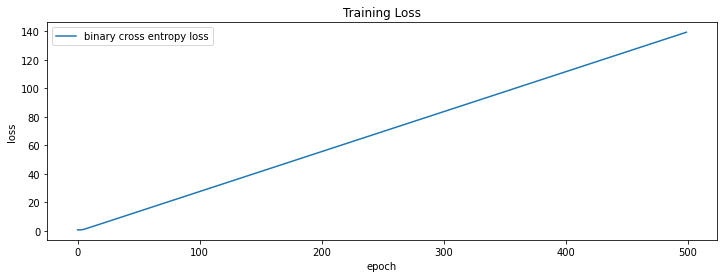

 ---------------------- FOLD KE- 1  --------------------- 
complement_index :  [512, 513, 515, 4, 7, 519, 522, 526, 527, 16, 528, 530, 20, 532, 22, 23, 539, 28, 540, 541, 542, 544, 33, 546, 547, 37, 552, 41, 555, 556, 558, 48, 50, 51, 52, 53, 562, 57, 58, 59, 60, 61, 62, 570, 571, 572, 575, 578, 69, 70, 581, 78, 79, 80, 85, 86, 87, 88, 90, 92, 93, 97, 101, 102, 105, 109, 118, 122, 123, 127, 129, 141, 146, 147, 148, 150, 152, 156, 157, 159, 160, 161, 168, 170, 184, 185, 187, 188, 191, 199, 200, 201, 202, 203, 204, 209, 211, 212, 216, 217, 218, 220, 222, 223, 226, 233, 234, 237, 241, 244, 249, 250, 252, 255, 257, 264, 267, 268, 270, 275, 276, 277, 279, 280, 282, 292, 293, 294, 296, 298, 299, 300, 303, 304, 307, 309, 310, 315, 316, 317, 319, 323, 325, 329, 333, 336, 341, 345, 357, 360, 362, 369, 371, 375, 376, 378, 382, 384, 386, 387, 389, 392, 393, 394, 396, 397, 399, 400, 402, 411, 415, 416, 418, 419, 424, 425, 430, 435, 436, 441, 442, 445, 448, 449, 452, 453, 457, 458, 461, 466, 470, 4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

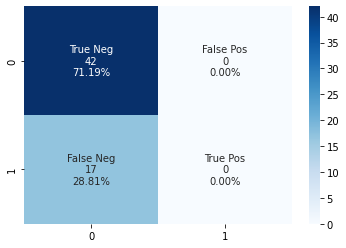

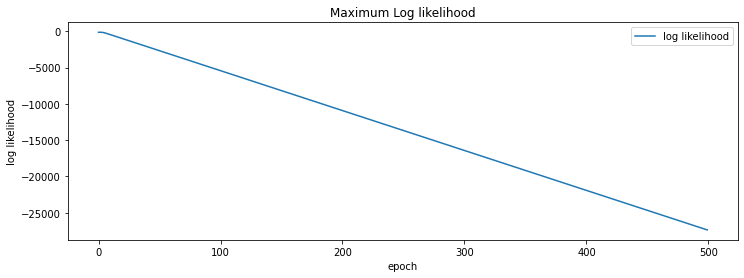

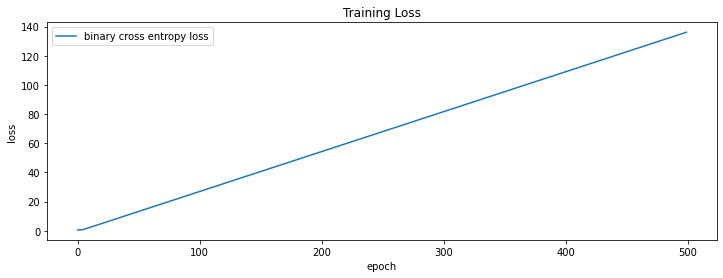

 ---------------------- FOLD KE- 2  --------------------- 
complement_index :  [512, 513, 4, 519, 522, 526, 527, 16, 528, 530, 20, 532, 22, 538, 539, 28, 541, 540, 542, 544, 33, 546, 547, 37, 550, 552, 41, 555, 556, 45, 46, 558, 48, 50, 51, 52, 53, 562, 56, 57, 570, 59, 60, 61, 62, 571, 572, 575, 578, 69, 70, 581, 72, 78, 79, 80, 85, 86, 87, 88, 90, 92, 93, 101, 102, 104, 105, 109, 112, 118, 123, 127, 129, 141, 145, 146, 147, 148, 152, 156, 157, 159, 160, 161, 168, 170, 184, 185, 186, 187, 199, 200, 202, 209, 216, 217, 219, 220, 223, 233, 234, 237, 240, 241, 244, 249, 250, 252, 255, 257, 259, 264, 267, 270, 275, 276, 277, 279, 280, 282, 284, 293, 294, 296, 298, 299, 300, 303, 304, 307, 309, 310, 315, 316, 317, 319, 323, 329, 333, 334, 336, 341, 345, 357, 360, 362, 369, 370, 371, 373, 375, 378, 379, 382, 384, 386, 387, 389, 391, 392, 393, 394, 396, 397, 399, 400, 402, 411, 415, 416, 418, 419, 424, 425, 430, 435, 436, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 458, 461, 467, 470, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

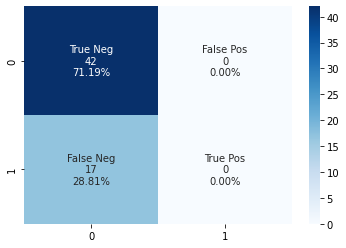

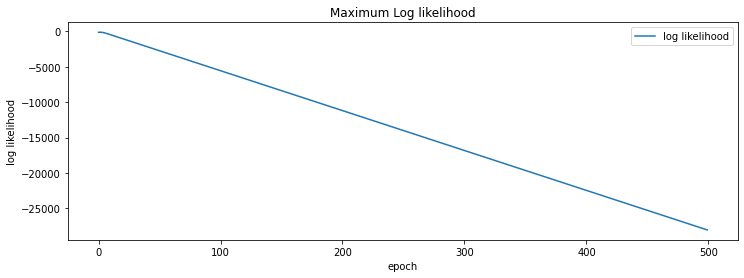

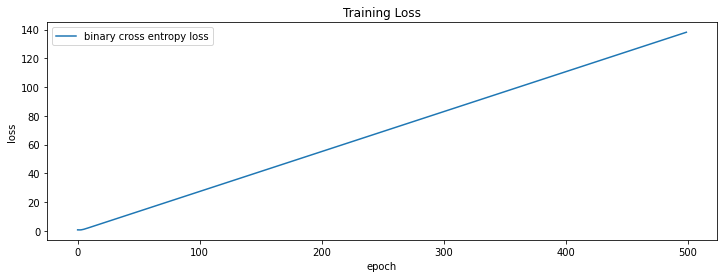

 ---------------------- FOLD KE- 3  --------------------- 
complement_index :  [512, 513, 515, 4, 7, 519, 522, 526, 527, 16, 528, 530, 20, 532, 22, 23, 538, 28, 540, 542, 544, 33, 546, 547, 37, 550, 552, 41, 555, 556, 45, 46, 558, 48, 50, 51, 52, 53, 562, 56, 57, 58, 59, 570, 61, 62, 571, 572, 575, 69, 70, 72, 78, 79, 80, 85, 86, 88, 90, 92, 93, 97, 101, 102, 104, 112, 118, 122, 123, 127, 129, 145, 146, 147, 148, 150, 152, 157, 159, 160, 161, 168, 170, 184, 185, 186, 188, 191, 199, 200, 201, 202, 203, 204, 209, 211, 212, 217, 218, 219, 222, 223, 226, 233, 234, 237, 240, 241, 249, 250, 252, 255, 257, 259, 264, 267, 268, 270, 275, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 303, 304, 307, 309, 315, 317, 319, 325, 329, 333, 334, 341, 345, 357, 360, 362, 369, 370, 371, 373, 375, 376, 378, 379, 382, 384, 386, 387, 389, 391, 392, 397, 400, 402, 411, 415, 416, 418, 419, 425, 430, 435, 436, 439, 441, 442, 443, 445, 448, 449, 452, 457, 458, 461, 466, 467, 470, 474, 475, 476

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

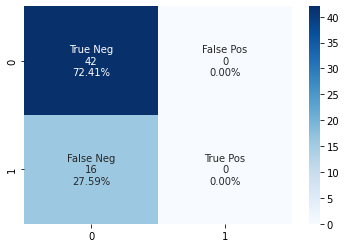

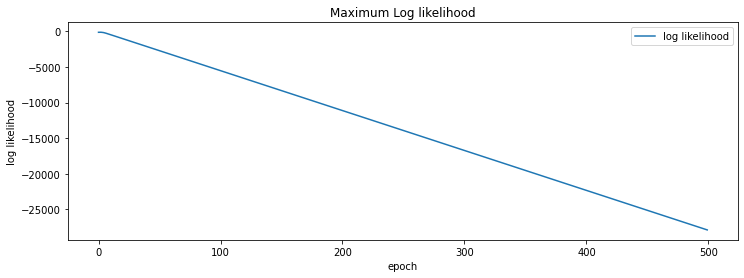

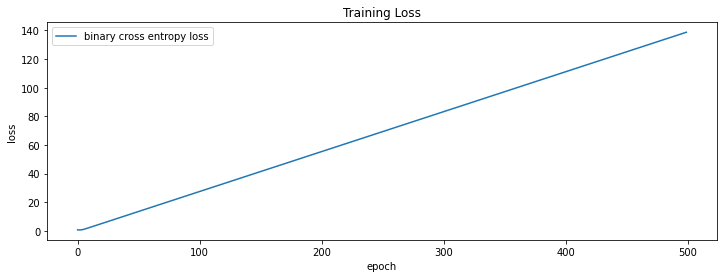

 ---------------------- FOLD KE- 4  --------------------- 
complement_index :  [512, 513, 515, 4, 7, 519, 522, 526, 527, 528, 530, 20, 532, 22, 23, 538, 539, 28, 541, 542, 544, 33, 546, 547, 37, 550, 552, 41, 555, 556, 45, 46, 48, 50, 51, 52, 53, 562, 56, 57, 58, 570, 60, 61, 571, 575, 578, 69, 70, 581, 72, 78, 79, 80, 86, 87, 92, 93, 97, 101, 102, 104, 105, 109, 112, 118, 122, 123, 127, 129, 141, 145, 146, 147, 148, 150, 152, 156, 157, 160, 161, 184, 185, 186, 187, 188, 191, 199, 200, 201, 202, 203, 204, 211, 212, 216, 217, 218, 219, 220, 222, 223, 226, 233, 234, 237, 240, 241, 244, 250, 252, 255, 257, 259, 264, 267, 268, 275, 279, 280, 282, 284, 292, 294, 296, 298, 299, 303, 307, 310, 315, 316, 319, 323, 325, 329, 334, 336, 341, 345, 360, 369, 370, 371, 373, 375, 376, 378, 379, 382, 384, 386, 387, 389, 391, 392, 393, 394, 396, 397, 399, 400, 402, 411, 415, 416, 418, 419, 424, 425, 435, 436, 439, 441, 442, 443, 445, 449, 452, 453, 457, 458, 466, 467, 470, 474, 475, 476, 481, 482, 483,

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

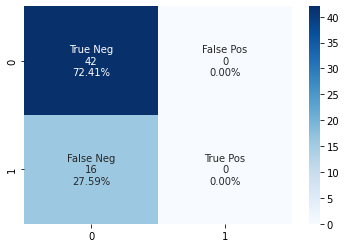

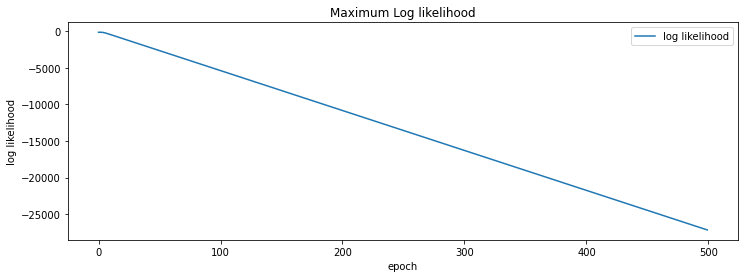

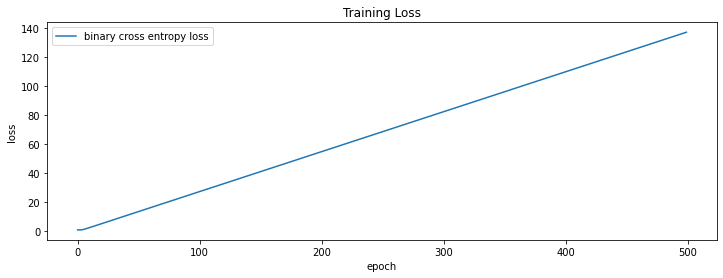

 ---------------------- FOLD KE- 5  --------------------- 
complement_index :  [512, 513, 515, 4, 7, 519, 522, 526, 527, 16, 528, 530, 20, 532, 23, 538, 539, 28, 540, 541, 542, 33, 37, 550, 41, 555, 556, 45, 46, 558, 48, 562, 51, 52, 56, 57, 58, 59, 60, 61, 62, 570, 571, 572, 578, 69, 70, 581, 72, 78, 80, 85, 86, 87, 88, 90, 92, 93, 97, 101, 102, 104, 105, 109, 112, 118, 122, 123, 127, 129, 141, 145, 146, 147, 148, 150, 152, 156, 157, 159, 160, 161, 168, 170, 184, 185, 186, 187, 188, 191, 199, 201, 202, 203, 204, 209, 211, 212, 216, 217, 218, 219, 220, 222, 223, 226, 233, 234, 237, 240, 241, 244, 249, 250, 252, 255, 257, 259, 264, 267, 268, 270, 275, 276, 277, 279, 282, 284, 292, 293, 294, 298, 300, 303, 304, 307, 309, 310, 315, 316, 317, 319, 323, 325, 333, 334, 336, 341, 345, 357, 360, 362, 369, 370, 371, 373, 375, 376, 378, 379, 382, 384, 386, 387, 389, 391, 393, 394, 396, 399, 400, 402, 411, 415, 416, 419, 424, 425, 430, 435, 436, 439, 441, 442, 443, 445, 448, 449, 452, 453, 458, 4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

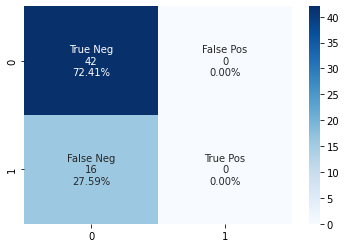

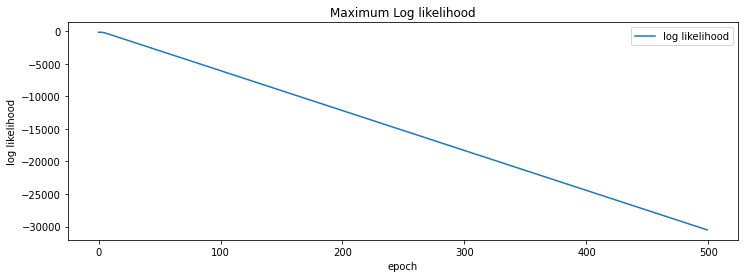

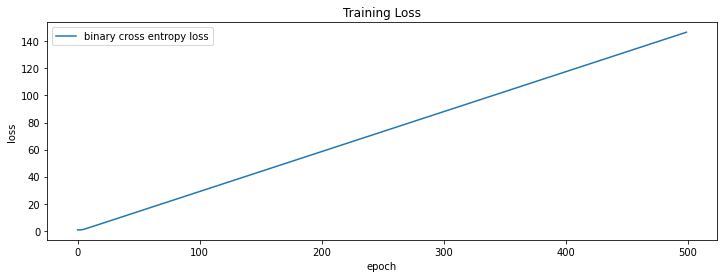

 ---------------------- FOLD KE- 6  --------------------- 
complement_index :  [512, 513, 515, 7, 527, 16, 528, 530, 20, 532, 22, 23, 538, 539, 540, 541, 542, 544, 33, 546, 547, 37, 550, 552, 555, 556, 45, 46, 558, 48, 50, 51, 52, 53, 562, 56, 57, 58, 59, 60, 61, 62, 571, 572, 575, 578, 69, 581, 72, 78, 79, 80, 85, 86, 87, 88, 90, 92, 93, 97, 101, 104, 105, 109, 112, 118, 122, 127, 141, 145, 146, 148, 150, 152, 156, 159, 160, 161, 168, 170, 185, 186, 187, 188, 191, 199, 200, 201, 202, 203, 204, 209, 211, 212, 216, 217, 218, 219, 220, 222, 223, 226, 233, 234, 237, 240, 241, 244, 249, 252, 255, 257, 259, 264, 267, 268, 270, 275, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 303, 304, 307, 309, 310, 316, 317, 319, 323, 325, 329, 333, 334, 336, 341, 345, 357, 360, 362, 369, 370, 371, 373, 375, 376, 378, 379, 382, 384, 386, 387, 389, 391, 392, 393, 394, 396, 397, 399, 400, 415, 416, 418, 419, 424, 425, 430, 435, 436, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 458, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

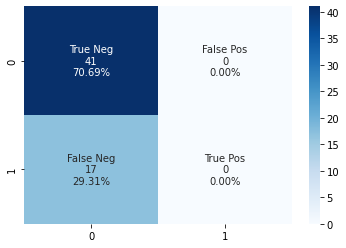

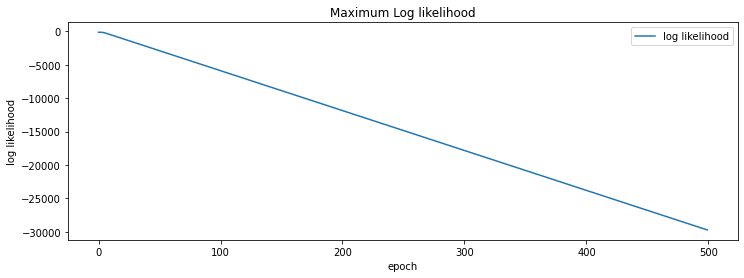

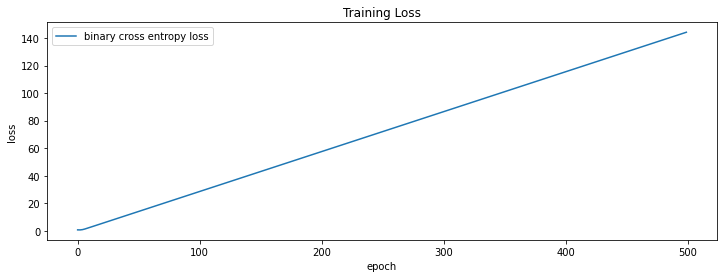

 ---------------------- FOLD KE- 7  --------------------- 
complement_index :  [512, 513, 515, 4, 7, 519, 522, 526, 527, 16, 528, 530, 20, 532, 22, 23, 538, 539, 28, 540, 541, 544, 33, 546, 547, 37, 550, 552, 41, 555, 556, 45, 46, 558, 48, 50, 562, 52, 53, 56, 58, 59, 60, 61, 62, 570, 571, 572, 575, 578, 69, 70, 581, 72, 78, 79, 85, 86, 87, 88, 90, 93, 97, 101, 102, 104, 105, 109, 112, 118, 122, 123, 127, 129, 141, 145, 146, 147, 148, 150, 152, 156, 157, 159, 161, 168, 170, 184, 185, 186, 187, 188, 191, 199, 200, 201, 203, 204, 209, 211, 212, 216, 217, 218, 219, 220, 222, 223, 226, 233, 240, 241, 244, 249, 250, 257, 259, 264, 267, 268, 270, 275, 276, 277, 280, 284, 292, 293, 294, 296, 298, 299, 300, 303, 304, 307, 309, 310, 315, 316, 317, 319, 323, 325, 329, 333, 334, 336, 341, 345, 357, 360, 362, 370, 371, 373, 375, 376, 379, 382, 384, 389, 391, 392, 393, 394, 396, 397, 399, 400, 402, 411, 415, 416, 418, 419, 424, 425, 430, 435, 436, 439, 441, 443, 448, 452, 453, 457, 458, 461, 466, 4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

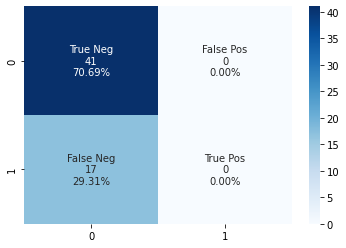

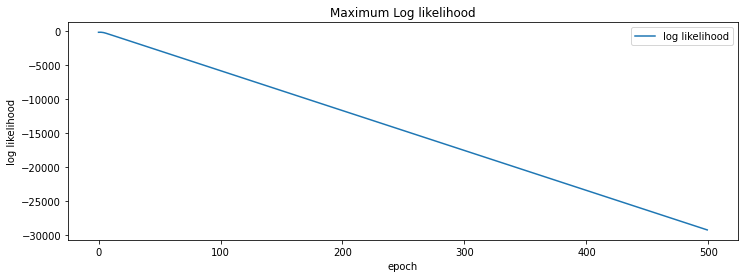

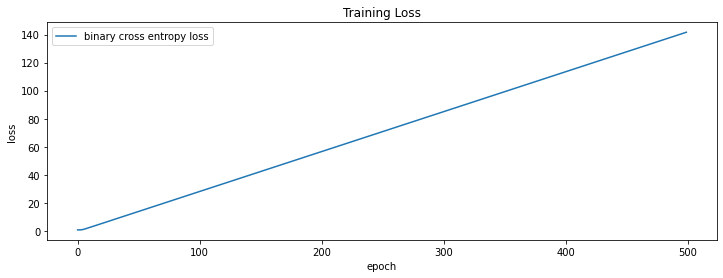

 ---------------------- FOLD KE- 8  --------------------- 
complement_index :  [513, 515, 4, 519, 7, 522, 526, 527, 16, 530, 20, 532, 22, 23, 538, 539, 28, 541, 540, 542, 544, 33, 546, 547, 37, 550, 552, 41, 555, 556, 45, 46, 558, 50, 51, 53, 56, 57, 58, 59, 60, 61, 62, 570, 571, 572, 575, 578, 69, 70, 581, 72, 79, 80, 85, 86, 87, 88, 90, 92, 93, 97, 101, 102, 104, 105, 109, 112, 118, 122, 123, 127, 129, 141, 145, 146, 147, 150, 152, 156, 157, 159, 160, 161, 168, 170, 184, 185, 186, 187, 188, 191, 199, 200, 201, 202, 203, 204, 209, 211, 212, 216, 218, 219, 220, 222, 223, 226, 234, 237, 240, 241, 244, 249, 250, 252, 255, 257, 259, 267, 268, 270, 275, 276, 277, 279, 280, 282, 284, 292, 293, 296, 299, 300, 303, 304, 307, 309, 310, 315, 316, 317, 323, 325, 329, 333, 334, 336, 357, 362, 369, 370, 373, 375, 376, 378, 379, 382, 386, 387, 391, 392, 393, 394, 396, 397, 399, 400, 402, 411, 418, 419, 424, 425, 430, 435, 436, 439, 441, 442, 443, 445, 448, 449, 452, 453, 457, 458, 461, 466, 467, 47

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

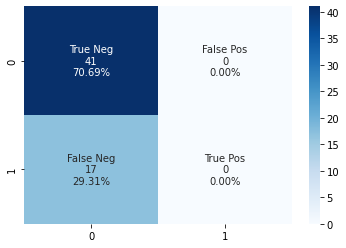

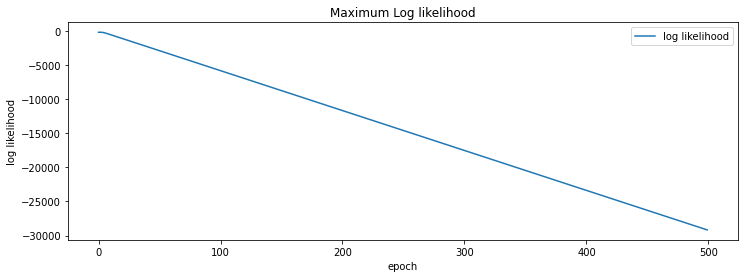

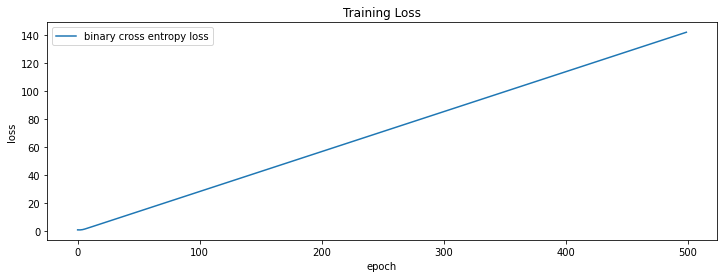

 ---------------------- FOLD KE- 9  --------------------- 
complement_index :  [512, 515, 4, 519, 7, 522, 526, 527, 16, 528, 20, 532, 22, 23, 538, 539, 28, 541, 540, 542, 544, 546, 547, 37, 550, 552, 41, 556, 45, 46, 558, 48, 50, 51, 52, 53, 562, 56, 57, 58, 59, 60, 61, 62, 570, 572, 575, 578, 69, 70, 581, 72, 78, 79, 80, 85, 87, 88, 90, 92, 93, 97, 101, 102, 104, 105, 109, 112, 118, 122, 123, 129, 141, 145, 146, 147, 148, 150, 156, 157, 159, 160, 161, 168, 170, 184, 185, 186, 187, 188, 191, 199, 200, 201, 202, 203, 204, 209, 211, 212, 216, 217, 218, 219, 220, 222, 223, 226, 233, 234, 237, 240, 244, 249, 250, 252, 255, 259, 264, 268, 270, 276, 277, 279, 280, 282, 284, 292, 293, 294, 296, 298, 299, 300, 303, 304, 307, 309, 310, 315, 316, 317, 319, 323, 325, 329, 333, 334, 336, 341, 345, 357, 360, 362, 369, 370, 371, 373, 376, 378, 379, 382, 384, 386, 387, 389, 391, 392, 393, 394, 396, 397, 399, 402, 411, 415, 416, 418, 419, 424, 425, 430, 435, 436, 439, 442, 443, 445, 448, 449, 453, 457

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

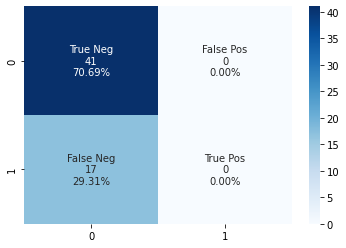

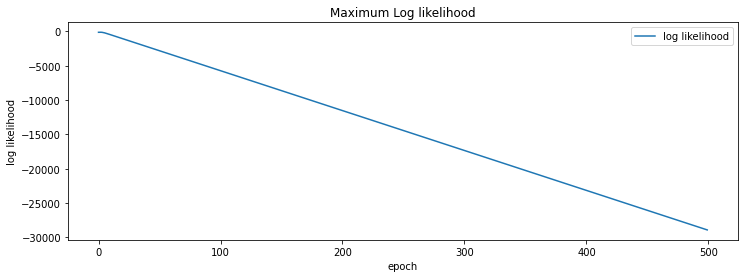

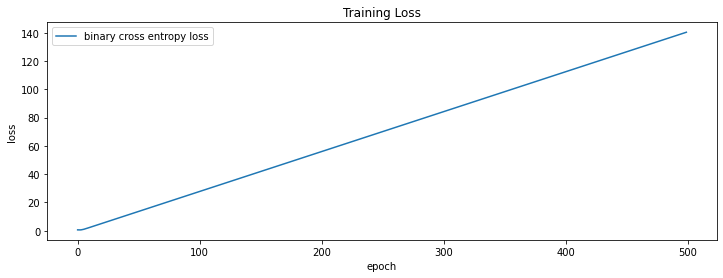

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=99, shuffle=True)
foldNum = 0
train_prob = []
train_pred = []
index = []
test_prob = []
test_pred = []
X_test_all = []
Y_test_all = []
X_test_num = 0
for train_index, test_index in kf.split(X_cfs, Y):
  print(" ---------------------- FOLD KE-", foldNum, " --------------------- ")
  complement_index = Intersection(missed_class_index, train_index)
  print("complement_index : ", complement_index)
  X_train_cfs, X_test_cfs = X_cfs[complement_index], X_cfs[test_index]
  y_train_cfs, Y_test = Y[complement_index], Y[test_index]
  w, log_likelihood_, loss = complement_logistic_regression(X_train_cfs, y_train_cfs.reshape((len(y_train_cfs),)),
                     num_steps = 500, learning_rate = 0.005, add_intercept=True)
  
  train_prob=predict(X_train_cfs, w)
  train_pred = getPredictionLabel (train_prob)
  acc_train_=accuracy_score(y_train_cfs,train_pred)
 # print("acc_train_  :", acc_train_)

  prob = []
  pred = []
  prob = predict(X_test_cfs, w)
  pred = getPredictionLabel(prob)
  if (foldNum == 0):
    X_test_all=X_test_cfs
    Y_test_all=Y_test
    test_prob = prob
    test_pred = pred
  else:
    X_test_all = np.vstack((X_test_all, X_test_cfs))
    Y_test_all = np.concatenate((Y_test_all, Y_test))
    test_prob = np.concatenate((test_prob,prob))
    test_pred = np.concatenate((test_pred,pred))
    
  index = np.concatenate((index,test_index))
  #Y_test_all.append(Y_test)
  X_test_num += test_index.size

  f1_test=f1_score(Y_test, pred)
  prec_test=precision_score(Y_test,pred)
  rec_test= recall_score(Y_test,pred)
  acc_test_=accuracy_score(Y_test,pred)
  print("accuracy : ", acc_test_)
  print(classification_report(Y_test,pred))


  foldNum+=1
  
  label_encoder.classes_
  showMatrix(Y_test, pred, log_likelihood_, loss)

index = index.astype(int)